In [1]:
# Import stardard python libraries:
import numpy as np
import matplotlib.pyplot as plt

# Import astropy, mirage, seaborn for plots:
import batman
from astropy.io import fits
import astropy.units as q
from mirage.soss_simulator import SossSim
# import seaborn
# seaborn.set_style('ticks')

# Import utils script:
import utils

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-031 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-034
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


## 1. Introduction
---------------

Let's first use our `utils` script to generate a stellar spectrum consistent with WASP-43. First, define stellar properties of WASP-43:

In [2]:
teff, logg, feh, jmag = 4520, 4.6, -0.01, 8

Our `utils` script can get the closest ATLAS or PHOENIX spectrum for those properties. Let's use the ATLAS spectrum:

In [3]:
star_wavelength, star_flux = utils.get_stellar_model(teff=teff, logg=logg, feh=feh, jmag=jmag)

Let's plot this:

Text(0.5, 1.0, 'Stellar spectrum of WASP-43')

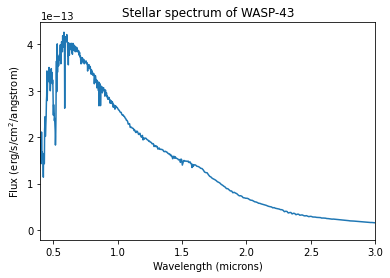

In [4]:
plt.plot(star_wavelength, star_flux)
plt.xlim(0.4,3.)
plt.xlabel('Wavelength (microns)')
plt.ylabel('Flux (erg/s/cm$^2$/angstrom)')
plt.title('Stellar spectrum of WASP-43')

Let's similarly define a flat transit spectrum for WASP-43b:

In [5]:
planet_wavelength, planet_tspectrum = np.copy(star_wavelength), np.ones([len(star_wavelength)])*0.0136059394

## 2. Running `mirage`
---------------

All right, now we can do a test run of `mirage` with SOSS --- note I'm using _my_ fork of `mirage` (https://github.com/nespinoza/mirage/tree/add_soss) which fixes some bugs we were seeing. 

### 2.1 Setting the transit model

The very first thing we need to do is to generate a transit model `tmodel` and its parameters `params` using `batman` so `mirage` can inject those into the PSFs themselves. 

We first get the properties of WASP-43b from Kreidberg et al. (2014), and inject those in the `params` object. Let's assume we will be observing the transit of WASP-43b which occurrs on `2459819.131474` (August 27, 2022 --- at about 15:09 UT; note the `yaml` file is set to observe around this time indeed): 

In [6]:
params = batman.TransitParams()
params.t0 = 2459819.131474
params.per = 0.81347436
params.a = 4.87
params.inc = 82.10
params.ecc = 0.
params.w = 90.
params.limb_dark = 'quadratic'
params.u = [0.5,0.5]   # These are placeholders; they are changed internally
params.rp = 0.1166445  # These are placeholders; they are changed internally

Now create the `TransitModel` object; inject stellar info as well here. This is useful for calculating limb-darkening:

In [7]:
tmodel = batman.TransitModel(params, np.array([0.])) # Time array is placeholder, will be changed internally by MIRAGE
tmodel.teff, tmodel.logg, tmodel.feh = teff, logg, feh

### 2.2 Run `mirage` with `SossSim`

All right, now we ingest all this to `mirage` --- if you don't have `exoctk`, this will set limb-darkening to zero (which is what we want for now I believe!):

In [8]:
sim = SossSim(paramfile = 'files/niriss_soss_substrip256_clear.yaml', \
              star=[star_wavelength, star_flux], \
              planet=[planet_wavelength, planet_tspectrum],\
              tmodel=tmodel)

cannot import name 'modelgrid' from 'exoctk' (unknown location)
There was a problem computing those limb darkening coefficients. Using all zeros.
cannot import name 'modelgrid' from 'exoctk' (unknown location)
There was a problem computing those limb darkening coefficients. Using all zeros.


And, let's create the exposure! This should take a while:

In [9]:
sim.create(test=True)

2021-04-27 13:55:05,507 - mirage.soss_simulator - INFO - 

Running soss_simulator....



2021-04-27 13:55:05,507 - stpipe - INFO - 

Running soss_simulator....



2021-04-27 13:55:05,507 - stpipe - INFO - 

Running soss_simulator....

2021-04-27 13:55:05,510 - mirage.soss_simulator - INFO - Using parameter file: 


2021-04-27 13:55:05,510 - stpipe - INFO - Using parameter file: 


2021-04-27 13:55:05,510 - stpipe - INFO - Using parameter file: 
2021-04-27 13:55:05,513 - mirage.soss_simulator - INFO - ./paramfile.yaml


2021-04-27 13:55:05,513 - stpipe - INFO - ./paramfile.yaml


2021-04-27 13:55:05,513 - stpipe - INFO - ./paramfile.yaml
Generating test simulation of shape (420, 6, 256, 2048)...
2021-04-27 13:56:35,089 - mirage.seed_image.save_seed.save - INFO - Seed image is 4D.


2021-04-27 13:56:35,089 - stpipe - INFO - Seed image is 4D.


2021-04-27 13:56:35,089 - stpipe - INFO - Seed image is 4D.
Starting noise generator...
2021-04-27 13:57:10,529 - mirage.soss_simulator - INFO - Running dark prep


2021-04-27 13:57:10,529 - stpipe - INFO - Running dark prep


2021-04-27 13:57:10,529 - stpipe - INFO - Running dark prep
2021-04-27 13:57:10,536 - mirage.dark.dark_prep - INFO - 

Running dark_prep..



2021-04-27 13:57:10,536 - stpipe - INFO - 

Running dark_prep..



2021-04-27 13:57:10,536 - stpipe - INFO - 

Running dark_prep..

2021-04-27 13:57:10,568 - mirage.dark.dark_prep - INFO - Reading parameter file: ./paramfile.yaml



2021-04-27 13:57:10,568 - stpipe - INFO - Reading parameter file: ./paramfile.yaml



2021-04-27 13:57:10,568 - stpipe - INFO - Reading parameter file: ./paramfile.yaml

2021-04-27 13:57:10,574 - mirage.dark.dark_prep - INFO - Original log file name: ./mirage_latest.log


2021-04-27 13:57:10,574 - stpipe - INFO - Original log file name: ./mirage_latest.log


2021-04-27 13:57:10,574 - stpipe - INFO - Original log file name: ./mirage_latest.log
2021-04-27 13:57:10,588 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.


2021-04-27 13:57:10,588 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.


2021-04-27 13:57:10,588 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.
2021-04-27 13:57:10,596 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.


2021-04-27 13:57:10,596 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.


2021-04-27 13:57:10,596 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.
2021-04-27 13:57:10,602 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.


2021-04-27 13:57:10,602 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.


2021-04-27 13:57:10,602 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.
2021-04-27 13:57:10,606 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.


2021-04-27 13:57:10,606 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.


2021-04-27 13:57:10,606 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.
2021-04-27 13:57:10,612 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.


2021-04-27 13:57:10,612 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.


2021-04-27 13:57:10,612 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.
2021-04-27 13:57:10,620 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.


2021-04-27 13:57:10,620 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.


2021-04-27 13:57:10,620 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.
2021-04-27 13:57:10,625 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.


2021-04-27 13:57:10,625 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.


2021-04-27 13:57:10,625 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.
2021-04-27 13:57:10,630 - mirage.utils.utils.full_paths - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits


2021-04-27 13:57:10,630 - stpipe - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits


2021-04-27 13:57:10,630 - stpipe - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits
2021-04-27 13:57:10,637 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.


2021-04-27 13:57:10,637 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.


2021-04-27 13:57:10,637 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.
2021-04-27 13:57:10,642 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file


2021-04-27 13:57:10,642 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file


2021-04-27 13:57:10,642 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file
2021-04-27 13:57:10,649 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.


2021-04-27 13:57:10,649 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.


2021-04-27 13:57:10,649 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.
2021-04-27 13:57:10,654 - mirage.utils.utils.full_paths - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"


2021-04-27 13:57:10,654 - stpipe - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"


2021-04-27 13:57:10,654 - stpipe - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"
2021-04-27 13:57:10,661 - mirage.reference_files.utils.get_transmission_file - INFO - POM Transmission filename: None


2021-04-27 13:57:10,661 - stpipe - INFO - POM Transmission filename: None


2021-04-27 13:57:10,661 - stpipe - INFO - POM Transmission filename: None
2021-04-27 13:57:10,665 - mirage.utils.utils.full_paths - INFO - From grism library, found None as the POM transmission file.


2021-04-27 13:57:10,665 - stpipe - INFO - From grism library, found None as the POM transmission file.


2021-04-27 13:57:10,665 - stpipe - INFO - From grism library, found None as the POM transmission file.
2021-04-27 13:57:10,668 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file


2021-04-27 13:57:10,668 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file


2021-04-27 13:57:10,668 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file
2021-04-27 13:57:10,675 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file


2021-04-27 13:57:10,675 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file


2021-04-27 13:57:10,675 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file
2021-04-27 13:57:10,678 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file


2021-04-27 13:57:10,678 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file


2021-04-27 13:57:10,678 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file
2021-04-27 13:57:10,682 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file


2021-04-27 13:57:10,682 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file


2021-04-27 13:57:10,682 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file
2021-04-27 13:57:10,688 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file


2021-04-27 13:57:10,688 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file


2021-04-27 13:57:10,688 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file
2021-04-27 13:57:10,691 - mirage.utils.utils.full_paths - INFO - Reffiles:photom field not present in input. Setting equal to "crds"


2021-04-27 13:57:10,691 - stpipe - INFO - Reffiles:photom field not present in input. Setting equal to "crds"


2021-04-27 13:57:10,691 - stpipe - INFO - Reffiles:photom field not present in input. Setting equal to "crds"
2021-04-27 13:57:10,698 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.


2021-04-27 13:57:10,698 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.


2021-04-27 13:57:10,698 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.
2021-04-27 13:57:10,702 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file


2021-04-27 13:57:10,702 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file


2021-04-27 13:57:10,702 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file
2021-04-27 13:57:10,708 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file


2021-04-27 13:57:10,708 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file


2021-04-27 13:57:10,708 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file
2021-04-27 13:57:10,716 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file


2021-04-27 13:57:10,716 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file


2021-04-27 13:57:10,716 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file
2021-04-27 13:57:10,721 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file


2021-04-27 13:57:10,721 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file


2021-04-27 13:57:10,721 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file
2021-04-27 13:57:10,729 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file


2021-04-27 13:57:10,729 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file


2021-04-27 13:57:10,729 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file
2021-04-27 13:57:10,735 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file


2021-04-27 13:57:10,735 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file


2021-04-27 13:57:10,735 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file
2021-04-27 13:57:10,758 - mirage.dark.dark_prep - INFO - Requested readout pattern NISRAPID is valid. Using the nframe = 1 and nskip = 0


2021-04-27 13:57:10,758 - stpipe - INFO - Requested readout pattern NISRAPID is valid. Using the nframe = 1 and nskip = 0


2021-04-27 13:57:10,758 - stpipe - INFO - Requested readout pattern NISRAPID is valid. Using the nframe = 1 and nskip = 0
2021-04-27 13:57:10,832 - mirage.utils.file_splitting.find_file_splits - INFO - Splitting by integration:


2021-04-27 13:57:10,832 - stpipe - INFO - Splitting by integration:


2021-04-27 13:57:10,832 - stpipe - INFO - Splitting by integration:
2021-04-27 13:57:10,839 - mirage.utils.file_splitting.find_file_splits - INFO - integration_list: [  0 213 420]


2021-04-27 13:57:10,839 - stpipe - INFO - integration_list: [  0 213 420]


2021-04-27 13:57:10,839 - stpipe - INFO - integration_list: [  0 213 420]
2021-04-27 13:57:10,843 - mirage.utils.file_splitting.find_file_splits - INFO - group_list: [0 6]


2021-04-27 13:57:10,843 - stpipe - INFO - group_list: [0 6]


2021-04-27 13:57:10,843 - stpipe - INFO - group_list: [0 6]
2021-04-27 13:57:10,846 - mirage.dark.dark_prep - INFO - An estimate of processing time remaining will be provided after the first segment has been completed.




2021-04-27 13:57:10,846 - stpipe - INFO - An estimate of processing time remaining will be provided after the first segment has been completed.




2021-04-27 13:57:10,846 - stpipe - INFO - An estimate of processing time remaining will be provided after the first segment has been completed.


2021-04-27 13:57:10,849 - mirage.dark.dark_prep - INFO - Segment number: 0


2021-04-27 13:57:10,849 - stpipe - INFO - Segment number: 0


2021-04-27 13:57:10,849 - stpipe - INFO - Segment number: 0
2021-04-27 13:57:10,852 - mirage.dark.dark_prep - INFO - Number of integrations: 213


2021-04-27 13:57:10,852 - stpipe - INFO - Number of integrations: 213


2021-04-27 13:57:10,852 - stpipe - INFO - Number of integrations: 213
2021-04-27 13:57:10,856 - mirage.dark.dark_prep - INFO - Dark files to use:


2021-04-27 13:57:10,856 - stpipe - INFO - Dark files to use:


2021-04-27 13:57:10,856 - stpipe - INFO - Dark files to use:
2021-04-27 13:57:10,861 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 13:57:10,861 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 13:57:10,861 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits
2021-04-27 13:57:10,864 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 13:57:10,864 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 13:57:10,864 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits
2021-04-27 13:57:10,868 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 13:57:10,868 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 13:57:10,868 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits
2021-04-27 13:57:10,871 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 13:57:10,871 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 13:57:10,871 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits
2021-04-27 13:57:10,877 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 13:57:10,877 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 13:57:10,877 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits
2021-04-27 13:57:10,882 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 13:57:10,882 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 13:57:10,882 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits
2021-04-27 13:57:10,885 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 13:57:10,885 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 13:57:10,885 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits
2021-04-27 13:57:10,887 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 13:57:10,887 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 13:57:10,887 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits
2021-04-27 13:57:10,889 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 13:57:10,889 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 13:57:10,889 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits
2021-04-27 13:57:10,893 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 13:57:10,893 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 13:57:10,893 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits
2021-04-27 13:57:10,895 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 13:57:10,895 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 13:57:10,895 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits
2021-04-27 13:57:10,898 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 13:57:10,898 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 13:57:10,898 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits
2021-04-27 13:57:10,901 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 13:57:10,901 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 13:57:10,901 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits
2021-04-27 13:57:10,903 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 13:57:10,903 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 13:57:10,903 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits
2021-04-27 13:57:10,906 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 13:57:10,906 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 13:57:10,906 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits
2021-04-27 13:57:10,910 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 13:57:10,910 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 13:57:10,910 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits
2021-04-27 13:57:10,913 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 13:57:10,913 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 13:57:10,913 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits
2021-04-27 13:57:10,917 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 13:57:10,917 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 13:57:10,917 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits
2021-04-27 13:57:10,921 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 13:57:10,921 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 13:57:10,921 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits
2021-04-27 13:57:10,925 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 13:57:10,925 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 13:57:10,925 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits
2021-04-27 13:57:10,929 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 13:57:10,929 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 13:57:10,929 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits
2021-04-27 13:57:14,334 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:14,334 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:14,334 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:57:14,727 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:14,727 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:14,727 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:57:14,741 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:14,741 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:14,741 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:57:17,548 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:17,548 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:17,548 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:17,577 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:17,577 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:18,012 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:18,012 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:18,016 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:18,016 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:18,029 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:18,029 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:18,444 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:18,444 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:18,459 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:18,459 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:18,535 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:18,535 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:18,538 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:18,538 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:18,550 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:57:18,550 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:57:18,637 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:18,637 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:18,637 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:57:18,976 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:57:18,976 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:57:18,976 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 13:57:19,004 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:19,004 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:19,004 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:19,012 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:19,012 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:19,029 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:19,029 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:19,115 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:19,115 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:19,117 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:19,117 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:19,130 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:19,130 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:19,309 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:19,309 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:19,327 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:19,327 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:19,413 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:19,413 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:19,415 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:19,415 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:19,428 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:19,428 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:19,430 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:19,430 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:19,432 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:19,432 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:19,433 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:19,433 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:19,435 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:19,435 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:21,438 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:21,438 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:21,496 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:21,496 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:21,574 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:21,574 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:21,577 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:21,577 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:21,589 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:57:21,589 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:57:21,786 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:21,786 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:21,786 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:22,296 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:57:22,296 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:57:22,298 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:22,298 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:22,298 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:57:22,301 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:22,301 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:22,301 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:57:22,304 - mirage.dark.dark_prep - INFO - File number 0 will be used for integrations [  0   8  15  43  57  59  72  91 104 138 175 177 183 197]


2021-04-27 13:57:22,304 - stpipe - INFO - File number 0 will be used for integrations [  0   8  15  43  57  59  72  91 104 138 175 177 183 197]


2021-04-27 13:57:22,304 - stpipe - INFO - File number 0 will be used for integrations [  0   8  15  43  57  59  72  91 104 138 175 177 183 197]
2021-04-27 13:57:22,484 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 13:57:22,484 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 13:57:22,484 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits
2021-04-27 13:57:25,434 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:25,434 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:25,434 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:57:25,832 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:25,832 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:25,832 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:57:25,850 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:25,850 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:25,850 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:57:28,527 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:28,527 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:28,527 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:28,651 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:28,651 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:29,202 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:29,202 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:29,205 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:29,205 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:29,219 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:29,219 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:29,568 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:29,568 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:29,585 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:29,585 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:29,663 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:29,663 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:29,666 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:29,666 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:29,681 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:57:29,681 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:57:29,755 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:29,755 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:29,755 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:57:30,026 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 13:57:30,026 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 13:57:30,026 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 13:57:30,055 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:30,055 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:30,055 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:30,063 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:30,063 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:30,081 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:30,081 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:30,164 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:30,164 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:30,166 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:30,166 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:30,180 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:30,180 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:30,330 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:30,330 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:30,347 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:30,347 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:30,440 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:30,440 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:30,443 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:30,443 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:30,459 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:30,459 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:30,461 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:30,461 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:30,463 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:30,463 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:30,465 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:30,465 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:30,467 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:30,467 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:32,467 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:32,467 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:32,503 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:32,503 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:32,588 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:32,588 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:32,590 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:32,590 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:32,604 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:57:32,604 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:57:32,761 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:32,761 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:32,761 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:33,297 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:57:33,297 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:57:33,299 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:33,299 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:33,299 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:57:33,301 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:33,301 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:33,301 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:57:33,315 - mirage.dark.dark_prep - INFO - File number 1 will be used for integrations [136 171 212]


2021-04-27 13:57:33,315 - stpipe - INFO - File number 1 will be used for integrations [136 171 212]


2021-04-27 13:57:33,315 - stpipe - INFO - File number 1 will be used for integrations [136 171 212]
2021-04-27 13:57:33,365 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 13:57:33,365 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 13:57:33,365 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits
2021-04-27 13:57:36,676 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:36,676 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:36,676 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:57:37,034 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:37,034 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:37,034 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:57:37,052 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:37,052 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:37,052 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:57:39,479 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:39,479 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:39,479 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:39,583 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:39,583 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:40,185 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:40,185 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:40,188 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:40,188 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:40,201 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:40,201 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:40,540 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:40,540 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:40,554 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:40,554 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:40,630 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:40,630 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:40,632 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:40,632 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:40,646 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:57:40,646 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:57:40,710 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:40,710 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:40,710 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:57:40,960 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:57:40,960 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:57:40,960 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 13:57:40,985 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:40,985 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:40,985 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:40,993 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:40,993 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:41,009 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:41,009 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:41,094 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:41,094 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:41,096 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:41,096 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:41,109 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:41,109 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:41,257 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:41,257 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:41,274 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:41,274 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:41,357 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:41,357 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:41,360 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:41,360 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:41,372 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:41,372 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:41,374 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:41,374 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:41,376 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:41,376 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:41,377 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:41,377 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:41,379 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:41,379 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:43,380 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:43,380 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:43,416 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:43,416 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:43,492 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:43,492 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:43,496 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:43,496 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:43,508 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:57:43,508 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:57:43,605 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:43,605 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:43,605 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:44,090 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:57:44,090 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:57:44,092 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:44,092 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:44,092 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:57:44,096 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:44,096 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:44,096 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:57:44,110 - mirage.dark.dark_prep - INFO - File number 2 will be used for integrations [ 14  40  71  74  83  99 127 155 174 193]


2021-04-27 13:57:44,110 - stpipe - INFO - File number 2 will be used for integrations [ 14  40  71  74  83  99 127 155 174 193]


2021-04-27 13:57:44,110 - stpipe - INFO - File number 2 will be used for integrations [ 14  40  71  74  83  99 127 155 174 193]
2021-04-27 13:57:44,244 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 13:57:44,244 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 13:57:44,244 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits
2021-04-27 13:57:47,440 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:47,440 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:47,440 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:57:47,802 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:47,802 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:47,802 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:57:47,818 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:47,818 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:47,818 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:57:50,411 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:50,411 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:50,411 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:57:50,521 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:50,521 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:57:51,116 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:51,116 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:51,119 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:51,119 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:51,132 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:51,132 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:57:51,489 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:51,489 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:57:51,505 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:51,505 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:57:51,581 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:51,581 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:51,585 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:51,585 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:51,599 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:57:51,599 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:57:51,678 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:51,678 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:51,678 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:57:51,944 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:57:51,944 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:57:51,944 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 13:57:51,971 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:51,971 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:51,971 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:57:51,980 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:51,980 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:57:51,997 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:51,997 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:57:52,091 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:52,091 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:52,095 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:52,095 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:52,109 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:52,109 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:57:52,257 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:52,257 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:57:52,273 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:52,273 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:57:52,367 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:52,367 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:52,370 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:52,370 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:57:52,384 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:52,384 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:57:52,387 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:52,387 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:57:52,389 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:52,389 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:57:52,391 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:52,391 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:57:52,393 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:52,393 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:57:54,387 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:54,387 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:57:54,423 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:54,423 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:57:54,512 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:54,512 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:57:54,515 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:54,515 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:57:54,531 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:57:54,531 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:57:54,638 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:54,638 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:54,638 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:57:55,164 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:57:55,164 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:57:55,166 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:55,166 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:57:55,166 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:57:55,169 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:55,169 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:57:55,169 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:57:55,180 - mirage.dark.dark_prep - INFO - File number 3 will be used for integrations [ 11  22 133 146 186 189 200 204]


2021-04-27 13:57:55,180 - stpipe - INFO - File number 3 will be used for integrations [ 11  22 133 146 186 189 200 204]


2021-04-27 13:57:55,180 - stpipe - INFO - File number 3 will be used for integrations [ 11  22 133 146 186 189 200 204]
2021-04-27 13:57:55,290 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 13:57:55,290 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 13:57:55,290 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits
2021-04-27 13:57:58,413 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:58,413 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:57:58,413 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:57:58,780 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:58,780 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:57:58,780 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:57:58,798 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:58,798 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:57:58,798 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:58:01,356 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:01,356 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:01,356 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:01,469 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:01,469 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:02,011 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:02,011 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:02,013 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:02,013 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:02,026 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:02,026 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:02,368 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:02,368 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:02,382 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:02,382 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:02,456 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:02,456 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:02,459 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:02,459 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:02,471 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:58:02,471 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:58:02,540 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:02,540 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:02,540 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:58:02,790 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:58:02,790 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:58:02,790 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 13:58:02,816 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:02,816 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:02,816 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:02,824 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:02,824 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:02,842 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:02,842 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:02,925 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:02,925 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:02,928 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:02,928 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:02,940 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:02,940 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:03,081 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:03,081 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:03,095 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:03,095 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:03,180 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:03,180 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:03,182 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:03,182 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:03,195 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:03,195 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:03,196 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:03,196 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:03,198 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:03,198 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:03,199 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:03,199 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:03,201 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:03,201 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:05,161 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:05,161 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:05,197 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:05,197 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:05,283 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:05,283 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:05,285 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:05,285 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:05,298 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:58:05,298 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:58:05,403 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:05,403 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:05,403 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:05,894 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:58:05,894 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:58:05,896 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:05,896 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:05,896 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:58:05,899 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:05,899 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:05,899 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:58:05,911 - mirage.dark.dark_prep - INFO - File number 4 will be used for integrations [  1  21  46  50  56 141 150 162 188]


2021-04-27 13:58:05,911 - stpipe - INFO - File number 4 will be used for integrations [  1  21  46  50  56 141 150 162 188]


2021-04-27 13:58:05,911 - stpipe - INFO - File number 4 will be used for integrations [  1  21  46  50  56 141 150 162 188]
2021-04-27 13:58:06,030 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 13:58:06,030 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 13:58:06,030 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits
2021-04-27 13:58:08,939 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:08,939 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:08,939 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:58:09,280 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:09,280 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:09,280 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:58:09,296 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:09,296 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:09,296 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:58:11,761 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:11,761 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:11,761 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:11,870 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:11,870 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:12,442 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:12,442 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:12,444 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:12,444 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:12,457 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:12,457 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:12,816 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:12,816 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:12,829 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:12,829 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:12,904 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:12,904 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:12,906 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:12,906 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:12,922 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:58:12,922 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:58:13,000 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:13,000 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:13,000 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:58:13,269 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 13:58:13,269 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 13:58:13,269 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 13:58:13,292 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:13,292 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:13,292 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:13,300 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:13,300 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:13,317 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:13,317 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:13,410 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:13,410 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:13,413 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:13,413 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:13,428 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:13,428 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:13,586 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:13,586 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:13,601 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:13,601 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:13,698 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:13,698 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:13,702 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:13,702 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:13,715 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:13,715 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:13,718 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:13,718 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:13,720 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:13,720 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:13,723 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:13,723 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:13,724 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:13,724 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:15,706 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:15,706 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:15,741 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:15,741 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:15,836 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:15,836 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:15,843 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:15,843 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:15,868 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:58:15,868 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:58:15,972 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:15,972 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:15,972 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:16,505 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:58:16,505 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:58:16,507 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:16,507 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:16,507 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:58:16,510 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:16,510 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:16,510 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:58:16,524 - mirage.dark.dark_prep - INFO - File number 5 will be used for integrations [  2   4  37  65  81  98 110 111 145 168 199]


2021-04-27 13:58:16,524 - stpipe - INFO - File number 5 will be used for integrations [  2   4  37  65  81  98 110 111 145 168 199]


2021-04-27 13:58:16,524 - stpipe - INFO - File number 5 will be used for integrations [  2   4  37  65  81  98 110 111 145 168 199]
2021-04-27 13:58:16,679 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 13:58:16,679 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 13:58:16,679 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits
2021-04-27 13:58:19,599 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:19,599 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:19,599 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:58:19,966 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:19,966 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:19,966 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:58:19,982 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:19,982 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:19,982 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:58:22,453 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:22,453 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:22,453 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:22,576 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:22,576 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:23,105 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:23,105 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:23,107 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:23,107 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:23,121 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:23,121 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:23,469 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:23,469 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:23,483 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:23,483 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:23,561 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:23,561 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:23,564 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:23,564 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:23,580 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:58:23,580 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:58:23,660 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:23,660 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:23,660 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:58:23,923 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:58:23,923 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:58:23,923 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 13:58:23,948 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:23,948 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:23,948 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:23,958 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:23,958 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:23,974 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:23,974 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:24,060 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:24,060 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:24,063 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:24,063 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:24,075 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:24,075 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:24,221 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:24,221 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:24,237 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:24,237 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:24,321 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:24,321 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:24,323 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:24,323 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:24,335 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:24,335 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:24,336 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:24,336 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:24,338 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:24,338 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:24,340 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:24,340 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:24,341 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:24,341 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:26,310 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:26,310 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:26,347 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:26,347 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:26,433 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:26,433 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:26,436 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:26,436 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:26,448 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:58:26,448 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:58:26,552 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:26,552 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:26,552 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:27,040 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:58:27,040 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:58:27,042 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:27,042 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:27,042 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:58:27,045 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:27,045 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:27,045 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:58:27,056 - mirage.dark.dark_prep - INFO - File number 6 will be used for integrations [101 137 151]


2021-04-27 13:58:27,056 - stpipe - INFO - File number 6 will be used for integrations [101 137 151]


2021-04-27 13:58:27,056 - stpipe - INFO - File number 6 will be used for integrations [101 137 151]
2021-04-27 13:58:27,100 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 13:58:27,100 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 13:58:27,100 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits
2021-04-27 13:58:29,997 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:29,997 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:29,997 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:58:30,348 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:30,348 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:30,348 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:58:30,364 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:30,364 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:30,364 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:58:32,786 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:32,786 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:32,786 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:32,882 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:32,882 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:33,429 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:33,429 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:33,431 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:33,431 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:33,442 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:33,442 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:33,781 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:33,781 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:33,796 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:33,796 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:33,869 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:33,869 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:33,871 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:33,871 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:33,884 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:58:33,884 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:58:33,956 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:33,956 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:33,956 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:58:34,228 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:58:34,228 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:58:34,228 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 13:58:34,254 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:34,254 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:34,254 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:34,264 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:34,264 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:34,281 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:34,281 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:34,370 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:34,370 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:34,372 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:34,372 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:34,386 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:34,386 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:34,534 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:34,534 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:34,549 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:34,549 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:34,639 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:34,639 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:34,641 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:34,641 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:34,654 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:34,654 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:34,656 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:34,656 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:34,658 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:34,658 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:34,661 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:34,661 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:34,662 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:34,662 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:36,684 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:36,684 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:36,721 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:36,721 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:36,814 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:36,814 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:36,817 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:36,817 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:36,830 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:58:36,830 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:58:36,941 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:36,941 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:36,941 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:37,499 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:58:37,499 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:58:37,501 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:37,501 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:37,501 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:58:37,504 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:37,504 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:37,504 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:58:37,516 - mirage.dark.dark_prep - INFO - File number 7 will be used for integrations [ 34  55  70  79  94 109 122 126 201]


2021-04-27 13:58:37,516 - stpipe - INFO - File number 7 will be used for integrations [ 34  55  70  79  94 109 122 126 201]


2021-04-27 13:58:37,516 - stpipe - INFO - File number 7 will be used for integrations [ 34  55  70  79  94 109 122 126 201]
2021-04-27 13:58:37,641 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 13:58:37,641 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 13:58:37,641 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits
2021-04-27 13:58:40,907 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:40,907 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:40,907 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:58:41,331 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:41,331 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:41,331 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:58:41,348 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:41,348 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:41,348 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:58:44,269 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:44,269 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:44,269 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:44,400 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:44,400 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:44,934 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:44,934 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:44,937 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:44,937 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:44,952 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:44,952 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:45,305 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:45,305 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:45,322 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:45,322 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:45,395 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:45,395 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:45,398 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:45,398 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:45,414 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:58:45,414 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:58:45,496 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:45,496 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:45,496 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:58:45,767 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:58:45,767 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:58:45,767 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 13:58:45,791 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:45,791 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:45,791 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:45,801 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:45,801 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:45,820 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:45,820 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:45,910 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:45,910 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:45,912 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:45,912 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:45,924 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:45,924 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:46,079 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:46,079 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:46,094 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:46,094 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:46,178 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:46,178 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:46,180 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:46,180 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:46,192 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:46,192 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:46,195 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:46,195 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:46,198 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:46,198 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:46,200 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:46,200 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:46,201 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:46,201 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:48,175 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:48,175 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:48,214 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:48,214 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:48,296 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:48,296 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:48,299 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:48,299 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:48,311 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:58:48,311 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:58:48,409 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:48,409 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:48,409 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:48,910 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:58:48,910 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:58:48,913 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:48,913 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:48,913 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:58:48,917 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:48,917 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:48,917 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:58:48,931 - mirage.dark.dark_prep - INFO - File number 8 will be used for integrations [ 20  38  64  76  84  89 142 148 185]


2021-04-27 13:58:48,931 - stpipe - INFO - File number 8 will be used for integrations [ 20  38  64  76  84  89 142 148 185]


2021-04-27 13:58:48,931 - stpipe - INFO - File number 8 will be used for integrations [ 20  38  64  76  84  89 142 148 185]
2021-04-27 13:58:49,052 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 13:58:49,052 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 13:58:49,052 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits
2021-04-27 13:58:52,152 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:52,152 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:58:52,152 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:58:52,546 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:52,546 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:58:52,546 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:58:52,562 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:52,562 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:58:52,562 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:58:54,979 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:54,979 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:54,979 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:58:55,087 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:55,087 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:58:55,742 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:55,742 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:55,744 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:55,744 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:55,757 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:55,757 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:58:56,102 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:56,102 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:58:56,117 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:56,117 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:58:56,188 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:56,188 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:56,191 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:56,191 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:56,204 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:58:56,204 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:58:56,273 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:56,273 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:56,273 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:58:56,556 - jwst.saturation.saturation - INFO - Detected 197 saturated pixels


2021-04-27 13:58:56,556 - stpipe.saturation - INFO - Detected 197 saturated pixels


2021-04-27 13:58:56,556 - stpipe.saturation - INFO - Detected 197 saturated pixels
2021-04-27 13:58:56,587 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:56,587 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:56,587 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:58:56,595 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:56,595 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:58:56,612 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:56,612 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:58:56,710 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:56,710 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:56,712 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:56,712 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:56,725 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:56,725 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:58:56,885 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:56,885 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:58:56,900 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:56,900 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:58:56,996 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:56,996 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:56,999 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:56,999 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:58:57,014 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:57,014 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:58:57,017 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:57,017 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:58:57,018 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:57,018 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:58:57,020 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:57,020 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:58:57,022 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:57,022 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:58:59,084 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:59,084 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:58:59,124 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:59,124 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:58:59,211 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:59,211 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:58:59,213 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:59,213 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:58:59,226 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:58:59,226 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:58:59,334 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:59,334 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:59,334 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:58:59,852 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:58:59,852 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:58:59,854 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:59,854 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:58:59,854 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:58:59,857 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:59,857 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:58:59,857 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:58:59,868 - mirage.dark.dark_prep - INFO - File number 9 will be used for integrations [ 27  51  80  96  97 105 116 117 158 160 165 166 211]


2021-04-27 13:58:59,868 - stpipe - INFO - File number 9 will be used for integrations [ 27  51  80  96  97 105 116 117 158 160 165 166 211]


2021-04-27 13:58:59,868 - stpipe - INFO - File number 9 will be used for integrations [ 27  51  80  96  97 105 116 117 158 160 165 166 211]
2021-04-27 13:59:00,047 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 13:59:00,047 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 13:59:00,047 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits
2021-04-27 13:59:03,350 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:03,350 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:03,350 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:59:03,751 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:03,751 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:03,751 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:59:03,767 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:03,767 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:03,767 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:59:06,666 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:06,666 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:06,666 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:06,795 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:06,795 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:07,376 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:07,376 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:07,379 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:07,379 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:07,391 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:07,391 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:07,750 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:07,750 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:07,766 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:07,766 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:07,842 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:07,842 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:07,846 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:07,846 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:07,861 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:59:07,861 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:59:07,937 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:07,937 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:07,937 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:59:08,192 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:59:08,192 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 13:59:08,192 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 13:59:08,218 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:08,218 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:08,218 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:08,227 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:08,227 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:08,243 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:08,243 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:08,330 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:08,330 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:08,332 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:08,332 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:08,344 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:08,344 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:08,506 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:08,506 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:08,521 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:08,521 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:08,606 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:08,606 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:08,610 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:08,610 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:08,622 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:08,622 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:08,624 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:08,624 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:08,626 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:08,626 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:08,627 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:08,627 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:08,629 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:08,629 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:10,703 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:10,703 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:10,740 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:10,740 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:10,822 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:10,822 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:10,825 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:10,825 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:10,839 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:59:10,839 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:59:10,944 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:10,944 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:10,944 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:11,439 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:59:11,439 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:59:11,442 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:11,442 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:11,442 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:59:11,445 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:11,445 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:11,445 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:59:11,458 - mirage.dark.dark_prep - INFO - File number 10 will be used for integrations [ 25  60  78 121 128 154 163 191]


2021-04-27 13:59:11,458 - stpipe - INFO - File number 10 will be used for integrations [ 25  60  78 121 128 154 163 191]


2021-04-27 13:59:11,458 - stpipe - INFO - File number 10 will be used for integrations [ 25  60  78 121 128 154 163 191]
2021-04-27 13:59:11,574 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 13:59:11,574 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 13:59:11,574 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits
2021-04-27 13:59:14,727 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:14,727 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:14,727 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:59:15,113 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:15,113 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:15,113 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:59:15,129 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:15,129 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:15,129 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:59:18,085 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:18,085 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:18,085 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:18,200 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:18,200 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:18,709 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:18,709 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:18,712 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:18,712 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:18,724 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:18,724 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:19,071 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:19,071 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:19,089 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:19,089 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:19,167 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:19,167 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:19,170 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:19,170 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:19,184 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:59:19,184 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:59:19,261 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:19,261 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:19,261 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:59:19,549 - jwst.saturation.saturation - INFO - Detected 195 saturated pixels


2021-04-27 13:59:19,549 - stpipe.saturation - INFO - Detected 195 saturated pixels


2021-04-27 13:59:19,549 - stpipe.saturation - INFO - Detected 195 saturated pixels
2021-04-27 13:59:19,571 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:19,571 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:19,571 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:19,580 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:19,580 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:19,599 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:19,599 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:19,691 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:19,691 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:19,694 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:19,694 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:19,708 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:19,708 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:19,859 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:19,859 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:19,876 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:19,876 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:19,967 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:19,967 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:19,970 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:19,970 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:19,983 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:19,983 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:19,985 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:19,985 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:19,987 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:19,987 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:19,989 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:19,989 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:19,991 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:19,991 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:22,015 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:22,015 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:22,051 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:22,051 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:22,140 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:22,140 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:22,142 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:22,142 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:22,156 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:59:22,156 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:59:22,265 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:22,265 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:22,265 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:22,784 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:59:22,784 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:59:22,786 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:22,786 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:22,786 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:59:22,789 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:22,789 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:22,789 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:59:22,804 - mirage.dark.dark_prep - INFO - File number 11 will be used for integrations [ 35  42  44 119 129 131 139 159 176 187]


2021-04-27 13:59:22,804 - stpipe - INFO - File number 11 will be used for integrations [ 35  42  44 119 129 131 139 159 176 187]


2021-04-27 13:59:22,804 - stpipe - INFO - File number 11 will be used for integrations [ 35  42  44 119 129 131 139 159 176 187]
2021-04-27 13:59:22,945 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 13:59:22,945 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 13:59:22,945 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits
2021-04-27 13:59:26,066 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:26,066 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:26,066 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:59:26,463 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:26,463 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:26,463 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:59:26,479 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:26,479 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:26,479 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:59:29,414 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:29,414 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:29,414 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:29,542 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:29,542 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:30,066 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:30,066 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:30,068 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:30,068 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:30,081 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:30,081 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:30,440 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:30,440 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:30,455 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:30,455 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:30,531 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:30,531 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:30,533 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:30,533 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:30,546 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:59:30,546 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:59:30,625 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:30,625 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:30,625 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:59:30,883 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 13:59:30,883 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 13:59:30,883 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 13:59:30,907 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:30,907 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:30,907 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:30,916 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:30,916 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:30,935 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:30,935 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:31,029 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:31,029 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:31,032 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:31,032 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:31,045 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:31,045 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:31,204 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:31,204 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:31,219 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:31,219 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:31,309 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:31,309 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:31,311 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:31,311 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:31,324 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:31,324 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:31,326 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:31,326 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:31,328 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:31,328 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:31,329 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:31,329 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:31,332 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:31,332 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:33,363 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:33,363 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:33,402 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:33,402 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:33,484 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:33,484 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:33,487 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:33,487 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:33,499 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:59:33,499 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:59:33,607 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:33,607 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:33,607 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:34,107 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:59:34,107 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:59:34,110 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:34,110 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:34,110 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:59:34,113 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:34,113 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:34,113 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:59:34,128 - mirage.dark.dark_prep - INFO - File number 12 will be used for integrations [ 52  53 103 114 115 123 130 147 167 179 194 205]


2021-04-27 13:59:34,128 - stpipe - INFO - File number 12 will be used for integrations [ 52  53 103 114 115 123 130 147 167 179 194 205]


2021-04-27 13:59:34,128 - stpipe - INFO - File number 12 will be used for integrations [ 52  53 103 114 115 123 130 147 167 179 194 205]
2021-04-27 13:59:34,292 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 13:59:34,292 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 13:59:34,292 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits
2021-04-27 13:59:37,479 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:37,479 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:37,479 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:59:37,859 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:37,859 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:37,859 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:59:37,877 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:37,877 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:37,877 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:59:41,434 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:41,434 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:41,434 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:41,550 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:41,550 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:42,102 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:42,102 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:42,104 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:42,104 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:42,117 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:42,117 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:42,470 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:42,470 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:42,486 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:42,486 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:42,563 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:42,563 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:42,566 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:42,566 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:42,578 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:59:42,578 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:59:42,659 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:42,659 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:42,659 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:59:42,921 - jwst.saturation.saturation - INFO - Detected 195 saturated pixels


2021-04-27 13:59:42,921 - stpipe.saturation - INFO - Detected 195 saturated pixels


2021-04-27 13:59:42,921 - stpipe.saturation - INFO - Detected 195 saturated pixels
2021-04-27 13:59:42,949 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:42,949 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:42,949 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:42,959 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:42,959 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:42,975 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:42,975 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:43,066 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:43,066 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:43,069 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:43,069 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:43,081 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:43,081 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:43,241 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:43,241 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:43,256 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:43,256 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:43,346 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:43,346 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:43,348 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:43,348 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:43,362 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:43,362 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:43,364 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:43,364 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:43,366 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:43,366 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:43,367 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:43,367 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:43,369 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:43,369 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:45,359 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:45,359 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:45,399 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:45,399 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:45,485 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:45,485 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:45,488 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:45,488 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:45,500 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:59:45,500 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:59:45,608 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:45,608 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:45,608 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:46,123 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:59:46,123 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:59:46,125 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:46,125 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:46,125 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:59:46,128 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:46,128 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:46,128 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:59:46,141 - mirage.dark.dark_prep - INFO - File number 13 will be used for integrations [ 10  13  26  86  87  88 118 124 125 172 181 203 207]


2021-04-27 13:59:46,141 - stpipe - INFO - File number 13 will be used for integrations [ 10  13  26  86  87  88 118 124 125 172 181 203 207]


2021-04-27 13:59:46,141 - stpipe - INFO - File number 13 will be used for integrations [ 10  13  26  86  87  88 118 124 125 172 181 203 207]
2021-04-27 13:59:46,322 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 13:59:46,322 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 13:59:46,322 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits
2021-04-27 13:59:49,430 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:49,430 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.


2021-04-27 13:59:49,430 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.
2021-04-27 13:59:49,811 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:49,811 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 13:59:49,811 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 13:59:49,829 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:49,829 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 13:59:49,829 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 13:59:53,439 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:53,439 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:53,439 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 13:59:53,567 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:53,567 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 13:59:54,110 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:54,110 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:54,114 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:54,114 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:54,128 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:54,128 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 13:59:54,505 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:54,505 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 13:59:54,522 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:54,522 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 13:59:54,600 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:54,600 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:54,604 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:54,604 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:54,619 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 13:59:54,619 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 13:59:54,698 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:54,698 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:54,698 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 13:59:54,988 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:59:54,988 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 13:59:54,988 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 13:59:55,013 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:55,013 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:55,013 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 13:59:55,021 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:55,021 - stpipe.saturation - INFO - Step saturation done


2021-04-27 13:59:55,038 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:55,038 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 13:59:55,131 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:55,131 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:55,134 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:55,134 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:55,147 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:55,147 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 13:59:55,308 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:55,308 - stpipe.superbias - INFO - Step superbias done


2021-04-27 13:59:55,324 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:55,324 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 13:59:55,417 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:55,417 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:55,421 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:55,421 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 13:59:55,435 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:55,435 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 13:59:55,438 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:55,438 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 13:59:55,439 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:55,439 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 13:59:55,441 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:55,441 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 13:59:55,443 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:55,443 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 13:59:57,428 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:57,428 - stpipe.refpix - INFO - Step refpix done


2021-04-27 13:59:57,467 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:57,467 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 13:59:57,553 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:57,553 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 13:59:57,555 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:57,555 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 13:59:57,568 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 13:59:57,568 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 13:59:57,671 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:57,671 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:57,671 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 13:59:58,160 - stpipe.linearity - INFO - Step linearity done


2021-04-27 13:59:58,160 - stpipe.linearity - INFO - Step linearity done
2021-04-27 13:59:58,161 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:58,161 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 13:59:58,161 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 13:59:58,165 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:58,165 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 13:59:58,165 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 13:59:58,178 - mirage.dark.dark_prep - INFO - File number 14 will be used for integrations [ 19  31  61  82  92  93 134 149 153 173 198]


2021-04-27 13:59:58,178 - stpipe - INFO - File number 14 will be used for integrations [ 19  31  61  82  92  93 134 149 153 173 198]


2021-04-27 13:59:58,178 - stpipe - INFO - File number 14 will be used for integrations [ 19  31  61  82  92  93 134 149 153 173 198]
2021-04-27 13:59:58,332 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 13:59:58,332 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 13:59:58,332 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits
2021-04-27 14:00:01,240 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:01,240 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:01,240 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:00:01,592 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:01,592 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:01,592 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:00:01,608 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:01,608 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:01,608 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:00:04,684 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:04,684 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:04,684 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:04,815 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:04,815 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:05,329 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:05,329 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:05,332 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:05,332 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:05,347 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:05,347 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:05,711 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:05,711 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:05,727 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:05,727 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:05,810 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:05,810 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:05,813 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:05,813 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:05,829 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:00:05,829 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:00:05,911 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:05,911 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:05,911 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:00:06,177 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:00:06,177 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:00:06,177 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 14:00:06,200 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:06,200 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:06,200 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:06,210 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:06,210 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:06,227 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:06,227 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:06,320 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:06,320 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:06,323 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:06,323 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:06,337 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:06,337 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:06,491 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:06,491 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:06,506 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:06,506 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:06,600 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:06,600 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:06,603 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:06,603 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:06,617 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:06,617 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:06,620 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:06,620 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:06,621 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:06,621 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:06,623 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:06,623 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:06,625 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:06,625 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:08,610 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:08,610 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:08,650 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:08,650 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:08,743 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:08,743 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:08,746 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:08,746 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:08,760 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:00:08,760 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:00:08,869 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:08,869 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:08,869 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:09,372 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:00:09,372 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:00:09,375 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:09,375 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:09,375 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:00:09,378 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:09,378 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:09,378 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:00:09,389 - mirage.dark.dark_prep - INFO - File number 15 will be used for integrations [  6   7  23  24  29  48  54  90 108 120 164 190]


2021-04-27 14:00:09,389 - stpipe - INFO - File number 15 will be used for integrations [  6   7  23  24  29  48  54  90 108 120 164 190]


2021-04-27 14:00:09,389 - stpipe - INFO - File number 15 will be used for integrations [  6   7  23  24  29  48  54  90 108 120 164 190]
2021-04-27 14:00:09,551 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 14:00:09,551 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 14:00:09,551 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits
2021-04-27 14:00:12,733 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:12,733 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:12,733 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:00:13,123 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:13,123 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:13,123 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:00:13,139 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:13,139 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:13,139 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:00:16,883 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:16,883 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:16,883 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:17,000 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:17,000 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:17,502 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:17,502 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:17,504 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:17,504 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:17,516 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:17,516 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:17,863 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:17,863 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:17,878 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:17,878 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:17,959 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:17,959 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:17,962 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:17,962 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:17,975 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:00:17,975 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:00:18,053 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:18,053 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:18,053 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:00:18,310 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:00:18,310 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:00:18,310 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:00:18,338 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:18,338 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:18,338 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:18,348 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:18,348 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:18,365 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:18,365 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:18,461 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:18,461 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:18,463 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:18,463 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:18,478 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:18,478 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:18,639 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:18,639 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:18,654 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:18,654 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:18,743 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:18,743 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:18,746 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:18,746 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:18,758 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:18,758 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:18,760 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:18,760 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:18,763 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:18,763 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:18,765 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:18,765 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:18,766 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:18,766 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:20,782 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:20,782 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:20,823 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:20,823 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:20,905 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:20,905 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:20,907 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:20,907 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:20,919 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:00:20,919 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:00:21,026 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:21,026 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:21,026 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:21,521 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:00:21,521 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:00:21,523 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:21,523 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:21,523 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:00:21,526 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:21,526 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:21,526 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:00:21,538 - mirage.dark.dark_prep - INFO - File number 16 will be used for integrations [  3   5  12  16  17  18  41  58  68  75  77  95 100 113 140 144 195 196
 209]


2021-04-27 14:00:21,538 - stpipe - INFO - File number 16 will be used for integrations [  3   5  12  16  17  18  41  58  68  75  77  95 100 113 140 144 195 196
 209]


2021-04-27 14:00:21,538 - stpipe - INFO - File number 16 will be used for integrations [  3   5  12  16  17  18  41  58  68  75  77  95 100 113 140 144 195 196
 209]
2021-04-27 14:00:21,786 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 14:00:21,786 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 14:00:21,786 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits
2021-04-27 14:00:25,004 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:25,004 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:25,004 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:00:25,417 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:25,417 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:25,417 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:00:25,435 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:25,435 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:25,435 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:00:29,518 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:29,518 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:29,518 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:29,641 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:29,641 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:30,129 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:30,129 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:30,132 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:30,132 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:30,146 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:30,146 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:30,499 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:30,499 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:30,515 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:30,515 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:30,594 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:30,594 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:30,596 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:30,596 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:30,612 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:00:30,612 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:00:30,692 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:30,692 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:30,692 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:00:30,970 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:00:30,970 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:00:30,970 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:00:30,997 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:30,997 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:30,997 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:31,008 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:31,008 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:31,025 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:31,025 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:31,118 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:31,118 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:31,121 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:31,121 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:31,135 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:31,135 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:31,298 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:31,298 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:31,314 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:31,314 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:31,409 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:31,409 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:31,413 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:31,413 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:31,426 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:31,426 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:31,429 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:31,429 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:31,431 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:31,431 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:31,433 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:31,433 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:31,435 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:31,435 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:33,516 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:33,516 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:33,556 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:33,556 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:33,646 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:33,646 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:33,648 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:33,648 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:33,662 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:00:33,662 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:00:33,773 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:33,773 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:33,773 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:34,289 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:00:34,289 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:00:34,291 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:34,291 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:34,291 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:00:34,294 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:34,294 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:34,294 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:00:34,309 - mirage.dark.dark_prep - INFO - File number 17 will be used for integrations [  9  32  47  49  67  69  85 102 107 152 192 210]


2021-04-27 14:00:34,309 - stpipe - INFO - File number 17 will be used for integrations [  9  32  47  49  67  69  85 102 107 152 192 210]


2021-04-27 14:00:34,309 - stpipe - INFO - File number 17 will be used for integrations [  9  32  47  49  67  69  85 102 107 152 192 210]
2021-04-27 14:00:34,481 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 14:00:34,481 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 14:00:34,481 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits
2021-04-27 14:00:37,969 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:37,969 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:37,969 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:00:38,396 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:38,396 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:38,396 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:00:38,412 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:38,412 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:38,412 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:00:42,332 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:42,332 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:42,332 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:42,447 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:42,447 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:42,913 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:42,913 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:42,915 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:42,915 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:42,928 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:42,928 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:43,287 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:43,287 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:43,304 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:43,304 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:43,384 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:43,384 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:43,387 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:43,387 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:43,399 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:00:43,399 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:00:43,477 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:43,477 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:43,477 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:00:43,736 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:00:43,736 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:00:43,736 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:00:43,764 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:43,764 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:43,764 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:43,772 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:43,772 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:43,789 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:43,789 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:43,881 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:43,881 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:43,884 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:43,884 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:43,898 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:43,898 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:44,055 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:44,055 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:44,071 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:44,071 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:44,161 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:44,161 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:44,163 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:44,163 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:44,177 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:44,177 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:44,179 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:44,179 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:44,181 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:44,181 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:44,183 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:44,183 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:44,185 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:44,185 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:46,195 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:46,195 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:46,237 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:46,237 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:46,332 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:46,332 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:46,335 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:46,335 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:46,349 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:00:46,349 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:00:46,459 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:46,459 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:46,459 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:46,956 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:00:46,956 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:00:46,958 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:46,958 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:46,958 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:00:46,961 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:46,961 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:46,961 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:00:46,974 - mirage.dark.dark_prep - INFO - File number 18 will be used for integrations [ 30  36  39  63 132 135 143 169 178 180 182 184 202 206]


2021-04-27 14:00:46,974 - stpipe - INFO - File number 18 will be used for integrations [ 30  36  39  63 132 135 143 169 178 180 182 184 202 206]


2021-04-27 14:00:46,974 - stpipe - INFO - File number 18 will be used for integrations [ 30  36  39  63 132 135 143 169 178 180 182 184 202 206]
2021-04-27 14:00:47,156 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 14:00:47,156 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 14:00:47,156 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits
2021-04-27 14:00:50,867 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:50,867 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:00:50,867 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:00:51,272 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:51,272 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:00:51,272 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:00:51,320 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:51,320 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:00:51,320 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:00:54,915 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:54,915 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:54,915 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:00:55,046 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:55,046 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:00:55,593 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:55,593 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:55,595 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:55,595 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:55,607 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:55,607 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:00:55,973 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:55,973 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:00:55,989 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:55,989 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:00:56,070 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:56,070 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:56,073 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:56,073 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:56,088 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:00:56,088 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:00:56,172 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:56,172 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:56,172 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:00:56,439 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:00:56,439 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:00:56,439 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:00:56,465 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:56,465 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:56,465 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:00:56,474 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:56,474 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:00:56,493 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:56,493 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:00:56,593 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:56,593 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:56,596 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:56,596 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:56,609 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:56,609 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:00:56,775 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:56,775 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:00:56,793 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:56,793 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:00:56,888 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:56,888 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:56,892 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:56,892 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:00:56,906 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:56,906 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:00:56,908 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:56,908 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:00:56,910 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:56,910 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:00:56,912 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:56,912 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:00:56,914 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:56,914 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:00:58,997 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:58,997 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:00:59,038 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:59,038 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:00:59,130 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:59,130 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:00:59,133 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:59,133 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:00:59,147 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:00:59,147 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:00:59,288 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:59,288 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:59,288 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:00:59,801 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:00:59,801 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:00:59,803 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:59,803 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:00:59,803 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:00:59,806 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:59,806 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:00:59,806 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:00:59,819 - mirage.dark.dark_prep - INFO - File number 19 will be used for integrations [ 28  33  45  62  66  73 106 112 156 157 161 170 208]


2021-04-27 14:00:59,819 - stpipe - INFO - File number 19 will be used for integrations [ 28  33  45  62  66  73 106 112 156 157 161 170 208]


2021-04-27 14:00:59,819 - stpipe - INFO - File number 19 will be used for integrations [ 28  33  45  62  66  73 106 112 156 157 161 170 208]
2021-04-27 14:01:13,053 - mirage.dark.dark_prep - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits. This can be used as input to the observation generator.


2021-04-27 14:01:13,053 - stpipe - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits. This can be used as input to the observation generator.


2021-04-27 14:01:13,053 - stpipe - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits. This can be used as input to the observation generator.
2021-04-27 14:01:13,056 - mirage.dark.dark_prep - INFO - 

Segment 1 out of 2 complete.


2021-04-27 14:01:13,056 - stpipe - INFO - 

Segment 1 out of 2 complete.


2021-04-27 14:01:13,056 - stpipe - INFO - 

Segment 1 out of 2 complete.
2021-04-27 14:01:13,058 - mirage.dark.dark_prep - INFO - Estimated time remaining in dark_prep: 4.04 minutes. Projected finish time: 2021-04-27 14:05:15.458871


2021-04-27 14:01:13,058 - stpipe - INFO - Estimated time remaining in dark_prep: 4.04 minutes. Projected finish time: 2021-04-27 14:05:15.458871


2021-04-27 14:01:13,058 - stpipe - INFO - Estimated time remaining in dark_prep: 4.04 minutes. Projected finish time: 2021-04-27 14:05:15.458871
2021-04-27 14:01:13,061 - mirage.dark.dark_prep - INFO - Segment number: 1


2021-04-27 14:01:13,061 - stpipe - INFO - Segment number: 1


2021-04-27 14:01:13,061 - stpipe - INFO - Segment number: 1
2021-04-27 14:01:13,063 - mirage.dark.dark_prep - INFO - Number of integrations: 207


2021-04-27 14:01:13,063 - stpipe - INFO - Number of integrations: 207


2021-04-27 14:01:13,063 - stpipe - INFO - Number of integrations: 207
2021-04-27 14:01:13,066 - mirage.dark.dark_prep - INFO - Dark files to use:


2021-04-27 14:01:13,066 - stpipe - INFO - Dark files to use:


2021-04-27 14:01:13,066 - stpipe - INFO - Dark files to use:
2021-04-27 14:01:13,067 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 14:01:13,067 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 14:01:13,067 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits
2021-04-27 14:01:13,069 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 14:01:13,069 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 14:01:13,069 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits
2021-04-27 14:01:13,071 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 14:01:13,071 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 14:01:13,071 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits
2021-04-27 14:01:13,073 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 14:01:13,073 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 14:01:13,073 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits
2021-04-27 14:01:13,075 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 14:01:13,075 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 14:01:13,075 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits
2021-04-27 14:01:13,077 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 14:01:13,077 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 14:01:13,077 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits
2021-04-27 14:01:13,079 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 14:01:13,079 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 14:01:13,079 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits
2021-04-27 14:01:13,081 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 14:01:13,081 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 14:01:13,081 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits
2021-04-27 14:01:13,083 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 14:01:13,083 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 14:01:13,083 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits
2021-04-27 14:01:13,085 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 14:01:13,085 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 14:01:13,085 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits
2021-04-27 14:01:13,087 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 14:01:13,087 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 14:01:13,087 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits
2021-04-27 14:01:13,089 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 14:01:13,089 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 14:01:13,089 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits
2021-04-27 14:01:13,091 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 14:01:13,091 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 14:01:13,091 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits
2021-04-27 14:01:13,094 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 14:01:13,094 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 14:01:13,094 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits
2021-04-27 14:01:13,095 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 14:01:13,095 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 14:01:13,095 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits
2021-04-27 14:01:13,097 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 14:01:13,097 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 14:01:13,097 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits
2021-04-27 14:01:13,099 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 14:01:13,099 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 14:01:13,099 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits
2021-04-27 14:01:13,101 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 14:01:13,101 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 14:01:13,101 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits
2021-04-27 14:01:13,103 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 14:01:13,103 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 14:01:13,103 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits
2021-04-27 14:01:13,105 - mirage.dark.dark_prep - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 14:01:13,105 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 14:01:13,105 - stpipe - INFO - /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits
2021-04-27 14:01:13,107 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 14:01:13,107 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits


2021-04-27 14:01:13,107 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits
2021-04-27 14:01:16,261 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:16,261 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:16,261 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_15_496_SE_2015-12-11T17h20m40_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:01:16,616 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:16,616 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:16,616 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:01:16,631 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:16,631 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:16,631 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:01:21,988 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:21,988 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:21,988 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:22,186 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:01:22,186 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:01:22,759 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:22,759 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:22,762 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:22,762 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:22,776 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:01:22,776 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:01:23,144 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:01:23,144 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:01:23,159 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:01:23,159 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:01:23,235 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:23,235 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:23,237 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:23,237 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:23,251 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:01:23,251 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:01:23,335 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:23,335 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:23,335 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:01:23,612 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:01:23,612 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:01:23,612 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:01:23,638 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:23,638 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:23,638 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:23,649 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:01:23,649 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:01:23,666 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:01:23,666 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:01:23,757 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:23,757 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:23,759 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:23,759 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:23,772 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:01:23,772 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:01:23,937 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:01:23,937 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:01:23,954 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:01:23,954 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:01:24,052 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:24,052 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:24,055 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:01:24,055 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:01:24,069 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:01:24,069 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:01:24,071 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:01:24,071 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:01:24,073 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:01:24,073 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:01:24,075 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:01:24,075 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:01:24,077 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:01:24,077 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:01:26,124 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:01:26,124 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:01:26,163 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:01:26,163 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:01:26,251 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:26,251 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:26,254 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:26,254 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:26,266 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:01:26,266 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:01:26,401 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:26,401 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:26,401 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:26,913 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:01:26,913 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:01:26,915 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:01:26,915 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:01:26,915 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:01:26,918 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:01:26,918 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:01:26,918 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:01:27,004 - mirage.dark.dark_prep - INFO - File number 0 will be used for integrations [  0  20  30  45  59  68  86 102 104 117 124 135 141 175 195 205]


2021-04-27 14:01:27,004 - stpipe - INFO - File number 0 will be used for integrations [  0  20  30  45  59  68  86 102 104 117 124 135 141 175 195 205]


2021-04-27 14:01:27,004 - stpipe - INFO - File number 0 will be used for integrations [  0  20  30  45  59  68  86 102 104 117 124 135 141 175 195 205]
2021-04-27 14:01:27,195 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 14:01:27,195 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits


2021-04-27 14:01:27,195 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits
2021-04-27 14:01:30,278 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:30,278 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:30,278 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_19_496_SE_2015-12-11T18h36m32_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:01:30,643 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:30,643 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:30,643 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:01:30,661 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:30,661 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:30,661 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:01:34,780 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:34,780 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:34,780 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:34,898 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:01:34,898 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:01:35,444 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:35,444 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:35,447 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:35,447 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:35,461 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:01:35,461 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:01:35,824 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:01:35,824 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:01:35,838 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:01:35,838 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:01:35,918 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:35,918 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:35,920 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:35,920 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:35,933 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:01:35,933 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:01:36,012 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:36,012 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:36,012 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:01:36,286 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:01:36,286 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:01:36,286 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 14:01:36,310 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:36,310 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:36,310 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:36,320 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:01:36,320 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:01:36,337 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:01:36,337 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:01:36,437 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:36,437 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:36,440 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:36,440 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:36,453 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:01:36,453 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:01:36,620 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:01:36,620 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:01:36,638 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:01:36,638 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:01:36,735 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:36,735 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:36,738 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:01:36,738 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:01:36,752 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:01:36,752 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:01:36,754 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:01:36,754 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:01:36,756 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:01:36,756 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:01:36,758 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:01:36,758 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:01:36,760 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:01:36,760 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:01:38,834 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:01:38,834 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:01:38,871 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:01:38,871 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:01:38,961 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:38,961 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:38,964 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:38,964 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:38,978 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:01:38,978 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:01:39,121 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:39,121 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:39,121 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:39,648 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:01:39,648 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:01:39,651 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:01:39,651 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:01:39,651 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:01:39,654 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:01:39,654 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:01:39,654 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:01:39,668 - mirage.dark.dark_prep - INFO - File number 1 will be used for integrations [ 31  38  43  66  80  83  95 120 131 134 136 163 192 194]


2021-04-27 14:01:39,668 - stpipe - INFO - File number 1 will be used for integrations [ 31  38  43  66  80  83  95 120 131 134 136 163 192 194]


2021-04-27 14:01:39,668 - stpipe - INFO - File number 1 will be used for integrations [ 31  38  43  66  80  83  95 120 131 134 136 163 192 194]
2021-04-27 14:01:39,845 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 14:01:39,845 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits


2021-04-27 14:01:39,845 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits
2021-04-27 14:01:43,755 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:43,755 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:43,755 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_19_496_SE_2017-09-07T06h49m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:01:44,218 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:44,218 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:44,218 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:01:44,236 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:44,236 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:44,236 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:01:48,623 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:48,623 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:48,623 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:01:48,821 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:01:48,821 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:01:49,305 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:49,305 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:49,308 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:49,308 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:49,321 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:01:49,321 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:01:49,682 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:01:49,682 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:01:49,698 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:01:49,698 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:01:49,777 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:49,777 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:49,779 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:49,779 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:49,793 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:01:49,793 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:01:49,877 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:49,877 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:49,877 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:01:50,146 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:01:50,146 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:01:50,146 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:01:50,171 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:50,171 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:50,171 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:01:50,179 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:01:50,179 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:01:50,197 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:01:50,197 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:01:50,295 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:50,295 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:50,298 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:50,298 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:50,312 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:01:50,312 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:01:50,483 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:01:50,483 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:01:50,499 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:01:50,499 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:01:50,598 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:50,598 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:50,601 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:01:50,601 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:01:50,615 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:01:50,615 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:01:50,616 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:01:50,616 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:01:50,618 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:01:50,618 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:01:50,620 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:01:50,620 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:01:50,622 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:01:50,622 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:01:52,725 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:01:52,725 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:01:52,763 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:01:52,763 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:01:52,855 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:52,855 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:01:52,858 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:52,858 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:01:52,873 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:01:52,873 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:01:53,016 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:53,016 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:53,016 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:01:53,631 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:01:53,631 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:01:53,633 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:01:53,633 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:01:53,633 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:01:53,636 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:01:53,636 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:01:53,636 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:01:53,649 - mirage.dark.dark_prep - INFO - File number 2 will be used for integrations [ 49  54  60 121 140 166 183 185 189 199]


2021-04-27 14:01:53,649 - stpipe - INFO - File number 2 will be used for integrations [ 49  54  60 121 140 166 183 185 189 199]


2021-04-27 14:01:53,649 - stpipe - INFO - File number 2 will be used for integrations [ 49  54  60 121 140 166 183 185 189 199]
2021-04-27 14:01:53,792 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 14:01:53,792 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits


2021-04-27 14:01:53,792 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits
2021-04-27 14:01:58,705 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:58,705 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:01:58,705 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_17_496_SE_2017-09-07T06h09m02_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:01:59,277 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:59,277 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:01:59,277 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:01:59,293 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:59,293 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:01:59,293 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:02:03,504 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:03,504 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:03,504 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:03,674 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:03,674 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:04,243 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:04,243 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:04,245 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:04,245 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:04,258 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:04,258 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:04,634 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:04,634 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:04,649 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:04,649 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:04,732 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:04,732 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:04,736 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:04,736 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:04,750 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:02:04,750 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:02:04,838 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:04,838 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:04,838 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:02:05,118 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:02:05,118 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:02:05,118 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:02:05,146 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:05,146 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:05,146 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:05,156 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:05,156 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:05,172 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:05,172 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:05,270 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:05,270 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:05,273 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:05,273 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:05,287 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:05,287 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:05,453 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:05,453 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:05,470 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:05,470 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:05,570 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:05,570 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:05,573 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:05,573 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:05,586 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:05,586 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:05,587 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:05,587 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:05,589 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:05,589 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:05,591 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:05,591 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:05,592 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:05,592 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:07,619 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:07,619 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:07,658 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:07,658 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:07,752 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:07,752 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:07,755 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:07,755 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:07,769 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:02:07,769 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:02:07,925 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:07,925 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:07,925 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:08,427 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:02:08,427 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:02:08,429 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:08,429 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:08,429 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:02:08,434 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:08,434 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:08,434 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:02:08,446 - mirage.dark.dark_prep - INFO - File number 3 will be used for integrations [  8  17  41  56 113 133 190 200]


2021-04-27 14:02:08,446 - stpipe - INFO - File number 3 will be used for integrations [  8  17  41  56 113 133 190 200]


2021-04-27 14:02:08,446 - stpipe - INFO - File number 3 will be used for integrations [  8  17  41  56 113 133 190 200]
2021-04-27 14:02:08,553 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 14:02:08,553 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits


2021-04-27 14:02:08,553 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits
2021-04-27 14:02:12,061 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:12,061 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:12,061 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_21_496_SE_2017-09-07T07h29m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:02:12,535 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:12,535 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:12,535 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:02:12,551 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:12,551 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:12,551 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:02:16,276 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:16,276 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:16,276 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:16,398 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:16,398 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:16,942 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:16,942 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:16,944 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:16,944 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:16,956 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:16,956 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:17,322 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:17,322 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:17,337 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:17,337 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:17,421 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:17,421 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:17,424 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:17,424 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:17,437 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:02:17,437 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:02:17,526 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:17,526 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:17,526 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:02:17,801 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:02:17,801 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:02:17,801 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:02:17,827 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:17,827 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:17,827 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:17,836 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:17,836 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:17,851 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:17,851 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:17,952 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:17,952 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:17,955 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:17,955 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:17,968 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:17,968 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:18,135 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:18,135 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:18,150 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:18,150 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:18,244 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:18,244 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:18,247 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:18,247 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:18,262 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:18,262 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:18,264 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:18,264 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:18,266 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:18,266 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:18,268 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:18,268 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:18,270 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:18,270 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:20,299 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:20,299 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:20,340 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:20,340 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:20,429 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:20,429 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:20,432 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:20,432 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:20,445 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:02:20,445 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:02:20,566 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:20,566 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:20,566 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:21,062 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:02:21,062 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:02:21,065 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:21,065 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:21,065 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:02:21,068 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:21,068 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:21,068 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:02:21,083 - mirage.dark.dark_prep - INFO - File number 4 will be used for integrations [ 22  23  35  52  75  77 126 139 151 152 155 174]


2021-04-27 14:02:21,083 - stpipe - INFO - File number 4 will be used for integrations [ 22  23  35  52  75  77 126 139 151 152 155 174]


2021-04-27 14:02:21,083 - stpipe - INFO - File number 4 will be used for integrations [ 22  23  35  52  75  77 126 139 151 152 155 174]
2021-04-27 14:02:21,240 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 14:02:21,240 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits


2021-04-27 14:02:21,240 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits
2021-04-27 14:02:24,542 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:24,542 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:24,542 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_20_496_SE_2015-12-11T18h53m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:02:24,992 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:24,992 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:24,992 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:02:25,009 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:25,009 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:25,009 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:02:28,888 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:28,888 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:28,888 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:29,015 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:29,015 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:29,553 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:29,553 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:29,556 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:29,556 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:29,569 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:29,569 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:29,928 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:29,928 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:29,944 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:29,944 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:30,028 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:30,028 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:30,030 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:30,030 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:30,043 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:02:30,043 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:02:30,131 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:30,131 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:30,131 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:02:30,409 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:02:30,409 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:02:30,409 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 14:02:30,434 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:30,434 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:30,434 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:30,443 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:30,443 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:30,461 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:30,461 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:30,558 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:30,558 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:30,560 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:30,560 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:30,574 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:30,574 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:30,738 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:30,738 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:30,753 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:30,753 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:30,854 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:30,854 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:30,858 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:30,858 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:30,871 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:30,871 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:30,873 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:30,873 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:30,875 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:30,875 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:30,877 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:30,877 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:30,879 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:30,879 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:32,857 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:32,857 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:32,894 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:32,894 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:32,980 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:32,980 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:32,982 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:32,982 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:32,994 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:02:32,994 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:02:33,112 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:33,112 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:33,112 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:33,618 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:02:33,618 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:02:33,620 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:33,620 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:33,620 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:02:33,623 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:33,623 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:33,623 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:02:33,634 - mirage.dark.dark_prep - INFO - File number 5 will be used for integrations [  1   5  19  39  44  57  58  61  65  87 129 142 144 184 204]


2021-04-27 14:02:33,634 - stpipe - INFO - File number 5 will be used for integrations [  1   5  19  39  44  57  58  61  65  87 129 142 144 184 204]


2021-04-27 14:02:33,634 - stpipe - INFO - File number 5 will be used for integrations [  1   5  19  39  44  57  58  61  65  87 129 142 144 184 204]
2021-04-27 14:02:33,838 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 14:02:33,838 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits


2021-04-27 14:02:33,838 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits
2021-04-27 14:02:36,945 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:36,945 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:36,945 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_12_496_SE_2015-12-11T16h23m51_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:02:37,307 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:37,307 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:37,307 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:02:37,324 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:37,324 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:37,324 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:02:40,919 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:40,919 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:40,919 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:41,044 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:41,044 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:41,539 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:41,539 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:41,541 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:41,541 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:41,555 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:41,555 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:41,918 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:41,918 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:41,932 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:41,932 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:42,019 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:42,019 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:42,022 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:42,022 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:42,038 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:02:42,038 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:02:42,121 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:42,121 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:42,121 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:02:42,398 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:02:42,398 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:02:42,398 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:02:42,423 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:42,423 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:42,423 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:42,432 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:42,432 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:42,451 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:42,451 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:42,554 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:42,554 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:42,557 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:42,557 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:42,573 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:42,573 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:42,745 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:42,745 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:42,760 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:42,760 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:42,858 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:42,858 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:42,861 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:42,861 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:42,874 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:42,874 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:42,877 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:42,877 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:42,878 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:42,878 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:42,880 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:42,880 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:42,882 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:42,882 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:44,954 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:44,954 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:44,993 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:44,993 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:45,084 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:45,084 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:45,087 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:45,087 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:45,100 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:02:45,100 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:02:45,221 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:45,221 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:45,221 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:45,734 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:02:45,734 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:02:45,736 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:45,736 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:45,736 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:02:45,739 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:45,739 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:45,739 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:02:45,753 - mirage.dark.dark_prep - INFO - File number 6 will be used for integrations [ 18  34  50  62 106 130 143 146 153 170 173 179 186]


2021-04-27 14:02:45,753 - stpipe - INFO - File number 6 will be used for integrations [ 18  34  50  62 106 130 143 146 153 170 173 179 186]


2021-04-27 14:02:45,753 - stpipe - INFO - File number 6 will be used for integrations [ 18  34  50  62 106 130 143 146 153 170 173 179 186]
2021-04-27 14:02:45,947 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 14:02:45,947 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits


2021-04-27 14:02:45,947 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits
2021-04-27 14:02:49,131 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:49,131 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:02:49,131 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_13_496_SE_2015-12-11T16h42m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:02:49,591 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:49,591 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:02:49,591 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:02:49,722 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:49,722 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:02:49,722 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:02:53,457 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:53,457 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:53,457 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:02:53,582 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:53,582 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:02:54,087 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:54,087 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:54,090 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:54,090 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:54,102 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:54,102 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:02:54,467 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:54,467 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:02:54,483 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:54,483 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:02:54,567 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:54,567 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:54,571 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:54,571 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:54,585 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:02:54,585 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:02:54,670 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:54,670 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:54,670 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:02:54,945 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:02:54,945 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:02:54,945 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:02:54,969 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:54,969 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:54,969 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:02:54,978 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:54,978 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:02:54,994 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:54,994 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:02:55,097 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:55,097 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:55,101 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:55,101 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:55,114 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:55,114 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:02:55,282 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:55,282 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:02:55,299 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:55,299 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:02:55,400 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:55,400 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:55,403 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:55,403 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:02:55,418 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:55,418 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:02:55,421 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:55,421 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:02:55,422 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:55,422 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:02:55,424 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:55,424 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:02:55,426 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:55,426 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:02:57,444 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:57,444 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:02:57,483 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:57,483 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:02:57,578 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:57,578 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:02:57,581 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:57,581 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:02:57,594 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:02:57,594 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:02:57,722 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:57,722 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:57,722 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:02:58,241 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:02:58,241 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:02:58,242 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:58,242 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:02:58,242 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:02:58,245 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:58,245 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:02:58,245 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:02:58,257 - mirage.dark.dark_prep - INFO - File number 7 will be used for integrations [  2   7  25  48  74  78 162 180 203]


2021-04-27 14:02:58,257 - stpipe - INFO - File number 7 will be used for integrations [  2   7  25  48  74  78 162 180 203]


2021-04-27 14:02:58,257 - stpipe - INFO - File number 7 will be used for integrations [  2   7  25  48  74  78 162 180 203]
2021-04-27 14:02:58,392 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 14:02:58,392 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits


2021-04-27 14:02:58,392 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits
2021-04-27 14:03:02,074 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:02,074 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:02,074 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_13_496_SE_2017-09-07T04h48m22_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:03:02,599 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:02,599 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:02,599 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:03:02,616 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:02,616 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:02,616 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:03:06,148 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:06,148 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:06,148 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:06,272 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:06,272 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:06,783 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:06,783 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:06,786 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:06,786 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:06,798 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:06,798 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:07,151 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:07,151 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:07,166 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:07,166 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:07,252 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:07,252 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:07,255 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:07,255 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:07,268 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:03:07,268 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:03:07,353 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:07,353 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:07,353 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:03:07,630 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:03:07,630 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:03:07,630 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:03:07,655 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:07,655 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:07,655 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:07,664 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:07,664 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:07,681 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:07,681 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:07,786 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:07,786 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:07,788 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:07,788 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:07,802 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:07,802 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:07,969 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:07,969 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:07,984 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:07,984 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:08,081 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:08,081 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:08,084 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:08,084 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:08,096 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:08,096 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:08,099 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:08,099 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:08,100 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:08,100 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:08,102 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:08,102 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:08,105 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:08,105 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:10,088 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:10,088 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:10,130 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:10,130 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:10,230 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:10,230 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:10,233 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:10,233 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:10,247 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:03:10,247 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:03:10,363 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:10,363 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:10,363 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:10,869 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:03:10,869 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:03:10,870 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:10,870 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:10,870 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:03:10,873 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:10,873 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:10,873 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:03:10,884 - mirage.dark.dark_prep - INFO - File number 8 will be used for integrations [  4  10  12  33  92 116 137 145 161 198]


2021-04-27 14:03:10,884 - stpipe - INFO - File number 8 will be used for integrations [  4  10  12  33  92 116 137 145 161 198]


2021-04-27 14:03:10,884 - stpipe - INFO - File number 8 will be used for integrations [  4  10  12  33  92 116 137 145 161 198]
2021-04-27 14:03:11,031 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 14:03:11,031 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits


2021-04-27 14:03:11,031 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits
2021-04-27 14:03:14,157 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:14,157 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:14,157 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:03:14,553 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:14,553 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:14,553 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:03:14,569 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:14,569 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:14,569 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:03:18,557 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:18,557 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:18,557 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:18,680 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:18,680 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:19,206 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:19,206 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:19,209 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:19,209 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:19,223 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:19,223 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:19,605 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:19,605 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:19,620 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:19,620 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:19,706 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:19,706 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:19,710 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:19,710 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:19,724 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:03:19,724 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:03:19,814 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:19,814 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:19,814 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:03:20,097 - jwst.saturation.saturation - INFO - Detected 197 saturated pixels


2021-04-27 14:03:20,097 - stpipe.saturation - INFO - Detected 197 saturated pixels


2021-04-27 14:03:20,097 - stpipe.saturation - INFO - Detected 197 saturated pixels
2021-04-27 14:03:20,121 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:20,121 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:20,121 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:20,133 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:20,133 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:20,148 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:20,148 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:20,249 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:20,249 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:20,251 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:20,251 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:20,265 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:20,265 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:20,433 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:20,433 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:20,450 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:20,450 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:20,549 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:20,549 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:20,552 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:20,552 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:20,566 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:20,566 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:20,568 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:20,568 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:20,570 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:20,570 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:20,572 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:20,572 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:20,573 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:20,573 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:22,560 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:22,560 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:22,600 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:22,600 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:22,694 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:22,694 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:22,697 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:22,697 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:22,712 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:03:22,712 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:03:22,842 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:22,842 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:22,842 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:23,361 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:03:23,361 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:03:23,363 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:23,363 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:23,363 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:03:23,365 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:23,365 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:23,365 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:03:23,379 - mirage.dark.dark_prep - INFO - File number 9 will be used for integrations [ 13  28  99 147 167 188]


2021-04-27 14:03:23,379 - stpipe - INFO - File number 9 will be used for integrations [ 13  28  99 147 167 188]


2021-04-27 14:03:23,379 - stpipe - INFO - File number 9 will be used for integrations [ 13  28  99 147 167 188]
2021-04-27 14:03:23,477 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 14:03:23,477 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits


2021-04-27 14:03:23,477 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits
2021-04-27 14:03:26,729 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:26,729 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:26,729 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_14_496_SE_2017-09-07T05h06m42_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:03:27,174 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:27,174 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:27,174 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:03:27,194 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:27,194 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:27,194 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:03:31,144 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:31,144 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:31,144 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:31,270 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:31,270 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:31,774 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:31,774 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:31,776 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:31,776 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:31,789 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:31,789 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:32,161 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:32,161 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:32,177 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:32,177 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:32,263 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:32,263 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:32,266 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:32,266 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:32,280 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:03:32,280 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:03:32,366 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:32,366 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:32,366 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:03:32,655 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:03:32,655 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:03:32,655 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:03:32,682 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:32,682 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:32,682 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:32,692 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:32,692 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:32,708 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:32,708 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:32,807 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:32,807 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:32,810 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:32,810 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:32,824 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:32,824 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:32,998 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:32,998 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:33,013 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:33,013 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:33,109 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:33,109 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:33,113 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:33,113 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:33,126 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:33,126 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:33,128 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:33,128 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:33,130 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:33,130 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:33,131 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:33,131 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:33,133 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:33,133 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:35,163 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:35,163 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:35,198 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:35,198 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:35,295 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:35,295 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:35,299 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:35,299 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:35,312 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:03:35,312 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:03:35,441 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:35,441 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:35,441 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:35,960 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:03:35,960 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:03:35,962 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:35,962 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:35,962 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:03:35,965 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:35,965 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:35,965 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:03:35,979 - mirage.dark.dark_prep - INFO - File number 10 will be used for integrations [ 37  55  79  91 119 128 138 154]


2021-04-27 14:03:35,979 - stpipe - INFO - File number 10 will be used for integrations [ 37  55  79  91 119 128 138 154]


2021-04-27 14:03:35,979 - stpipe - INFO - File number 10 will be used for integrations [ 37  55  79  91 119 128 138 154]
2021-04-27 14:03:36,105 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 14:03:36,105 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits


2021-04-27 14:03:36,105 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits
2021-04-27 14:03:39,958 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:39,958 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:39,958 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_16_496_SE_2017-09-07T05h47m42_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:03:40,455 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:40,455 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:40,455 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:03:40,474 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:40,474 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:40,474 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:03:44,768 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:44,768 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:44,768 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:44,982 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:44,982 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:45,483 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:45,483 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:45,485 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:45,485 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:45,499 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:45,499 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:45,879 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:45,879 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:45,894 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:45,894 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:45,982 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:45,982 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:45,985 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:45,985 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:45,999 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:03:45,999 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:03:46,085 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:46,085 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:46,085 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:03:46,362 - jwst.saturation.saturation - INFO - Detected 195 saturated pixels


2021-04-27 14:03:46,362 - stpipe.saturation - INFO - Detected 195 saturated pixels


2021-04-27 14:03:46,362 - stpipe.saturation - INFO - Detected 195 saturated pixels
2021-04-27 14:03:46,388 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:46,388 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:46,388 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:46,396 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:46,396 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:46,412 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:46,412 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:46,511 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:46,511 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:46,514 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:46,514 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:46,528 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:46,528 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:46,696 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:46,696 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:03:46,710 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:46,710 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:03:46,805 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:46,805 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:46,808 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:46,808 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:03:46,821 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:46,821 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:03:46,823 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:46,823 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:03:46,825 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:46,825 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:03:46,827 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:46,827 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:03:46,828 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:46,828 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:03:48,835 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:48,835 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:03:48,876 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:48,876 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:03:48,972 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:48,972 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:48,975 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:48,975 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:48,988 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:03:48,988 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:03:49,111 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:49,111 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:49,111 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:49,643 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:03:49,643 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:03:49,646 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:49,646 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:03:49,646 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:03:49,649 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:49,649 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:03:49,649 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:03:49,661 - mirage.dark.dark_prep - INFO - File number 11 will be used for integrations [ 14  84 107 206]


2021-04-27 14:03:49,661 - stpipe - INFO - File number 11 will be used for integrations [ 14  84 107 206]


2021-04-27 14:03:49,661 - stpipe - INFO - File number 11 will be used for integrations [ 14  84 107 206]
2021-04-27 14:03:49,722 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 14:03:49,722 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits


2021-04-27 14:03:49,722 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits
2021-04-27 14:03:53,222 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:53,222 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:03:53,222 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_11_496_SE_2015-12-11T16h05m20_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:03:53,709 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:53,709 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:03:53,709 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:03:53,728 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:53,728 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:03:53,728 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:03:58,218 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:58,218 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:58,218 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:03:58,424 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:58,424 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:03:58,928 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:58,928 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:58,931 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:58,931 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:58,945 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:58,945 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:03:59,321 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:59,321 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:03:59,336 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:59,336 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:03:59,426 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:59,426 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:59,429 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:59,429 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:59,442 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:03:59,442 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:03:59,528 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:59,528 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:03:59,528 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:03:59,816 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:03:59,816 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:03:59,816 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 14:03:59,841 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:59,841 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:59,841 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:03:59,849 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:59,849 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:03:59,867 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:59,867 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:03:59,971 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:59,971 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:03:59,974 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:59,974 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:03:59,988 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:03:59,988 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:00,160 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:00,160 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:00,176 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:00,176 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:00,279 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:00,279 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:00,283 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:00,283 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:00,296 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:00,296 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:00,298 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:00,298 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:00,301 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:00,301 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:00,302 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:00,302 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:00,305 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:00,305 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:02,327 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:02,327 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:02,372 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:02,372 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:02,469 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:02,469 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:02,473 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:02,473 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:02,487 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:04:02,487 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:04:02,609 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:02,609 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:02,609 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:03,115 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:04:03,115 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:04:03,117 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:03,117 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:03,117 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:04:03,120 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:03,120 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:03,120 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:04:03,131 - mirage.dark.dark_prep - INFO - File number 12 will be used for integrations [ 21  64  70  76  96 127 187 193 197]


2021-04-27 14:04:03,131 - stpipe - INFO - File number 12 will be used for integrations [ 21  64  70  76  96 127 187 193 197]


2021-04-27 14:04:03,131 - stpipe - INFO - File number 12 will be used for integrations [ 21  64  70  76  96 127 187 193 197]
2021-04-27 14:04:03,263 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 14:04:03,263 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits


2021-04-27 14:04:03,263 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits
2021-04-27 14:04:06,611 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:06,611 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:06,611 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_22_496_SE_2017-09-07T07h50m32_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:04:07,098 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:07,098 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:07,098 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:04:07,118 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:07,118 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:07,118 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:04:11,557 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:11,557 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:11,557 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:11,774 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:11,774 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:12,256 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:12,256 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:12,259 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:12,259 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:12,273 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:12,273 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:12,639 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:12,639 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:12,654 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:12,654 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:12,738 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:12,738 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:12,741 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:12,741 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:12,754 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:04:12,754 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:04:12,843 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:12,843 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:12,843 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:04:13,132 - jwst.saturation.saturation - INFO - Detected 195 saturated pixels


2021-04-27 14:04:13,132 - stpipe.saturation - INFO - Detected 195 saturated pixels


2021-04-27 14:04:13,132 - stpipe.saturation - INFO - Detected 195 saturated pixels
2021-04-27 14:04:13,160 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:13,160 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:13,160 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:13,170 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:13,170 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:13,186 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:13,186 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:13,285 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:13,285 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:13,288 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:13,288 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:13,303 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:13,303 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:13,472 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:13,472 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:13,487 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:13,487 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:13,588 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:13,588 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:13,592 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:13,592 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:13,605 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:13,605 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:13,607 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:13,607 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:13,609 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:13,609 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:13,610 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:13,610 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:13,613 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:13,613 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:15,621 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:15,621 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:15,664 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:15,664 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:15,761 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:15,761 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:15,764 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:15,764 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:15,778 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:04:15,778 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:04:15,903 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:15,903 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:15,903 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:16,430 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:04:16,430 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:04:16,432 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:16,432 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:16,432 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:04:16,435 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:16,435 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:16,435 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:04:16,448 - mirage.dark.dark_prep - INFO - File number 13 will be used for integrations [ 90 110 123 132 148 149 169 172 176 182]


2021-04-27 14:04:16,448 - stpipe - INFO - File number 13 will be used for integrations [ 90 110 123 132 148 149 169 172 176 182]


2021-04-27 14:04:16,448 - stpipe - INFO - File number 13 will be used for integrations [ 90 110 123 132 148 149 169 172 176 182]
2021-04-27 14:04:16,599 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 14:04:16,599 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits


2021-04-27 14:04:16,599 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits
2021-04-27 14:04:20,447 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:20,447 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:20,447 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_14_496_SE_2015-12-11T17h01m50_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:04:20,926 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:20,926 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:20,926 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:04:20,944 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:20,944 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:20,944 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:04:24,411 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:24,411 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:24,411 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:24,536 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:24,536 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:25,034 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:25,034 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:25,037 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:25,037 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:25,050 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:25,050 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:25,422 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:25,422 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:25,438 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:25,438 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:25,527 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:25,527 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:25,531 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:25,531 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:25,546 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:04:25,546 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:04:25,634 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:25,634 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:25,634 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:04:25,916 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:04:25,916 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:04:25,916 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:04:25,944 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:25,944 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:25,944 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:25,953 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:25,953 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:25,971 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:25,971 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:26,068 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:26,068 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:26,072 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:26,072 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:26,085 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:26,085 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:26,259 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:26,259 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:26,277 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:26,277 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:26,376 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:26,376 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:26,379 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:26,379 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:26,393 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:26,393 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:26,395 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:26,395 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:26,397 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:26,397 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:26,398 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:26,398 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:26,400 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:26,400 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:28,412 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:28,412 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:28,450 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:28,450 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:28,549 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:28,549 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:28,552 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:28,552 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:28,566 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:04:28,566 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:04:28,689 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:28,689 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:28,689 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:29,203 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:04:29,203 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:04:29,205 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:29,205 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:29,205 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:04:29,208 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:29,208 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:29,208 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:04:29,222 - mirage.dark.dark_prep - INFO - File number 14 will be used for integrations [ 36  42  69  81  98 101 118 201]


2021-04-27 14:04:29,222 - stpipe - INFO - File number 14 will be used for integrations [ 36  42  69  81  98 101 118 201]


2021-04-27 14:04:29,222 - stpipe - INFO - File number 14 will be used for integrations [ 36  42  69  81  98 101 118 201]
2021-04-27 14:04:29,346 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 14:04:29,346 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits


2021-04-27 14:04:29,346 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits
2021-04-27 14:04:33,014 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:33,014 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:33,014 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_18_496_SE_2015-12-11T18h16m31_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:04:33,476 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:33,476 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:33,476 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:04:33,493 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:33,493 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:33,493 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:04:36,947 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:36,947 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:36,947 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:37,071 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:37,071 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:37,563 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:37,563 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:37,566 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:37,566 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:37,579 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:37,579 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:37,953 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:37,953 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:37,969 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:37,969 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:38,057 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:38,057 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:38,060 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:38,060 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:38,075 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:04:38,075 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:04:38,162 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:38,162 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:38,162 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:04:38,441 - jwst.saturation.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:04:38,441 - stpipe.saturation - INFO - Detected 186 saturated pixels


2021-04-27 14:04:38,441 - stpipe.saturation - INFO - Detected 186 saturated pixels
2021-04-27 14:04:38,468 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:38,468 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:38,468 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:38,477 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:38,477 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:38,495 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:38,495 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:38,599 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:38,599 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:38,602 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:38,602 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:38,617 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:38,617 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:38,785 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:38,785 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:38,800 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:38,800 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:38,898 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:38,898 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:38,902 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:38,902 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:38,915 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:38,915 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:38,918 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:38,918 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:38,919 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:38,919 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:38,921 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:38,921 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:38,923 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:38,923 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:40,889 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:40,889 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:40,926 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:40,926 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:41,022 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:41,022 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:41,025 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:41,025 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:41,038 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:04:41,038 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:04:41,167 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:41,167 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:41,167 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:41,697 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:04:41,697 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:04:41,699 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:41,699 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:41,699 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:04:41,702 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:41,702 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:41,702 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:04:41,716 - mirage.dark.dark_prep - INFO - File number 15 will be used for integrations [ 15  26  29  32  40  82 105 115 160 181]


2021-04-27 14:04:41,716 - stpipe - INFO - File number 15 will be used for integrations [ 15  26  29  32  40  82 105 115 160 181]


2021-04-27 14:04:41,716 - stpipe - INFO - File number 15 will be used for integrations [ 15  26  29  32  40  82 105 115 160 181]
2021-04-27 14:04:41,868 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 14:04:41,868 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits


2021-04-27 14:04:41,868 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits
2021-04-27 14:04:45,369 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:45,369 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:45,369 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_16_496_SE_2015-12-11T17h40m30_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:04:45,852 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:45,852 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:45,852 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:04:45,875 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:45,875 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:45,875 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:04:49,535 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:49,535 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:49,535 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:04:49,669 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:49,669 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:04:50,169 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:50,169 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:50,171 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:50,171 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:50,183 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:50,183 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:04:50,545 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:50,545 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:04:50,561 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:50,561 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:04:50,649 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:50,649 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:50,652 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:50,652 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:50,666 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:04:50,666 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:04:50,749 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:50,749 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:50,749 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:04:51,028 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:04:51,028 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:04:51,028 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:04:51,054 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:51,054 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:51,054 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:04:51,065 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:51,065 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:04:51,080 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:51,080 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:04:51,182 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:51,182 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:51,186 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:51,186 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:51,201 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:51,201 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:04:51,365 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:51,365 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:04:51,379 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:51,379 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:04:51,476 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:51,476 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:51,479 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:51,479 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:04:51,492 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:51,492 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:04:51,494 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:51,494 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:04:51,496 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:51,496 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:04:51,498 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:51,498 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:04:51,500 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:51,500 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:04:53,526 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:53,526 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:04:53,566 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:53,566 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:04:53,665 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:53,665 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:04:53,669 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:53,669 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:04:53,683 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:04:53,683 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:04:53,810 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:53,810 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:53,810 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:04:54,332 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:04:54,332 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:04:54,335 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:54,335 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:04:54,335 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:04:54,338 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:54,338 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:04:54,338 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:04:54,354 - mirage.dark.dark_prep - INFO - File number 16 will be used for integrations [ 72  93  94 122 156 171]


2021-04-27 14:04:54,354 - stpipe - INFO - File number 16 will be used for integrations [ 72  93  94 122 156 171]


2021-04-27 14:04:54,354 - stpipe - INFO - File number 16 will be used for integrations [ 72  93  94 122 156 171]
2021-04-27 14:04:54,449 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 14:04:54,449 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits


2021-04-27 14:04:54,449 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits
2021-04-27 14:04:58,309 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:58,309 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:04:58,309 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_20_496_SE_2017-09-07T07h09m22_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:04:58,806 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:58,806 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:04:58,806 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:04:58,822 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:58,822 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:04:58,822 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:05:04,006 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:04,006 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:04,006 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:04,225 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:05:04,225 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:05:04,760 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:04,760 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:04,762 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:04,762 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:04,776 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:05:04,776 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:05:05,196 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:05:05,196 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:05:05,212 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:05:05,212 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:05:05,297 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:05,297 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:05,301 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:05,301 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:05,317 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:05:05,317 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:05:05,404 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:05,404 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:05,404 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:05:05,689 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:05:05,689 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:05:05,689 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:05:05,713 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:05,713 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:05,713 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:05,722 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:05:05,722 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:05:05,738 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:05:05,738 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:05:05,841 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:05,841 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:05,844 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:05,844 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:05,860 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:05:05,860 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:05:06,032 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:05:06,032 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:05:06,050 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:05:06,050 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:05:06,158 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:06,158 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:06,161 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:05:06,161 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:05:06,176 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:05:06,176 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:05:06,178 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:05:06,178 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:05:06,180 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:05:06,180 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:05:06,183 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:05:06,183 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:05:06,185 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:05:06,185 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:05:08,200 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:05:08,200 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:05:08,244 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:05:08,244 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:05:08,347 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:08,347 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:08,351 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:08,351 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:08,363 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:05:08,363 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:05:08,488 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:08,488 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:08,488 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:09,026 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:05:09,026 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:05:09,028 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:05:09,028 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:05:09,028 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:05:09,031 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:05:09,031 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:05:09,031 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:05:09,045 - mirage.dark.dark_prep - INFO - File number 17 will be used for integrations [ 11  53  71  73  88  97 100 109 125 150 158 177 191]


2021-04-27 14:05:09,045 - stpipe - INFO - File number 17 will be used for integrations [ 11  53  71  73  88  97 100 109 125 150 158 177 191]


2021-04-27 14:05:09,045 - stpipe - INFO - File number 17 will be used for integrations [ 11  53  71  73  88  97 100 109 125 150 158 177 191]
2021-04-27 14:05:09,237 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 14:05:09,237 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits


2021-04-27 14:05:09,237 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits
2021-04-27 14:05:12,826 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:05:12,826 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:05:12,826 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-172500017_18_496_SE_2017-09-07T06h29m12_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:05:13,361 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:05:13,361 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:05:13,361 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:05:13,377 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:05:13,377 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:05:13,377 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:05:18,118 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:18,118 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:18,118 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:18,337 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:05:18,337 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:05:18,811 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:18,811 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:18,814 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:18,814 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:18,827 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:05:18,827 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:05:19,212 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:05:19,212 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:05:19,228 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:05:19,228 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:05:19,322 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:19,322 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:19,326 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:19,326 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:19,343 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:05:19,343 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:05:19,432 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:19,432 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:19,432 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:05:19,720 - jwst.saturation.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:05:19,720 - stpipe.saturation - INFO - Detected 196 saturated pixels


2021-04-27 14:05:19,720 - stpipe.saturation - INFO - Detected 196 saturated pixels
2021-04-27 14:05:19,748 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:19,748 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:19,748 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:19,758 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:05:19,758 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:05:19,775 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:05:19,775 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:05:19,870 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:19,870 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:19,872 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:19,872 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:19,887 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:05:19,887 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:05:20,060 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:05:20,060 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:05:20,076 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:05:20,076 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:05:20,181 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:20,181 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:20,184 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:05:20,184 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:05:20,198 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:05:20,198 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:05:20,199 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:05:20,199 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:05:20,201 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:05:20,201 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:05:20,203 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:05:20,203 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:05:20,205 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:05:20,205 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:05:22,164 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:05:22,164 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:05:22,204 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:05:22,204 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:05:22,304 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:22,304 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:22,307 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:22,307 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:22,322 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:05:22,322 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:05:22,452 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:22,452 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:22,452 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:22,971 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:05:22,971 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:05:22,973 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:05:22,973 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:05:22,973 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:05:22,976 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:05:22,976 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:05:22,976 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:05:22,990 - mirage.dark.dark_prep - INFO - File number 18 will be used for integrations [  3   6  16  46  63  67 112 157 159 164 165 178 202]


2021-04-27 14:05:22,990 - stpipe - INFO - File number 18 will be used for integrations [  3   6  16  46  63  67 112 157 159 164 165 178 202]


2021-04-27 14:05:22,990 - stpipe - INFO - File number 18 will be used for integrations [  3   6  16  46  63  67 112 157 159 164 165 178 202]
2021-04-27 14:05:23,185 - mirage.dark.dark_prep - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 14:05:23,185 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits


2021-04-27 14:05:23,185 - stpipe - INFO - Working on dark file: /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits
2021-04-27 14:05:26,646 - mirage.utils.read_fits.read_datamodel - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:05:26,646 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits is all zeros. Returning None.


2021-04-27 14:05:26,646 - stpipe - INFO - Zeroframe in /Users/jfilippazzo/Documents/STScI/mirage_data/niriss/darks/raw/NISNIRISSDARK-153451235_17_496_SE_2015-12-11T17h59m52_dms_uncal.fits is all zeros. Returning None.
2021-04-27 14:05:27,220 - mirage.dark.dark_prep - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:05:27,220 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension


2021-04-27 14:05:27,220 - stpipe - INFO - Saving 0th frame from data to the zeroframe extension
2021-04-27 14:05:27,236 - mirage.dark.dark_prep - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:05:27,236 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID


2021-04-27 14:05:27,236 - stpipe - INFO - DARK has been reordered to (1, 6, 2048, 2048) to match the input readpattern of NISRAPID
2021-04-27 14:05:31,174 - mirage.dark.dark_prep - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:31,174 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:31,174 - stpipe - INFO - Creating a linearized version of the dark current input ramp using JWST calibration pipeline.


2021-04-27 14:05:31,395 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:05:31,395 - stpipe.dq_init - INFO - DQInitStep instance created.


2021-04-27 14:05:31,972 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:31,972 - stpipe.dq_init - INFO - Step dq_init running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:31,977 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:31,977 - stpipe.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:31,993 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:05:31,993 - stpipe.dq_init - INFO - Using MASK reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits


2021-04-27 14:05:32,393 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:05:32,393 - stpipe.dq_init - INFO - Step dq_init done


2021-04-27 14:05:32,409 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:05:32,409 - stpipe.saturation - INFO - SaturationStep instance created.


2021-04-27 14:05:32,528 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:32,528 - stpipe.saturation - INFO - Step saturation running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:32,531 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:32,531 - stpipe.saturation - INFO - Step saturation parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:32,549 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits


2021-04-27 14:05:32,549 - stpipe.saturation - INFO - Using SATURATION reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits
2021-04-27 14:05:32,658 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:32,658 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:32,658 - stpipe.saturation - WARNING - Keyword CDP_REP_LIMITS does not correspond to an existing DQ mnemonic, so will be ignored
2021-04-27 14:05:33,022 - jwst.saturation.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:05:33,022 - stpipe.saturation - INFO - Detected 187 saturated pixels


2021-04-27 14:05:33,022 - stpipe.saturation - INFO - Detected 187 saturated pixels
2021-04-27 14:05:33,050 - jwst.saturation.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:33,050 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:33,050 - stpipe.saturation - INFO - Detected 1 A/D floor pixels


2021-04-27 14:05:33,060 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:05:33,060 - stpipe.saturation - INFO - Step saturation done


2021-04-27 14:05:33,078 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:05:33,078 - stpipe.superbias - INFO - SuperBiasStep instance created.


2021-04-27 14:05:33,190 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:33,190 - stpipe.superbias - INFO - Step superbias running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:33,193 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:33,193 - stpipe.superbias - INFO - Step superbias parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:33,209 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:05:33,209 - stpipe.superbias - INFO - Using SUPERBIAS reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits


2021-04-27 14:05:33,385 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:05:33,385 - stpipe.superbias - INFO - Step superbias done


2021-04-27 14:05:33,402 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:05:33,402 - stpipe.refpix - INFO - RefPixStep instance created.


2021-04-27 14:05:33,507 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:33,507 - stpipe.refpix - INFO - Step refpix running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:33,510 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:05:33,510 - stpipe.refpix - INFO - Step refpix parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'odd_even_columns': True, 'use_side_ref_pixels': True, 'side_smoothing_length': 11, 'side_gain': 1.0, 'odd_even_rows': False}


2021-04-27 14:05:33,525 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:05:33,525 - stpipe.refpix - INFO - use_side_ref_pixels = True


2021-04-27 14:05:33,528 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:05:33,528 - stpipe.refpix - INFO - odd_even_columns = True


2021-04-27 14:05:33,530 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:05:33,530 - stpipe.refpix - INFO - side_smoothing_length = 11


2021-04-27 14:05:33,532 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:05:33,532 - stpipe.refpix - INFO - side_gain = 1.000000


2021-04-27 14:05:33,534 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:05:33,534 - stpipe.refpix - INFO - odd_even_rows = False


2021-04-27 14:05:35,765 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:05:35,765 - stpipe.refpix - INFO - Step refpix done


2021-04-27 14:05:35,807 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:05:35,807 - stpipe.linearity - INFO - LinearityStep instance created.


2021-04-27 14:05:35,914 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:35,914 - stpipe.linearity - INFO - Step linearity running with args (<RampModel(1, 6, 2048, 2048) from NISNIRISSDARK-172500017_15_496_SE_2017-09-07T05h28m22_dms_uncal.fits>,).


2021-04-27 14:05:35,918 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:35,918 - stpipe.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-04-27 14:05:35,934 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits


2021-04-27 14:05:35,934 - stpipe.linearity - INFO - Using Linearity reference file /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits
2021-04-27 14:05:36,081 - jwst.datamodels.dynamicdq - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:36,081 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:36,081 - stpipe.linearity - WARNING - Keyword CDP_AVERAGED_COEFFICIENTS does not correspond to an existing DQ mnemonic, so will be ignored


2021-04-27 14:05:36,754 - stpipe.linearity - INFO - Step linearity done


2021-04-27 14:05:36,754 - stpipe.linearity - INFO - Step linearity done
2021-04-27 14:05:36,757 - mirage.dark.dark_prep - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:05:36,757 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)


2021-04-27 14:05:36,757 - stpipe - INFO - Linearized dark shape: (1, 6, 2048, 2048)
2021-04-27 14:05:36,760 - mirage.dark.dark_prep - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:05:36,760 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark


2021-04-27 14:05:36,760 - stpipe - INFO - Output is NISRAPID, grabbing zero frame from linearized dark
2021-04-27 14:05:36,776 - mirage.dark.dark_prep - INFO - File number 19 will be used for integrations [  9  24  27  47  51  85  89 103 108 111 114 168 196]


2021-04-27 14:05:36,776 - stpipe - INFO - File number 19 will be used for integrations [  9  24  27  47  51  85  89 103 108 111 114 168 196]


2021-04-27 14:05:36,776 - stpipe - INFO - File number 19 will be used for integrations [  9  24  27  47  51  85  89 103 108 111 114 168 196]
2021-04-27 14:05:51,039 - mirage.dark.dark_prep - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits. This can be used as input to the observation generator.


2021-04-27 14:05:51,039 - stpipe - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits. This can be used as input to the observation generator.


2021-04-27 14:05:51,039 - stpipe - INFO - Linearized dark frame plus superbias and referencepixel signals, as well as zeroframe, saved to /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits. This can be used as input to the observation generator.
2021-04-27 14:05:51,042 - mirage.dark.dark_prep - INFO - 

Segment 2 out of 2 complete.


2021-04-27 14:05:51,042 - stpipe - INFO - 

Segment 2 out of 2 complete.


2021-04-27 14:05:51,042 - stpipe - INFO - 

Segment 2 out of 2 complete.
2021-04-27 14:05:51,044 - mirage.dark.dark_prep - INFO - Estimated time remaining in dark_prep: 0.0 minutes. Projected finish time: 2021-04-27 14:05:51.044211


2021-04-27 14:05:51,044 - stpipe - INFO - Estimated time remaining in dark_prep: 0.0 minutes. Projected finish time: 2021-04-27 14:05:51.044211


2021-04-27 14:05:51,044 - stpipe - INFO - Estimated time remaining in dark_prep: 0.0 minutes. Projected finish time: 2021-04-27 14:05:51.044211
2021-04-27 14:05:51,051 - mirage.soss_simulator - INFO - Running observation generator


2021-04-27 14:05:51,051 - stpipe - INFO - Running observation generator


2021-04-27 14:05:51,051 - stpipe - INFO - Running observation generator
2021-04-27 14:07:17,488 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:07:17,488 - stpipe - INFO - 


2021-04-27 14:07:17,488 - stpipe - INFO - 
2021-04-27 14:07:17,498 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:07:17,498 - stpipe - INFO - 


2021-04-27 14:07:17,498 - stpipe - INFO - 
2021-04-27 14:07:17,501 - mirage.ramp_generator.obs_generator - INFO - Running observation generator....


2021-04-27 14:07:17,501 - stpipe - INFO - Running observation generator....


2021-04-27 14:07:17,501 - stpipe - INFO - Running observation generator....
2021-04-27 14:07:17,503 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:07:17,503 - stpipe - INFO - 


2021-04-27 14:07:17,503 - stpipe - INFO - 
2021-04-27 14:07:17,505 - mirage.ramp_generator.obs_generator - INFO - Reading parameter file: ./paramfile.yaml


2021-04-27 14:07:17,505 - stpipe - INFO - Reading parameter file: ./paramfile.yaml


2021-04-27 14:07:17,505 - stpipe - INFO - Reading parameter file: ./paramfile.yaml
2021-04-27 14:07:17,507 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:07:17,507 - stpipe - INFO - 


2021-04-27 14:07:17,507 - stpipe - INFO - 
2021-04-27 14:07:17,508 - mirage.ramp_generator.obs_generator - INFO - Original log file name: ./mirage_latest.log


2021-04-27 14:07:17,508 - stpipe - INFO - Original log file name: ./mirage_latest.log


2021-04-27 14:07:17,508 - stpipe - INFO - Original log file name: ./mirage_latest.log
2021-04-27 14:07:17,516 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.


2021-04-27 14:07:17,516 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.


2021-04-27 14:07:17,516 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_mask_0014.fits as the badpixmask reference file.
2021-04-27 14:07:17,520 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.


2021-04-27 14:07:17,520 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.


2021-04-27 14:07:17,520 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_superbias_0017.fits as the superbias reference file.
2021-04-27 14:07:17,523 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.


2021-04-27 14:07:17,523 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.


2021-04-27 14:07:17,523 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_linearity_0012.fits as the linearity reference file.
2021-04-27 14:07:17,526 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.


2021-04-27 14:07:17,526 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.


2021-04-27 14:07:17,526 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_saturation_0011.fits as the saturation reference file.
2021-04-27 14:07:17,529 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.


2021-04-27 14:07:17,529 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.


2021-04-27 14:07:17,529 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_gain_0002.fits as the gain reference file.
2021-04-27 14:07:17,532 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.


2021-04-27 14:07:17,532 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.


2021-04-27 14:07:17,532 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_flat_0190.fits as the pixelflat reference file.
2021-04-27 14:07:17,534 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.


2021-04-27 14:07:17,534 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.


2021-04-27 14:07:17,534 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_ipc_0008.fits as the ipc reference file.
2021-04-27 14:07:17,536 - mirage.utils.utils.full_paths - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits


2021-04-27 14:07:17,536 - stpipe - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits


2021-04-27 14:07:17,536 - stpipe - INFO - Found an existing inverted kernel for this IPC file: /Users/jfilippazzo/crds_cache/references/jwst/niriss/Kernel_to_add_IPC_effects_from_jwst_niriss_ipc_0008.fits
2021-04-27 14:07:17,538 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.


2021-04-27 14:07:17,538 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.


2021-04-27 14:07:17,538 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_distortion_0010.asdf as the astrometric reference file.
2021-04-27 14:07:17,540 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file


2021-04-27 14:07:17,540 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file


2021-04-27 14:07:17,540 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_xtalk_zeros.txt for Reffiles:crosstalk input file
2021-04-27 14:07:17,543 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.


2021-04-27 14:07:17,543 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.


2021-04-27 14:07:17,543 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_area_0011.fits as the pixelAreaMap reference file.
2021-04-27 14:07:17,545 - mirage.utils.utils.full_paths - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"


2021-04-27 14:07:17,545 - stpipe - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"


2021-04-27 14:07:17,545 - stpipe - INFO - Reffiles:transmission field not present in input. Setting equal to "crds"
2021-04-27 14:07:17,547 - mirage.reference_files.utils.get_transmission_file - INFO - POM Transmission filename: None


2021-04-27 14:07:17,547 - stpipe - INFO - POM Transmission filename: None


2021-04-27 14:07:17,547 - stpipe - INFO - POM Transmission filename: None
2021-04-27 14:07:17,549 - mirage.utils.utils.full_paths - INFO - From grism library, found None as the POM transmission file.


2021-04-27 14:07:17,549 - stpipe - INFO - From grism library, found None as the POM transmission file.


2021-04-27 14:07:17,549 - stpipe - INFO - From grism library, found None as the POM transmission file.
2021-04-27 14:07:17,551 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file


2021-04-27 14:07:17,551 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file


2021-04-27 14:07:17,551 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_subarrays.list for Reffiles:subarray_defs input file
2021-04-27 14:07:17,553 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file


2021-04-27 14:07:17,553 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file


2021-04-27 14:07:17,553 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_dual_wheel_list.txt for Reffiles:filtpupilcombo input file
2021-04-27 14:07:17,555 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file


2021-04-27 14:07:17,555 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file


2021-04-27 14:07:17,555 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_zeropoints.list for Reffiles:flux_cal input file
2021-04-27 14:07:17,557 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file


2021-04-27 14:07:17,557 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file


2021-04-27 14:07:17,557 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_readout_pattern.txt for Reffiles:readpattdefs input file
2021-04-27 14:07:17,559 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file


2021-04-27 14:07:17,559 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file


2021-04-27 14:07:17,559 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/placeholder.txt for Reffiles:filter_throughput input file
2021-04-27 14:07:17,560 - mirage.utils.utils.full_paths - INFO - Reffiles:photom field not present in input. Setting equal to "crds"


2021-04-27 14:07:17,560 - stpipe - INFO - Reffiles:photom field not present in input. Setting equal to "crds"


2021-04-27 14:07:17,560 - stpipe - INFO - Reffiles:photom field not present in input. Setting equal to "crds"
2021-04-27 14:07:17,563 - mirage.utils.utils.full_paths - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.


2021-04-27 14:07:17,563 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.


2021-04-27 14:07:17,563 - stpipe - INFO - From CRDS, found /Users/jfilippazzo/crds_cache/references/jwst/niriss/jwst_niriss_photom_0038.fits as the photom reference file.
2021-04-27 14:07:17,565 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file


2021-04-27 14:07:17,565 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file


2021-04-27 14:07:17,565 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/niriss_psf_wing_rate_thresholds.txt for simSignals:psf_wing_threshold_file input file
2021-04-27 14:07:17,567 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file


2021-04-27 14:07:17,567 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file


2021-04-27 14:07:17,567 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/dq_init.cfg for newRamp:dq_configfile input file
2021-04-27 14:07:17,569 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file


2021-04-27 14:07:17,569 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file


2021-04-27 14:07:17,569 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/saturation.cfg for newRamp:sat_configfile input file
2021-04-27 14:07:17,571 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file


2021-04-27 14:07:17,571 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file


2021-04-27 14:07:17,571 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/superbias.cfg for newRamp:superbias_configfile input file
2021-04-27 14:07:17,574 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file


2021-04-27 14:07:17,574 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file


2021-04-27 14:07:17,574 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/refpix.cfg for newRamp:refpix_configfile input file
2021-04-27 14:07:17,576 - mirage.utils.utils.full_paths - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file


2021-04-27 14:07:17,576 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file


2021-04-27 14:07:17,576 - stpipe - INFO - 'config' specified: Using /Users/jfilippazzo/Documents/Modules/mirage/mirage/config/linearity.cfg for newRamp:linear_configfile input file
2021-04-27 14:07:17,580 - mirage.ramp_generator.obs_generator - INFO - Dark file list: 


2021-04-27 14:07:17,580 - stpipe - INFO - Dark file list: 


2021-04-27 14:07:17,580 - stpipe - INFO - Dark file list: 
2021-04-27 14:07:17,582 - mirage.ramp_generator.obs_generator - INFO - ['/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits', '/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits']


2021-04-27 14:07:17,582 - stpipe - INFO - ['/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits', '/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits']


2021-04-27 14:07:17,582 - stpipe - INFO - ['/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits', '/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits']
2021-04-27 14:07:17,584 - mirage.ramp_generator.obs_generator - INFO - ['/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits', '/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits']


2021-04-27 14:07:17,584 - stpipe - INFO - ['/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits', '/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits']


2021-04-27 14:07:17,584 - stpipe - INFO - ['/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg001_linear_dark_prep_object.fits', '/Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS_CLEAR_uncal_seg002_linear_dark_prep_object.fits']
2021-04-27 14:07:17,689 - mirage.ramp_generator.obs_generator - INFO - Requested readout pattern NISRAPID is valid. Using nframe = 1 and nskip = 0


2021-04-27 14:07:17,689 - stpipe - INFO - Requested readout pattern NISRAPID is valid. Using nframe = 1 and nskip = 0


2021-04-27 14:07:17,689 - stpipe - INFO - Requested readout pattern NISRAPID is valid. Using nframe = 1 and nskip = 0
2021-04-27 14:07:17,955 - mirage.ramp_generator.obs_generator - INFO - Frametime is 5.494000000000001


2021-04-27 14:07:17,955 - stpipe - INFO - Frametime is 5.494000000000001


2021-04-27 14:07:17,955 - stpipe - INFO - Frametime is 5.494000000000001
2021-04-27 14:07:17,959 - mirage.ramp_generator.obs_generator - INFO - Base cosmic ray probability per pixel per second: 1.587e-05


2021-04-27 14:07:17,959 - stpipe - INFO - Base cosmic ray probability per pixel per second: 1.587e-05


2021-04-27 14:07:17,959 - stpipe - INFO - Base cosmic ray probability per pixel per second: 1.587e-05
2021-04-27 14:07:18,096 - mirage.ramp_generator.obs_generator - INFO - An estimate of the remaining processing time will be provided after the first segment file has been created.


2021-04-27 14:07:18,096 - stpipe - INFO - An estimate of the remaining processing time will be provided after the first segment file has been created.


2021-04-27 14:07:18,096 - stpipe - INFO - An estimate of the remaining processing time will be provided after the first segment file has been created.
2021-04-27 14:07:18,099 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:07:18,099 - stpipe - INFO - 


2021-04-27 14:07:18,099 - stpipe - INFO - 
2021-04-27 14:07:18,102 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:07:18,102 - stpipe - INFO - 


2021-04-27 14:07:18,102 - stpipe - INFO - 
2021-04-27 14:07:18,104 - mirage.ramp_generator.obs_generator - INFO - Creating output file name with segment number.


2021-04-27 14:07:18,104 - stpipe - INFO - Creating output file name with segment number.


2021-04-27 14:07:18,104 - stpipe - INFO - Creating output file name with segment number.
2021-04-27 14:07:25,690 - mirage.ramp_generator.obs_generator - INFO - Integration 0:


2021-04-27 14:07:25,690 - stpipe - INFO - Integration 0:


2021-04-27 14:07:25,690 - stpipe - INFO - Integration 0:
2021-04-27 14:07:25,836 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:25,836 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:25,836 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:25,889 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:25,889 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:25,889 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:25,937 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:25,937 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:25,937 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:25,983 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:25,983 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:25,983 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:26,018 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,018 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,018 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:26,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,063 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,063 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:26,090 - mirage.ramp_generator.obs_generator - INFO - Integration 1:


2021-04-27 14:07:26,090 - stpipe - INFO - Integration 1:


2021-04-27 14:07:26,090 - stpipe - INFO - Integration 1:
2021-04-27 14:07:26,181 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,181 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,181 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:26,209 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,209 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,209 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:26,237 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:26,237 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:26,237 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:26,274 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:26,274 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:26,274 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:26,308 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,308 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,308 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:26,339 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,339 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,339 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:26,368 - mirage.ramp_generator.obs_generator - INFO - Integration 2:


2021-04-27 14:07:26,368 - stpipe - INFO - Integration 2:


2021-04-27 14:07:26,368 - stpipe - INFO - Integration 2:
2021-04-27 14:07:26,439 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,439 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,439 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:26,467 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,467 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,467 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:26,497 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:26,497 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:26,497 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:26,526 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:26,526 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:26,526 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:26,568 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,568 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,568 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:26,598 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,598 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,598 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:26,628 - mirage.ramp_generator.obs_generator - INFO - Integration 3:


2021-04-27 14:07:26,628 - stpipe - INFO - Integration 3:


2021-04-27 14:07:26,628 - stpipe - INFO - Integration 3:
2021-04-27 14:07:26,704 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,704 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,704 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:26,731 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,731 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,731 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:26,761 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:26,761 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:26,761 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:26,789 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:26,789 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:26,789 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:26,818 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,818 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:26,818 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:26,848 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,848 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:26,848 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:26,876 - mirage.ramp_generator.obs_generator - INFO - Integration 4:


2021-04-27 14:07:26,876 - stpipe - INFO - Integration 4:


2021-04-27 14:07:26,876 - stpipe - INFO - Integration 4:
2021-04-27 14:07:26,948 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,948 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:26,948 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:26,974 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,974 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:26,974 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:27,001 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,001 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,001 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:27,032 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,032 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,032 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:27,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,063 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,063 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:27,100 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,100 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,100 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:27,129 - mirage.ramp_generator.obs_generator - INFO - Integration 5:


2021-04-27 14:07:27,129 - stpipe - INFO - Integration 5:


2021-04-27 14:07:27,129 - stpipe - INFO - Integration 5:
2021-04-27 14:07:27,199 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,199 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,199 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:27,226 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,226 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,226 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:27,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,256 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,256 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:27,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,287 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,287 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:27,317 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,317 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,317 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:27,349 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,349 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,349 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:27,377 - mirage.ramp_generator.obs_generator - INFO - Integration 6:


2021-04-27 14:07:27,377 - stpipe - INFO - Integration 6:


2021-04-27 14:07:27,377 - stpipe - INFO - Integration 6:
2021-04-27 14:07:27,444 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,444 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,444 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:27,467 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,467 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,467 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:27,495 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,495 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,495 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:27,526 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,526 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,526 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:27,555 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,555 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,555 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:27,583 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,583 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,583 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:27,611 - mirage.ramp_generator.obs_generator - INFO - Integration 7:


2021-04-27 14:07:27,611 - stpipe - INFO - Integration 7:


2021-04-27 14:07:27,611 - stpipe - INFO - Integration 7:
2021-04-27 14:07:27,683 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,683 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,683 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:27,709 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,709 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,709 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:27,736 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,736 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,736 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:27,766 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,766 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:27,766 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:27,799 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,799 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:27,799 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:27,829 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,829 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:27,829 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:27,858 - mirage.ramp_generator.obs_generator - INFO - Integration 8:


2021-04-27 14:07:27,858 - stpipe - INFO - Integration 8:


2021-04-27 14:07:27,858 - stpipe - INFO - Integration 8:
2021-04-27 14:07:27,930 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,930 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:27,930 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:27,955 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,955 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:27,955 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:27,984 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,984 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:27,984 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:28,017 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,017 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,017 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:28,045 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,045 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,045 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:28,075 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,075 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,075 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:28,102 - mirage.ramp_generator.obs_generator - INFO - Integration 9:


2021-04-27 14:07:28,102 - stpipe - INFO - Integration 9:


2021-04-27 14:07:28,102 - stpipe - INFO - Integration 9:
2021-04-27 14:07:28,175 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,175 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,175 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:28,201 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,201 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,201 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:28,229 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,229 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,229 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:28,261 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,261 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,261 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:28,291 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,291 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,291 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:28,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,322 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,322 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:28,350 - mirage.ramp_generator.obs_generator - INFO - Integration 10:


2021-04-27 14:07:28,350 - stpipe - INFO - Integration 10:


2021-04-27 14:07:28,350 - stpipe - INFO - Integration 10:
2021-04-27 14:07:28,422 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,422 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,422 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:28,447 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,447 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,447 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:28,473 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,473 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,473 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:28,499 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,499 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,499 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:28,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,533 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,533 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:28,562 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,562 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,562 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:28,590 - mirage.ramp_generator.obs_generator - INFO - Integration 11:


2021-04-27 14:07:28,590 - stpipe - INFO - Integration 11:


2021-04-27 14:07:28,590 - stpipe - INFO - Integration 11:
2021-04-27 14:07:28,661 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,661 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,661 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:28,693 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,693 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,693 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:28,724 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,724 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,724 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:28,755 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,755 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:28,755 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:28,787 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,787 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:28,787 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:28,814 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,814 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:28,814 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:28,843 - mirage.ramp_generator.obs_generator - INFO - Integration 12:


2021-04-27 14:07:28,843 - stpipe - INFO - Integration 12:


2021-04-27 14:07:28,843 - stpipe - INFO - Integration 12:
2021-04-27 14:07:28,912 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,912 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:28,912 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:28,942 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,942 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:28,942 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:28,978 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,978 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:28,978 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:29,006 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,006 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,006 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:29,038 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,038 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,038 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:29,068 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,068 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,068 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:29,096 - mirage.ramp_generator.obs_generator - INFO - Integration 13:


2021-04-27 14:07:29,096 - stpipe - INFO - Integration 13:


2021-04-27 14:07:29,096 - stpipe - INFO - Integration 13:
2021-04-27 14:07:29,168 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,168 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,168 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:29,200 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,200 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,200 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:29,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,228 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,228 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:29,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,256 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,256 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:29,288 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,288 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,288 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:29,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,319 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,319 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:29,348 - mirage.ramp_generator.obs_generator - INFO - Integration 14:


2021-04-27 14:07:29,348 - stpipe - INFO - Integration 14:


2021-04-27 14:07:29,348 - stpipe - INFO - Integration 14:
2021-04-27 14:07:29,417 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,417 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,417 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:29,445 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,445 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,445 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:29,473 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,473 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,473 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:29,508 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,508 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,508 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:29,536 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,536 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,536 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:29,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,567 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,567 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:29,596 - mirage.ramp_generator.obs_generator - INFO - Integration 15:


2021-04-27 14:07:29,596 - stpipe - INFO - Integration 15:


2021-04-27 14:07:29,596 - stpipe - INFO - Integration 15:
2021-04-27 14:07:29,668 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,668 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,668 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:29,696 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,696 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,696 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:29,724 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,724 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,724 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:29,755 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,755 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,755 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:29,790 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,790 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:29,790 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:29,819 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,819 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:29,819 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:29,846 - mirage.ramp_generator.obs_generator - INFO - Integration 16:


2021-04-27 14:07:29,846 - stpipe - INFO - Integration 16:


2021-04-27 14:07:29,846 - stpipe - INFO - Integration 16:
2021-04-27 14:07:29,917 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,917 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:29,917 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:29,943 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,943 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:29,943 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:29,969 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,969 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:29,969 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:29,999 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,999 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:29,999 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:30,028 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,028 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,028 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:30,057 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,057 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,057 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:30,084 - mirage.ramp_generator.obs_generator - INFO - Integration 17:


2021-04-27 14:07:30,084 - stpipe - INFO - Integration 17:


2021-04-27 14:07:30,084 - stpipe - INFO - Integration 17:
2021-04-27 14:07:30,156 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,156 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,156 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:30,182 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,182 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,182 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:30,208 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,208 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,208 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:30,234 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,234 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,234 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:30,268 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,268 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,268 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:30,299 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,299 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,299 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:30,329 - mirage.ramp_generator.obs_generator - INFO - Integration 18:


2021-04-27 14:07:30,329 - stpipe - INFO - Integration 18:


2021-04-27 14:07:30,329 - stpipe - INFO - Integration 18:
2021-04-27 14:07:30,398 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,398 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,398 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:30,424 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,424 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,424 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:30,451 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,451 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,451 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:30,479 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,479 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,479 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:30,510 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,510 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,510 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:30,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,541 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,541 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:30,572 - mirage.ramp_generator.obs_generator - INFO - Integration 19:


2021-04-27 14:07:30,572 - stpipe - INFO - Integration 19:


2021-04-27 14:07:30,572 - stpipe - INFO - Integration 19:
2021-04-27 14:07:30,643 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,643 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,643 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:30,669 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,669 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,669 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:30,696 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,696 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,696 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:30,724 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,724 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,724 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:30,754 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,754 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,754 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:30,786 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,786 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:30,786 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:30,812 - mirage.ramp_generator.obs_generator - INFO - Integration 20:


2021-04-27 14:07:30,812 - stpipe - INFO - Integration 20:


2021-04-27 14:07:30,812 - stpipe - INFO - Integration 20:
2021-04-27 14:07:30,885 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,885 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:30,885 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:30,913 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,913 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:30,913 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:30,939 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,939 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:30,939 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:30,968 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,968 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:30,968 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:30,999 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,999 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:30,999 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:31,030 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,030 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,030 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:31,059 - mirage.ramp_generator.obs_generator - INFO - Integration 21:


2021-04-27 14:07:31,059 - stpipe - INFO - Integration 21:


2021-04-27 14:07:31,059 - stpipe - INFO - Integration 21:
2021-04-27 14:07:31,130 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,130 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,130 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:31,155 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,155 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,155 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:31,181 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,181 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,181 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:31,209 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,209 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,209 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:31,240 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,240 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,240 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:31,270 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,270 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,270 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:31,298 - mirage.ramp_generator.obs_generator - INFO - Integration 22:


2021-04-27 14:07:31,298 - stpipe - INFO - Integration 22:


2021-04-27 14:07:31,298 - stpipe - INFO - Integration 22:
2021-04-27 14:07:31,370 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,370 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,370 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:31,403 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,403 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,403 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:31,436 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,436 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,436 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:31,464 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,464 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,464 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:31,497 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,497 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,497 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:31,525 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,525 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,525 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:31,553 - mirage.ramp_generator.obs_generator - INFO - Integration 23:


2021-04-27 14:07:31,553 - stpipe - INFO - Integration 23:


2021-04-27 14:07:31,553 - stpipe - INFO - Integration 23:
2021-04-27 14:07:31,626 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,626 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,626 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:31,653 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,653 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,653 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:31,685 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,685 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,685 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:31,713 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,713 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,713 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:31,743 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,743 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,743 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:31,773 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,773 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:31,773 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:31,802 - mirage.ramp_generator.obs_generator - INFO - Integration 24:


2021-04-27 14:07:31,802 - stpipe - INFO - Integration 24:


2021-04-27 14:07:31,802 - stpipe - INFO - Integration 24:
2021-04-27 14:07:31,873 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,873 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:31,873 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:31,903 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,903 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:31,903 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:31,933 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,933 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:31,933 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:31,960 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,960 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:31,960 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:31,987 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,987 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:31,987 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:32,014 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,014 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,014 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:32,042 - mirage.ramp_generator.obs_generator - INFO - Integration 25:


2021-04-27 14:07:32,042 - stpipe - INFO - Integration 25:


2021-04-27 14:07:32,042 - stpipe - INFO - Integration 25:
2021-04-27 14:07:32,114 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,114 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,114 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:32,141 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,141 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,141 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:32,166 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,166 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,166 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:32,196 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,196 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,196 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:32,227 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,227 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,227 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:32,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,256 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,256 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:32,284 - mirage.ramp_generator.obs_generator - INFO - Integration 26:


2021-04-27 14:07:32,284 - stpipe - INFO - Integration 26:


2021-04-27 14:07:32,284 - stpipe - INFO - Integration 26:
2021-04-27 14:07:32,356 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,356 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,356 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:32,383 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,383 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,383 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:32,412 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,412 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,412 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:32,442 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,442 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,442 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:32,473 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,473 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,473 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:32,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,505 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,505 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:32,535 - mirage.ramp_generator.obs_generator - INFO - Integration 27:


2021-04-27 14:07:32,535 - stpipe - INFO - Integration 27:


2021-04-27 14:07:32,535 - stpipe - INFO - Integration 27:
2021-04-27 14:07:32,608 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,608 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,608 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:32,631 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,631 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,631 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:32,656 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,656 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,656 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:32,686 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,686 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,686 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:32,716 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,716 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,716 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:32,746 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,746 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,746 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:32,774 - mirage.ramp_generator.obs_generator - INFO - Integration 28:


2021-04-27 14:07:32,774 - stpipe - INFO - Integration 28:


2021-04-27 14:07:32,774 - stpipe - INFO - Integration 28:
2021-04-27 14:07:32,844 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,844 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:32,844 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:32,870 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,870 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:32,870 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:32,901 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,901 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:32,901 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:32,929 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,929 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:32,929 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:32,959 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,959 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:32,959 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:32,986 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,986 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:32,986 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:33,014 - mirage.ramp_generator.obs_generator - INFO - Integration 29:


2021-04-27 14:07:33,014 - stpipe - INFO - Integration 29:


2021-04-27 14:07:33,014 - stpipe - INFO - Integration 29:
2021-04-27 14:07:33,085 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,085 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,085 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:33,109 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,109 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,109 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:33,138 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,138 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,138 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:33,168 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,168 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,168 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:33,200 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,200 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,200 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:33,230 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,230 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,230 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:33,258 - mirage.ramp_generator.obs_generator - INFO - Integration 30:


2021-04-27 14:07:33,258 - stpipe - INFO - Integration 30:


2021-04-27 14:07:33,258 - stpipe - INFO - Integration 30:
2021-04-27 14:07:33,330 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,330 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,330 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:33,356 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,356 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,356 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:33,388 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,388 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,388 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:33,418 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,418 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,418 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:33,448 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,448 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,448 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:33,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,475 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,475 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:33,502 - mirage.ramp_generator.obs_generator - INFO - Integration 31:


2021-04-27 14:07:33,502 - stpipe - INFO - Integration 31:


2021-04-27 14:07:33,502 - stpipe - INFO - Integration 31:
2021-04-27 14:07:33,575 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,575 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,575 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:33,605 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,605 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,605 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:33,634 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,634 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,634 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:33,664 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,664 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,664 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:33,692 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,692 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,692 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:33,722 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,722 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,722 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:33,749 - mirage.ramp_generator.obs_generator - INFO - Integration 32:


2021-04-27 14:07:33,749 - stpipe - INFO - Integration 32:


2021-04-27 14:07:33,749 - stpipe - INFO - Integration 32:
2021-04-27 14:07:33,819 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,819 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:33,819 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:33,847 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,847 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:33,847 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:33,874 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,874 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:33,874 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:33,904 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,904 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:33,904 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:33,938 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,938 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:33,938 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:33,971 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,971 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:33,971 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:34,009 - mirage.ramp_generator.obs_generator - INFO - Integration 33:


2021-04-27 14:07:34,009 - stpipe - INFO - Integration 33:


2021-04-27 14:07:34,009 - stpipe - INFO - Integration 33:
2021-04-27 14:07:34,082 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,082 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,082 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:34,110 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,110 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,110 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:34,140 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,140 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,140 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:34,169 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,169 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,169 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:34,196 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,196 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,196 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:34,227 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,227 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,227 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:34,255 - mirage.ramp_generator.obs_generator - INFO - Integration 34:


2021-04-27 14:07:34,255 - stpipe - INFO - Integration 34:


2021-04-27 14:07:34,255 - stpipe - INFO - Integration 34:
2021-04-27 14:07:34,324 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,324 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,324 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:34,350 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,350 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,350 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:34,378 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,378 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,378 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:34,405 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,405 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,405 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:34,436 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,436 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,436 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:34,467 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,467 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,467 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:34,496 - mirage.ramp_generator.obs_generator - INFO - Integration 35:


2021-04-27 14:07:34,496 - stpipe - INFO - Integration 35:


2021-04-27 14:07:34,496 - stpipe - INFO - Integration 35:
2021-04-27 14:07:34,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,567 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,567 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:34,599 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,599 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,599 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:34,629 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,629 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,629 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:34,660 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,660 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,660 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:34,686 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,686 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,686 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:34,721 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,721 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,721 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:34,750 - mirage.ramp_generator.obs_generator - INFO - Integration 36:


2021-04-27 14:07:34,750 - stpipe - INFO - Integration 36:


2021-04-27 14:07:34,750 - stpipe - INFO - Integration 36:
2021-04-27 14:07:34,819 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,819 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:34,819 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:34,849 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,849 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:34,849 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:34,880 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,880 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:34,880 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:34,907 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,907 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:34,907 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:34,937 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,937 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:34,937 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:34,970 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,970 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:34,970 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:34,999 - mirage.ramp_generator.obs_generator - INFO - Integration 37:


2021-04-27 14:07:34,999 - stpipe - INFO - Integration 37:


2021-04-27 14:07:34,999 - stpipe - INFO - Integration 37:
2021-04-27 14:07:35,072 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,072 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,072 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:35,102 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,102 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,102 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:35,135 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,135 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,135 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:35,165 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,165 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,165 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:35,194 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,194 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,194 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:35,224 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,224 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,224 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:35,252 - mirage.ramp_generator.obs_generator - INFO - Integration 38:


2021-04-27 14:07:35,252 - stpipe - INFO - Integration 38:


2021-04-27 14:07:35,252 - stpipe - INFO - Integration 38:
2021-04-27 14:07:35,323 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,323 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,323 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:35,355 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,355 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,355 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:35,388 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,388 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,388 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:35,416 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,416 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,416 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:35,447 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,447 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,447 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:35,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,474 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,474 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:35,502 - mirage.ramp_generator.obs_generator - INFO - Integration 39:


2021-04-27 14:07:35,502 - stpipe - INFO - Integration 39:


2021-04-27 14:07:35,502 - stpipe - INFO - Integration 39:
2021-04-27 14:07:35,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,570 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,570 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:35,598 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,598 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,598 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:35,627 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,627 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,627 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:35,655 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,655 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,655 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:35,687 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,687 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,687 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:35,719 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,719 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,719 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:35,746 - mirage.ramp_generator.obs_generator - INFO - Integration 40:


2021-04-27 14:07:35,746 - stpipe - INFO - Integration 40:


2021-04-27 14:07:35,746 - stpipe - INFO - Integration 40:
2021-04-27 14:07:35,822 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,822 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:35,822 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:35,852 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,852 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:35,852 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:35,886 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,886 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:35,886 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:35,916 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,916 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:35,916 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:35,944 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,944 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:35,944 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:35,976 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,976 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:35,976 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:36,004 - mirage.ramp_generator.obs_generator - INFO - Integration 41:


2021-04-27 14:07:36,004 - stpipe - INFO - Integration 41:


2021-04-27 14:07:36,004 - stpipe - INFO - Integration 41:
2021-04-27 14:07:36,074 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,074 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,074 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:36,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,103 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,103 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:36,133 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,133 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,133 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:36,162 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,162 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,162 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:36,191 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,191 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,191 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:36,220 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,220 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,220 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:36,248 - mirage.ramp_generator.obs_generator - INFO - Integration 42:


2021-04-27 14:07:36,248 - stpipe - INFO - Integration 42:


2021-04-27 14:07:36,248 - stpipe - INFO - Integration 42:
2021-04-27 14:07:36,320 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,320 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,320 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:36,347 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,347 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,347 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:36,380 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,380 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,380 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:36,410 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,410 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,410 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:36,437 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,437 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,437 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:36,465 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,465 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,465 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:36,494 - mirage.ramp_generator.obs_generator - INFO - Integration 43:


2021-04-27 14:07:36,494 - stpipe - INFO - Integration 43:


2021-04-27 14:07:36,494 - stpipe - INFO - Integration 43:
2021-04-27 14:07:36,568 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,568 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,568 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:36,597 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,597 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,597 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:36,629 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,629 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,629 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:36,658 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,658 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,658 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:36,690 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,690 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,690 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:36,719 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,719 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,719 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:36,747 - mirage.ramp_generator.obs_generator - INFO - Integration 44:


2021-04-27 14:07:36,747 - stpipe - INFO - Integration 44:


2021-04-27 14:07:36,747 - stpipe - INFO - Integration 44:
2021-04-27 14:07:36,821 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,821 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:36,821 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:36,849 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,849 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:36,849 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:36,876 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,876 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:36,876 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:36,909 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,909 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:36,909 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:36,939 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,939 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:36,939 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:36,970 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,970 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:36,970 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:37,000 - mirage.ramp_generator.obs_generator - INFO - Integration 45:


2021-04-27 14:07:37,000 - stpipe - INFO - Integration 45:


2021-04-27 14:07:37,000 - stpipe - INFO - Integration 45:
2021-04-27 14:07:37,068 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,068 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,068 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:37,094 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,094 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,094 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:37,125 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,125 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,125 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:37,156 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,156 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,156 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:37,191 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,191 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,191 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:37,221 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,221 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,221 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:37,250 - mirage.ramp_generator.obs_generator - INFO - Integration 46:


2021-04-27 14:07:37,250 - stpipe - INFO - Integration 46:


2021-04-27 14:07:37,250 - stpipe - INFO - Integration 46:
2021-04-27 14:07:37,323 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,323 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,323 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:37,355 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,355 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,355 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:37,385 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,385 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,385 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:37,414 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,414 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,414 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:37,446 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,446 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,446 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:37,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,474 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,474 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:37,502 - mirage.ramp_generator.obs_generator - INFO - Integration 47:


2021-04-27 14:07:37,502 - stpipe - INFO - Integration 47:


2021-04-27 14:07:37,502 - stpipe - INFO - Integration 47:
2021-04-27 14:07:37,572 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,572 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,572 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:37,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,602 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,602 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:37,627 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,627 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,627 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:37,657 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,657 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,657 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:37,683 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,683 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,683 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:37,711 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,711 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,711 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:37,739 - mirage.ramp_generator.obs_generator - INFO - Integration 48:


2021-04-27 14:07:37,739 - stpipe - INFO - Integration 48:


2021-04-27 14:07:37,739 - stpipe - INFO - Integration 48:
2021-04-27 14:07:37,809 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,809 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:37,809 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:37,838 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,838 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:37,838 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:37,868 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,868 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:37,868 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:37,904 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,904 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:37,904 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:37,933 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,933 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:37,933 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:37,965 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,965 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:37,965 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:37,995 - mirage.ramp_generator.obs_generator - INFO - Integration 49:


2021-04-27 14:07:37,995 - stpipe - INFO - Integration 49:


2021-04-27 14:07:37,995 - stpipe - INFO - Integration 49:
2021-04-27 14:07:38,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,063 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,063 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:38,090 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,090 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,090 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:38,120 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,120 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,120 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:38,148 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,148 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,148 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:38,173 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,173 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,173 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:38,205 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,205 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,205 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:38,234 - mirage.ramp_generator.obs_generator - INFO - Integration 50:


2021-04-27 14:07:38,234 - stpipe - INFO - Integration 50:


2021-04-27 14:07:38,234 - stpipe - INFO - Integration 50:
2021-04-27 14:07:38,302 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,302 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,302 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:38,329 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,329 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,329 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:38,358 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,358 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,358 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:38,388 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,388 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,388 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:38,418 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,418 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,418 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:38,445 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,445 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,445 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:38,476 - mirage.ramp_generator.obs_generator - INFO - Integration 51:


2021-04-27 14:07:38,476 - stpipe - INFO - Integration 51:


2021-04-27 14:07:38,476 - stpipe - INFO - Integration 51:
2021-04-27 14:07:38,547 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,547 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,547 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:38,574 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,574 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,574 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:38,604 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,604 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,604 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:38,636 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,636 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,636 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:38,669 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,669 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,669 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:38,697 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,697 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,697 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:38,725 - mirage.ramp_generator.obs_generator - INFO - Integration 52:


2021-04-27 14:07:38,725 - stpipe - INFO - Integration 52:


2021-04-27 14:07:38,725 - stpipe - INFO - Integration 52:
2021-04-27 14:07:38,797 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,797 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:38,797 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:38,822 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,822 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:38,822 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:38,852 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,852 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:38,852 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:38,881 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,881 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:38,881 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:38,912 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,912 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:38,912 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:38,942 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,942 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:38,942 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:38,974 - mirage.ramp_generator.obs_generator - INFO - Integration 53:


2021-04-27 14:07:38,974 - stpipe - INFO - Integration 53:


2021-04-27 14:07:38,974 - stpipe - INFO - Integration 53:
2021-04-27 14:07:39,044 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,044 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,044 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:39,072 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,072 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,072 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:39,104 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,104 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,104 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:39,136 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,136 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,136 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:39,163 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,163 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,163 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:39,194 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,194 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,194 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:39,223 - mirage.ramp_generator.obs_generator - INFO - Integration 54:


2021-04-27 14:07:39,223 - stpipe - INFO - Integration 54:


2021-04-27 14:07:39,223 - stpipe - INFO - Integration 54:
2021-04-27 14:07:39,298 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,298 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,298 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:39,327 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,327 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,327 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:39,359 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,359 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,359 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:39,392 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,392 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,392 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:39,422 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,422 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,422 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:39,454 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,454 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,454 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:39,482 - mirage.ramp_generator.obs_generator - INFO - Integration 55:


2021-04-27 14:07:39,482 - stpipe - INFO - Integration 55:


2021-04-27 14:07:39,482 - stpipe - INFO - Integration 55:
2021-04-27 14:07:39,551 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,551 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,551 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:39,580 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,580 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,580 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:39,613 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,613 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,613 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:39,642 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,642 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,642 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:39,667 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,667 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,667 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:39,693 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,693 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,693 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:39,721 - mirage.ramp_generator.obs_generator - INFO - Integration 56:


2021-04-27 14:07:39,721 - stpipe - INFO - Integration 56:


2021-04-27 14:07:39,721 - stpipe - INFO - Integration 56:
2021-04-27 14:07:39,790 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,790 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:39,790 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:39,817 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,817 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:39,817 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:39,844 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,844 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:39,844 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:39,874 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,874 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:39,874 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:39,906 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,906 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:39,906 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:39,933 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,933 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:39,933 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:39,962 - mirage.ramp_generator.obs_generator - INFO - Integration 57:


2021-04-27 14:07:39,962 - stpipe - INFO - Integration 57:


2021-04-27 14:07:39,962 - stpipe - INFO - Integration 57:
2021-04-27 14:07:40,031 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,031 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,031 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:40,060 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,060 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,060 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:40,086 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,086 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,086 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:40,117 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,117 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,117 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:40,146 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,146 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,146 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:40,176 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,176 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,176 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:40,205 - mirage.ramp_generator.obs_generator - INFO - Integration 58:


2021-04-27 14:07:40,205 - stpipe - INFO - Integration 58:


2021-04-27 14:07:40,205 - stpipe - INFO - Integration 58:
2021-04-27 14:07:40,276 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,276 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,276 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:40,300 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,300 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,300 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:40,331 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,331 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,331 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:40,362 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,362 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,362 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:40,394 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,394 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,394 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:40,421 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,421 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,421 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:40,449 - mirage.ramp_generator.obs_generator - INFO - Integration 59:


2021-04-27 14:07:40,449 - stpipe - INFO - Integration 59:


2021-04-27 14:07:40,449 - stpipe - INFO - Integration 59:
2021-04-27 14:07:40,517 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,517 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,517 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:40,542 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,542 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,542 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:40,569 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,569 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,569 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:40,600 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,600 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,600 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:40,630 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,630 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,630 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:40,661 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,661 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,661 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:40,690 - mirage.ramp_generator.obs_generator - INFO - Integration 60:


2021-04-27 14:07:40,690 - stpipe - INFO - Integration 60:


2021-04-27 14:07:40,690 - stpipe - INFO - Integration 60:
2021-04-27 14:07:40,759 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,759 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:40,759 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:40,785 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,785 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:40,785 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:40,816 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,816 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:40,816 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:40,847 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,847 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:40,847 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:40,876 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,876 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:40,876 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:40,906 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,906 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:40,906 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:40,936 - mirage.ramp_generator.obs_generator - INFO - Integration 61:


2021-04-27 14:07:40,936 - stpipe - INFO - Integration 61:


2021-04-27 14:07:40,936 - stpipe - INFO - Integration 61:
2021-04-27 14:07:41,005 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,005 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,005 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:41,027 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,027 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,027 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:41,053 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,053 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,053 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:41,083 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,083 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,083 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:41,112 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,112 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,112 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:41,147 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,147 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,147 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:41,175 - mirage.ramp_generator.obs_generator - INFO - Integration 62:


2021-04-27 14:07:41,175 - stpipe - INFO - Integration 62:


2021-04-27 14:07:41,175 - stpipe - INFO - Integration 62:
2021-04-27 14:07:41,247 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,247 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,247 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:41,280 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,280 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,280 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:41,312 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,312 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,312 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:41,344 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,344 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,344 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:41,373 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,373 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,373 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:41,404 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,404 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,404 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:41,435 - mirage.ramp_generator.obs_generator - INFO - Integration 63:


2021-04-27 14:07:41,435 - stpipe - INFO - Integration 63:


2021-04-27 14:07:41,435 - stpipe - INFO - Integration 63:
2021-04-27 14:07:41,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,505 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,505 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:41,530 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,530 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,530 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:41,558 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,558 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,558 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:41,588 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,588 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,588 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:41,617 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,617 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,617 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:41,643 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,643 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,643 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:41,673 - mirage.ramp_generator.obs_generator - INFO - Integration 64:


2021-04-27 14:07:41,673 - stpipe - INFO - Integration 64:


2021-04-27 14:07:41,673 - stpipe - INFO - Integration 64:
2021-04-27 14:07:41,745 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,745 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,745 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:41,770 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,770 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:41,770 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:41,797 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,797 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:41,797 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:41,828 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,828 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:41,828 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:41,859 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,859 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:41,859 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:41,889 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,889 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:41,889 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:41,918 - mirage.ramp_generator.obs_generator - INFO - Integration 65:


2021-04-27 14:07:41,918 - stpipe - INFO - Integration 65:


2021-04-27 14:07:41,918 - stpipe - INFO - Integration 65:
2021-04-27 14:07:41,988 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,988 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:41,988 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:42,017 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,017 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,017 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:42,047 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,047 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,047 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:42,084 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,084 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,084 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:42,114 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,114 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,114 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:42,145 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,145 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,145 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:42,173 - mirage.ramp_generator.obs_generator - INFO - Integration 66:


2021-04-27 14:07:42,173 - stpipe - INFO - Integration 66:


2021-04-27 14:07:42,173 - stpipe - INFO - Integration 66:
2021-04-27 14:07:42,244 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,244 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,244 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:42,276 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,276 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,276 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:42,306 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,306 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,306 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:42,337 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,337 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,337 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:42,367 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,367 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,367 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:42,398 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,398 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,398 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:42,426 - mirage.ramp_generator.obs_generator - INFO - Integration 67:


2021-04-27 14:07:42,426 - stpipe - INFO - Integration 67:


2021-04-27 14:07:42,426 - stpipe - INFO - Integration 67:
2021-04-27 14:07:42,500 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,500 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,500 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:42,525 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,525 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,525 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:42,556 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,556 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,556 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:42,588 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,588 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,588 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:42,620 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,620 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,620 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:42,650 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,650 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,650 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:42,680 - mirage.ramp_generator.obs_generator - INFO - Integration 68:


2021-04-27 14:07:42,680 - stpipe - INFO - Integration 68:


2021-04-27 14:07:42,680 - stpipe - INFO - Integration 68:
2021-04-27 14:07:42,748 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,748 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,748 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:42,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,774 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:42,774 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:42,802 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,802 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:42,802 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:42,835 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,835 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:42,835 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:42,862 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,862 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:42,862 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:42,893 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,893 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:42,893 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:42,921 - mirage.ramp_generator.obs_generator - INFO - Integration 69:


2021-04-27 14:07:42,921 - stpipe - INFO - Integration 69:


2021-04-27 14:07:42,921 - stpipe - INFO - Integration 69:
2021-04-27 14:07:42,990 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,990 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:42,990 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:43,016 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,016 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,016 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:43,047 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,047 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,047 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:43,078 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,078 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,078 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:43,107 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,107 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,107 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:43,134 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,134 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,134 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:43,164 - mirage.ramp_generator.obs_generator - INFO - Integration 70:


2021-04-27 14:07:43,164 - stpipe - INFO - Integration 70:


2021-04-27 14:07:43,164 - stpipe - INFO - Integration 70:
2021-04-27 14:07:43,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,233 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,233 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:43,260 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,260 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,260 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:43,283 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,283 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,283 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:43,315 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,315 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,315 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:43,345 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,345 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,345 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:43,377 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,377 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,377 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:43,407 - mirage.ramp_generator.obs_generator - INFO - Integration 71:


2021-04-27 14:07:43,407 - stpipe - INFO - Integration 71:


2021-04-27 14:07:43,407 - stpipe - INFO - Integration 71:
2021-04-27 14:07:43,478 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,478 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,478 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:43,509 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,509 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,509 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:43,540 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,540 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,540 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:43,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,570 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,570 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:43,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,602 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,602 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:43,632 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,632 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,632 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:43,660 - mirage.ramp_generator.obs_generator - INFO - Integration 72:


2021-04-27 14:07:43,660 - stpipe - INFO - Integration 72:


2021-04-27 14:07:43,660 - stpipe - INFO - Integration 72:
2021-04-27 14:07:43,731 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,731 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,731 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:43,765 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,765 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:43,765 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:43,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,796 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:43,796 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:43,828 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,828 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:43,828 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:43,859 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,859 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:43,859 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:43,890 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,890 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:43,890 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:43,919 - mirage.ramp_generator.obs_generator - INFO - Integration 73:


2021-04-27 14:07:43,919 - stpipe - INFO - Integration 73:


2021-04-27 14:07:43,919 - stpipe - INFO - Integration 73:
2021-04-27 14:07:43,988 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,988 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:43,988 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:44,015 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,015 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,015 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:44,042 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,042 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,042 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:44,072 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,072 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,072 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:44,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,103 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,103 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:44,130 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,130 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,130 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:44,159 - mirage.ramp_generator.obs_generator - INFO - Integration 74:


2021-04-27 14:07:44,159 - stpipe - INFO - Integration 74:


2021-04-27 14:07:44,159 - stpipe - INFO - Integration 74:
2021-04-27 14:07:44,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,228 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,228 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:44,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,255 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,255 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:44,285 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,285 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,285 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:44,316 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,316 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,316 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:44,351 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,351 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,351 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:44,380 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,380 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,380 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:44,408 - mirage.ramp_generator.obs_generator - INFO - Integration 75:


2021-04-27 14:07:44,408 - stpipe - INFO - Integration 75:


2021-04-27 14:07:44,408 - stpipe - INFO - Integration 75:
2021-04-27 14:07:44,477 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,477 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,477 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:44,502 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,502 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,502 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:44,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,533 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,533 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:44,560 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,560 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,560 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:44,591 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,591 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,591 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:44,620 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,620 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,620 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:44,649 - mirage.ramp_generator.obs_generator - INFO - Integration 76:


2021-04-27 14:07:44,649 - stpipe - INFO - Integration 76:


2021-04-27 14:07:44,649 - stpipe - INFO - Integration 76:
2021-04-27 14:07:44,716 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,716 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,716 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:44,741 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,741 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,741 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:44,770 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,770 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:44,770 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:44,801 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,801 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:44,801 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:44,829 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,829 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:44,829 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:44,860 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,860 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:44,860 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:44,889 - mirage.ramp_generator.obs_generator - INFO - Integration 77:


2021-04-27 14:07:44,889 - stpipe - INFO - Integration 77:


2021-04-27 14:07:44,889 - stpipe - INFO - Integration 77:
2021-04-27 14:07:44,959 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,959 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:44,959 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:44,987 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,987 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:44,987 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:45,020 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,020 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,020 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:45,050 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,050 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,050 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:45,081 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,081 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,081 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:45,112 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,112 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,112 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:45,141 - mirage.ramp_generator.obs_generator - INFO - Integration 78:


2021-04-27 14:07:45,141 - stpipe - INFO - Integration 78:


2021-04-27 14:07:45,141 - stpipe - INFO - Integration 78:
2021-04-27 14:07:45,211 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,211 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,211 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:45,237 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,237 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,237 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:45,263 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,263 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,263 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:45,291 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,291 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,291 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:45,321 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,321 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,321 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:45,350 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,350 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,350 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:45,379 - mirage.ramp_generator.obs_generator - INFO - Integration 79:


2021-04-27 14:07:45,379 - stpipe - INFO - Integration 79:


2021-04-27 14:07:45,379 - stpipe - INFO - Integration 79:
2021-04-27 14:07:45,450 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,450 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,450 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:45,480 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,480 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,480 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:45,511 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,511 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,511 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:45,543 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,543 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,543 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:45,573 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,573 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,573 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:45,604 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,604 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,604 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:45,630 - mirage.ramp_generator.obs_generator - INFO - Integration 80:


2021-04-27 14:07:45,630 - stpipe - INFO - Integration 80:


2021-04-27 14:07:45,630 - stpipe - INFO - Integration 80:
2021-04-27 14:07:45,703 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,703 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,703 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:45,734 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,734 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,734 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:45,763 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,763 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:45,763 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:45,791 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,791 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:45,791 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:45,824 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,824 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:45,824 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:45,857 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,857 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:45,857 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:45,886 - mirage.ramp_generator.obs_generator - INFO - Integration 81:


2021-04-27 14:07:45,886 - stpipe - INFO - Integration 81:


2021-04-27 14:07:45,886 - stpipe - INFO - Integration 81:
2021-04-27 14:07:45,955 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,955 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:45,955 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:45,981 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,981 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:45,981 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:46,010 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,010 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,010 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:46,039 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,039 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,039 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:46,069 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,069 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,069 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:46,099 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,099 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,099 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:46,129 - mirage.ramp_generator.obs_generator - INFO - Integration 82:


2021-04-27 14:07:46,129 - stpipe - INFO - Integration 82:


2021-04-27 14:07:46,129 - stpipe - INFO - Integration 82:
2021-04-27 14:07:46,199 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,199 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,199 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:46,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,228 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,228 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:46,260 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,260 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,260 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:46,291 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,291 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,291 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:46,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,319 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,319 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:46,351 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,351 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,351 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:46,380 - mirage.ramp_generator.obs_generator - INFO - Integration 83:


2021-04-27 14:07:46,380 - stpipe - INFO - Integration 83:


2021-04-27 14:07:46,380 - stpipe - INFO - Integration 83:
2021-04-27 14:07:46,451 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,451 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,451 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:46,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,474 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,474 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:46,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,504 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,504 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:46,534 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,534 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,534 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:46,566 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,566 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,566 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:46,594 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,594 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,594 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:46,623 - mirage.ramp_generator.obs_generator - INFO - Integration 84:


2021-04-27 14:07:46,623 - stpipe - INFO - Integration 84:


2021-04-27 14:07:46,623 - stpipe - INFO - Integration 84:
2021-04-27 14:07:46,693 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,693 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,693 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:46,722 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,722 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,722 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:46,754 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,754 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:46,754 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:46,785 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,785 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:46,785 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:46,818 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,818 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:46,818 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:46,846 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,846 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:46,846 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:46,875 - mirage.ramp_generator.obs_generator - INFO - Integration 85:


2021-04-27 14:07:46,875 - stpipe - INFO - Integration 85:


2021-04-27 14:07:46,875 - stpipe - INFO - Integration 85:
2021-04-27 14:07:46,949 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,949 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:46,949 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:46,977 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,977 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:46,977 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:47,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,009 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,009 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:47,041 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,041 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,041 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:47,071 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,071 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,071 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:47,098 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,098 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,098 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:47,127 - mirage.ramp_generator.obs_generator - INFO - Integration 86:


2021-04-27 14:07:47,127 - stpipe - INFO - Integration 86:


2021-04-27 14:07:47,127 - stpipe - INFO - Integration 86:
2021-04-27 14:07:47,197 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,197 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,197 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:47,226 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,226 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,226 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:47,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,256 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,256 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:47,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,287 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,287 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:47,317 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,317 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,317 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:47,345 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,345 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,345 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:47,375 - mirage.ramp_generator.obs_generator - INFO - Integration 87:


2021-04-27 14:07:47,375 - stpipe - INFO - Integration 87:


2021-04-27 14:07:47,375 - stpipe - INFO - Integration 87:
2021-04-27 14:07:47,449 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,449 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,449 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:47,479 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,479 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,479 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:47,509 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,509 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,509 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:47,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,541 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,541 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:47,571 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,571 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,571 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:47,601 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,601 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,601 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:47,630 - mirage.ramp_generator.obs_generator - INFO - Integration 88:


2021-04-27 14:07:47,630 - stpipe - INFO - Integration 88:


2021-04-27 14:07:47,630 - stpipe - INFO - Integration 88:
2021-04-27 14:07:47,705 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,705 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,705 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:47,732 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,732 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,732 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:47,763 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,763 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:47,763 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:47,795 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,795 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:47,795 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:47,824 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,824 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:47,824 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:47,855 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,855 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:47,855 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:47,884 - mirage.ramp_generator.obs_generator - INFO - Integration 89:


2021-04-27 14:07:47,884 - stpipe - INFO - Integration 89:


2021-04-27 14:07:47,884 - stpipe - INFO - Integration 89:
2021-04-27 14:07:47,961 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,961 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:47,961 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:47,991 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,991 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:47,991 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:48,025 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,025 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,025 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:48,054 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,054 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,054 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:48,085 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,085 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,085 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:48,116 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,116 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,116 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:48,146 - mirage.ramp_generator.obs_generator - INFO - Integration 90:


2021-04-27 14:07:48,146 - stpipe - INFO - Integration 90:


2021-04-27 14:07:48,146 - stpipe - INFO - Integration 90:
2021-04-27 14:07:48,218 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,218 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,218 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:48,245 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,245 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,245 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:48,272 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,272 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,272 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:48,301 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,301 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,301 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:48,329 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,329 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,329 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:48,360 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,360 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,360 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:48,390 - mirage.ramp_generator.obs_generator - INFO - Integration 91:


2021-04-27 14:07:48,390 - stpipe - INFO - Integration 91:


2021-04-27 14:07:48,390 - stpipe - INFO - Integration 91:
2021-04-27 14:07:48,463 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,463 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,463 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:48,491 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,491 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,491 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:48,521 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,521 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,521 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:48,554 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,554 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,554 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:48,583 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,583 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,583 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:48,614 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,614 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,614 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:48,642 - mirage.ramp_generator.obs_generator - INFO - Integration 92:


2021-04-27 14:07:48,642 - stpipe - INFO - Integration 92:


2021-04-27 14:07:48,642 - stpipe - INFO - Integration 92:
2021-04-27 14:07:48,712 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,712 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,712 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:48,739 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,739 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,739 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:48,767 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,767 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:48,767 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:48,795 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,795 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:48,795 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:48,825 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,825 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:48,825 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:48,853 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,853 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:48,853 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:48,881 - mirage.ramp_generator.obs_generator - INFO - Integration 93:


2021-04-27 14:07:48,881 - stpipe - INFO - Integration 93:


2021-04-27 14:07:48,881 - stpipe - INFO - Integration 93:
2021-04-27 14:07:48,953 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,953 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:48,953 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:48,979 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,979 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:48,979 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:49,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,009 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,009 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:49,034 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,034 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,034 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:49,066 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,066 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,066 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:49,095 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,095 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,095 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:49,122 - mirage.ramp_generator.obs_generator - INFO - Integration 94:


2021-04-27 14:07:49,122 - stpipe - INFO - Integration 94:


2021-04-27 14:07:49,122 - stpipe - INFO - Integration 94:
2021-04-27 14:07:49,189 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,189 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,189 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:49,215 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,215 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,215 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:49,243 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,243 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,243 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:49,278 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,278 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,278 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:49,312 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,312 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,312 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:49,347 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,347 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,347 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:49,380 - mirage.ramp_generator.obs_generator - INFO - Integration 95:


2021-04-27 14:07:49,380 - stpipe - INFO - Integration 95:


2021-04-27 14:07:49,380 - stpipe - INFO - Integration 95:
2021-04-27 14:07:49,456 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,456 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,456 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:49,484 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,484 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,484 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:49,521 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,521 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,521 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:49,550 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,550 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,550 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:49,581 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,581 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,581 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:49,609 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,609 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,609 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:49,635 - mirage.ramp_generator.obs_generator - INFO - Integration 96:


2021-04-27 14:07:49,635 - stpipe - INFO - Integration 96:


2021-04-27 14:07:49,635 - stpipe - INFO - Integration 96:
2021-04-27 14:07:49,709 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,709 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,709 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:49,738 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,738 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,738 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:49,770 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,770 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:49,770 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:49,797 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,797 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:49,797 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:49,825 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,825 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:49,825 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:49,853 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,853 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:49,853 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:49,882 - mirage.ramp_generator.obs_generator - INFO - Integration 97:


2021-04-27 14:07:49,882 - stpipe - INFO - Integration 97:


2021-04-27 14:07:49,882 - stpipe - INFO - Integration 97:
2021-04-27 14:07:49,951 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,951 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:49,951 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:49,979 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,979 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:49,979 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:50,007 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,007 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,007 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:50,036 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,036 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,036 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:50,069 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,069 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,069 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:50,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,103 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,103 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:50,135 - mirage.ramp_generator.obs_generator - INFO - Integration 98:


2021-04-27 14:07:50,135 - stpipe - INFO - Integration 98:


2021-04-27 14:07:50,135 - stpipe - INFO - Integration 98:
2021-04-27 14:07:50,205 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,205 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,205 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:50,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,233 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,233 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:50,263 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,263 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,263 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:50,293 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,293 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,293 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:50,324 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,324 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,324 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:50,354 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,354 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,354 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:50,384 - mirage.ramp_generator.obs_generator - INFO - Integration 99:


2021-04-27 14:07:50,384 - stpipe - INFO - Integration 99:


2021-04-27 14:07:50,384 - stpipe - INFO - Integration 99:
2021-04-27 14:07:50,451 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,451 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,451 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:50,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,475 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,475 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:50,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,504 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,504 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:50,536 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,536 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,536 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:50,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,567 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,567 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:50,596 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,596 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,596 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:50,627 - mirage.ramp_generator.obs_generator - INFO - Integration 100:


2021-04-27 14:07:50,627 - stpipe - INFO - Integration 100:


2021-04-27 14:07:50,627 - stpipe - INFO - Integration 100:
2021-04-27 14:07:50,702 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,702 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,702 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:50,729 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,729 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,729 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:50,764 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,764 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:50,764 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:50,793 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,793 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:50,793 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:50,824 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,824 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:50,824 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:50,852 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,852 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:50,852 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:50,881 - mirage.ramp_generator.obs_generator - INFO - Integration 101:


2021-04-27 14:07:50,881 - stpipe - INFO - Integration 101:


2021-04-27 14:07:50,881 - stpipe - INFO - Integration 101:
2021-04-27 14:07:50,955 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,955 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:50,955 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:50,985 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,985 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:50,985 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:51,014 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,014 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,014 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:51,046 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,046 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,046 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:51,077 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,077 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,077 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:51,110 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,110 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,110 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:51,139 - mirage.ramp_generator.obs_generator - INFO - Integration 102:


2021-04-27 14:07:51,139 - stpipe - INFO - Integration 102:


2021-04-27 14:07:51,139 - stpipe - INFO - Integration 102:
2021-04-27 14:07:51,209 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,209 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,209 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:51,232 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,232 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,232 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:51,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,256 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,256 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:51,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,281 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,281 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:51,302 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,302 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,302 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:51,324 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,324 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,324 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:51,346 - mirage.ramp_generator.obs_generator - INFO - Integration 103:


2021-04-27 14:07:51,346 - stpipe - INFO - Integration 103:


2021-04-27 14:07:51,346 - stpipe - INFO - Integration 103:
2021-04-27 14:07:51,400 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,400 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,400 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:51,418 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,418 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,418 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:51,440 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,440 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,440 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:51,462 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,462 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,462 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:51,484 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,484 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,484 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:51,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,505 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,505 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:51,528 - mirage.ramp_generator.obs_generator - INFO - Integration 104:


2021-04-27 14:07:51,528 - stpipe - INFO - Integration 104:


2021-04-27 14:07:51,528 - stpipe - INFO - Integration 104:
2021-04-27 14:07:51,585 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,585 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,585 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:51,606 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,606 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,606 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:51,630 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,630 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,630 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:51,650 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,650 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,650 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:51,669 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,669 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,669 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:51,690 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,690 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,690 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:51,715 - mirage.ramp_generator.obs_generator - INFO - Integration 105:


2021-04-27 14:07:51,715 - stpipe - INFO - Integration 105:


2021-04-27 14:07:51,715 - stpipe - INFO - Integration 105:
2021-04-27 14:07:51,770 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,770 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,770 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:51,789 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,789 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,789 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:51,810 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,810 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,810 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:51,832 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,832 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:51,832 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:51,851 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,851 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:51,851 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:51,871 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,871 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:51,871 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:51,895 - mirage.ramp_generator.obs_generator - INFO - Integration 106:


2021-04-27 14:07:51,895 - stpipe - INFO - Integration 106:


2021-04-27 14:07:51,895 - stpipe - INFO - Integration 106:
2021-04-27 14:07:51,949 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,949 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:51,949 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:51,968 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,968 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:51,968 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:51,986 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,986 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:51,986 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:52,003 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,003 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,003 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:52,020 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,020 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,020 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:52,038 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,038 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,038 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:52,061 - mirage.ramp_generator.obs_generator - INFO - Integration 107:


2021-04-27 14:07:52,061 - stpipe - INFO - Integration 107:


2021-04-27 14:07:52,061 - stpipe - INFO - Integration 107:
2021-04-27 14:07:52,121 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,121 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,121 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:52,142 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,142 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,142 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:52,165 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,165 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,165 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:52,186 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,186 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,186 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:52,208 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,208 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,208 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:52,230 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,230 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,230 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:52,252 - mirage.ramp_generator.obs_generator - INFO - Integration 108:


2021-04-27 14:07:52,252 - stpipe - INFO - Integration 108:


2021-04-27 14:07:52,252 - stpipe - INFO - Integration 108:
2021-04-27 14:07:52,310 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,310 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,310 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:52,333 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,333 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,333 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:52,356 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,356 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,356 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:52,379 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,379 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,379 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:52,404 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,404 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,404 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:52,426 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,426 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,426 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:52,451 - mirage.ramp_generator.obs_generator - INFO - Integration 109:


2021-04-27 14:07:52,451 - stpipe - INFO - Integration 109:


2021-04-27 14:07:52,451 - stpipe - INFO - Integration 109:
2021-04-27 14:07:52,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,505 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,505 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:52,525 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,525 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,525 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:52,546 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,546 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,546 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:52,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,567 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,567 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:52,587 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,587 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,587 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:52,607 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,607 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,607 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:52,628 - mirage.ramp_generator.obs_generator - INFO - Integration 110:


2021-04-27 14:07:52,628 - stpipe - INFO - Integration 110:


2021-04-27 14:07:52,628 - stpipe - INFO - Integration 110:
2021-04-27 14:07:52,678 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,678 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,678 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:52,699 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,699 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,699 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:52,721 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,721 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,721 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:52,742 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,742 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,742 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:52,763 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,763 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,763 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:52,785 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,785 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,785 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:52,808 - mirage.ramp_generator.obs_generator - INFO - Integration 111:


2021-04-27 14:07:52,808 - stpipe - INFO - Integration 111:


2021-04-27 14:07:52,808 - stpipe - INFO - Integration 111:
2021-04-27 14:07:52,865 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,865 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:52,865 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:52,887 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,887 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:52,887 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:52,908 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,908 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:52,908 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:52,930 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,930 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:52,930 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:52,949 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,949 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:52,949 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:52,972 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,972 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:52,972 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:52,994 - mirage.ramp_generator.obs_generator - INFO - Integration 112:


2021-04-27 14:07:52,994 - stpipe - INFO - Integration 112:


2021-04-27 14:07:52,994 - stpipe - INFO - Integration 112:
2021-04-27 14:07:53,056 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,056 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,056 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:53,080 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,080 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,080 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:53,101 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,101 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,101 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:53,124 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,124 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,124 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:53,145 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,145 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,145 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:53,163 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,163 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,163 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:53,185 - mirage.ramp_generator.obs_generator - INFO - Integration 113:


2021-04-27 14:07:53,185 - stpipe - INFO - Integration 113:


2021-04-27 14:07:53,185 - stpipe - INFO - Integration 113:
2021-04-27 14:07:53,235 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,235 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,235 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:53,256 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,256 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,256 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:53,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,281 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,281 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:53,313 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,313 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,313 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:53,343 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,343 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,343 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:53,369 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,369 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,369 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:53,396 - mirage.ramp_generator.obs_generator - INFO - Integration 114:


2021-04-27 14:07:53,396 - stpipe - INFO - Integration 114:


2021-04-27 14:07:53,396 - stpipe - INFO - Integration 114:
2021-04-27 14:07:53,459 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,459 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,459 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:53,486 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,486 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,486 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:53,516 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,516 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,516 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:53,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,541 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,541 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:53,562 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,562 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,562 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:53,587 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,587 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,587 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:53,613 - mirage.ramp_generator.obs_generator - INFO - Integration 115:


2021-04-27 14:07:53,613 - stpipe - INFO - Integration 115:


2021-04-27 14:07:53,613 - stpipe - INFO - Integration 115:
2021-04-27 14:07:53,677 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,677 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,677 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:53,703 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,703 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,703 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:53,727 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,727 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,727 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:53,757 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,757 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:53,757 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:53,783 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,783 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:53,783 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:53,815 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,815 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:53,815 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:53,845 - mirage.ramp_generator.obs_generator - INFO - Integration 116:


2021-04-27 14:07:53,845 - stpipe - INFO - Integration 116:


2021-04-27 14:07:53,845 - stpipe - INFO - Integration 116:
2021-04-27 14:07:53,921 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,921 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:53,921 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:53,950 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,950 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:53,950 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:53,982 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,982 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:53,982 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:54,013 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,013 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,013 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:54,041 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,041 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,041 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:54,078 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,078 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,078 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:54,110 - mirage.ramp_generator.obs_generator - INFO - Integration 117:


2021-04-27 14:07:54,110 - stpipe - INFO - Integration 117:


2021-04-27 14:07:54,110 - stpipe - INFO - Integration 117:
2021-04-27 14:07:54,181 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,181 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,181 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:54,205 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,205 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,205 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:54,227 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,227 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,227 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:54,257 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,257 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,257 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:54,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,287 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,287 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:54,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,319 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,319 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:54,349 - mirage.ramp_generator.obs_generator - INFO - Integration 118:


2021-04-27 14:07:54,349 - stpipe - INFO - Integration 118:


2021-04-27 14:07:54,349 - stpipe - INFO - Integration 118:
2021-04-27 14:07:54,422 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,422 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,422 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:54,449 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,449 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,449 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:54,483 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,483 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,483 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:54,512 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,512 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,512 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:54,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,541 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,541 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:54,572 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,572 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,572 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:54,602 - mirage.ramp_generator.obs_generator - INFO - Integration 119:


2021-04-27 14:07:54,602 - stpipe - INFO - Integration 119:


2021-04-27 14:07:54,602 - stpipe - INFO - Integration 119:
2021-04-27 14:07:54,677 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,677 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,677 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:54,702 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,702 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,702 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:54,732 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,732 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,732 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:54,764 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,764 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:54,764 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:54,794 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,794 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:54,794 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:54,825 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,825 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:54,825 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:54,853 - mirage.ramp_generator.obs_generator - INFO - Integration 120:


2021-04-27 14:07:54,853 - stpipe - INFO - Integration 120:


2021-04-27 14:07:54,853 - stpipe - INFO - Integration 120:
2021-04-27 14:07:54,923 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,923 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:54,923 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:54,948 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,948 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:54,948 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:54,978 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,978 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:54,978 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:55,008 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,008 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,008 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:55,038 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,038 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,038 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:55,068 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,068 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,068 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:55,098 - mirage.ramp_generator.obs_generator - INFO - Integration 121:


2021-04-27 14:07:55,098 - stpipe - INFO - Integration 121:


2021-04-27 14:07:55,098 - stpipe - INFO - Integration 121:
2021-04-27 14:07:55,170 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,170 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,170 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:55,196 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,196 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,196 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:55,223 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,223 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,223 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:55,253 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,253 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,253 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:55,278 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,278 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,278 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:55,312 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,312 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,312 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:55,341 - mirage.ramp_generator.obs_generator - INFO - Integration 122:


2021-04-27 14:07:55,341 - stpipe - INFO - Integration 122:


2021-04-27 14:07:55,341 - stpipe - INFO - Integration 122:
2021-04-27 14:07:55,414 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,414 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,414 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:55,445 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,445 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,445 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:55,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,475 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,475 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:55,510 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,510 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,510 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:55,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,541 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,541 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:55,572 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,572 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,572 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:55,601 - mirage.ramp_generator.obs_generator - INFO - Integration 123:


2021-04-27 14:07:55,601 - stpipe - INFO - Integration 123:


2021-04-27 14:07:55,601 - stpipe - INFO - Integration 123:
2021-04-27 14:07:55,674 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,674 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,674 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:55,700 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,700 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,700 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:55,728 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,728 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,728 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:55,755 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,755 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,755 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:55,786 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,786 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:55,786 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:55,820 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,820 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:55,820 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:55,849 - mirage.ramp_generator.obs_generator - INFO - Integration 124:


2021-04-27 14:07:55,849 - stpipe - INFO - Integration 124:


2021-04-27 14:07:55,849 - stpipe - INFO - Integration 124:
2021-04-27 14:07:55,920 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,920 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:55,920 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:55,945 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,945 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:55,945 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:55,971 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,971 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:55,971 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:55,999 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,999 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:55,999 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:56,029 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,029 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,029 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:56,060 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,060 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,060 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:56,090 - mirage.ramp_generator.obs_generator - INFO - Integration 125:


2021-04-27 14:07:56,090 - stpipe - INFO - Integration 125:


2021-04-27 14:07:56,090 - stpipe - INFO - Integration 125:
2021-04-27 14:07:56,160 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,160 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,160 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:56,186 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,186 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,186 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:56,214 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,214 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,214 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:56,246 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,246 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,246 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:56,272 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,272 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,272 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:56,305 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,305 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,305 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:56,334 - mirage.ramp_generator.obs_generator - INFO - Integration 126:


2021-04-27 14:07:56,334 - stpipe - INFO - Integration 126:


2021-04-27 14:07:56,334 - stpipe - INFO - Integration 126:
2021-04-27 14:07:56,404 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,404 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,404 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:56,431 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,431 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,431 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:56,461 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,461 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,461 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:56,488 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,488 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,488 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:56,513 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,513 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,513 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:56,543 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,543 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,543 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:56,571 - mirage.ramp_generator.obs_generator - INFO - Integration 127:


2021-04-27 14:07:56,571 - stpipe - INFO - Integration 127:


2021-04-27 14:07:56,571 - stpipe - INFO - Integration 127:
2021-04-27 14:07:56,642 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,642 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,642 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:56,672 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,672 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,672 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:56,703 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,703 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,703 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:56,734 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,734 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,734 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:56,764 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,764 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:56,764 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:56,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,796 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:56,796 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:56,826 - mirage.ramp_generator.obs_generator - INFO - Integration 128:


2021-04-27 14:07:56,826 - stpipe - INFO - Integration 128:


2021-04-27 14:07:56,826 - stpipe - INFO - Integration 128:
2021-04-27 14:07:56,894 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,894 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:56,894 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:56,919 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,919 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:56,919 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:56,943 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,943 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:56,943 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:56,969 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,969 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:56,969 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:57,000 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,000 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,000 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:57,029 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,029 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,029 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:57,060 - mirage.ramp_generator.obs_generator - INFO - Integration 129:


2021-04-27 14:07:57,060 - stpipe - INFO - Integration 129:


2021-04-27 14:07:57,060 - stpipe - INFO - Integration 129:
2021-04-27 14:07:57,131 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,131 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,131 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:57,161 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,161 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,161 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:57,192 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,192 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,192 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:57,223 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,223 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,223 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:57,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,255 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,255 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:57,288 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,288 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,288 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:57,316 - mirage.ramp_generator.obs_generator - INFO - Integration 130:


2021-04-27 14:07:57,316 - stpipe - INFO - Integration 130:


2021-04-27 14:07:57,316 - stpipe - INFO - Integration 130:
2021-04-27 14:07:57,388 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,388 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,388 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:57,418 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,418 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,418 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:57,449 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,449 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,449 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:57,479 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,479 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,479 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:57,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,504 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,504 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:57,536 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,536 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,536 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:57,566 - mirage.ramp_generator.obs_generator - INFO - Integration 131:


2021-04-27 14:07:57,566 - stpipe - INFO - Integration 131:


2021-04-27 14:07:57,566 - stpipe - INFO - Integration 131:
2021-04-27 14:07:57,636 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,636 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,636 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:57,666 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,666 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,666 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:57,696 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,696 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,696 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:57,730 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,730 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,730 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:57,757 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,757 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:57,757 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:57,787 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,787 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:57,787 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:57,817 - mirage.ramp_generator.obs_generator - INFO - Integration 132:


2021-04-27 14:07:57,817 - stpipe - INFO - Integration 132:


2021-04-27 14:07:57,817 - stpipe - INFO - Integration 132:
2021-04-27 14:07:57,887 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,887 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:57,887 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:57,912 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,912 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:57,912 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:57,940 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,940 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:57,940 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:57,970 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,970 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:57,970 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:58,004 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,004 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,004 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:58,034 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,034 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,034 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:58,064 - mirage.ramp_generator.obs_generator - INFO - Integration 133:


2021-04-27 14:07:58,064 - stpipe - INFO - Integration 133:


2021-04-27 14:07:58,064 - stpipe - INFO - Integration 133:
2021-04-27 14:07:58,133 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,133 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,133 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:58,160 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,160 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,160 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:58,190 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,190 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,190 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:58,223 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,223 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,223 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:58,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,255 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,255 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:58,288 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,288 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,288 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:58,318 - mirage.ramp_generator.obs_generator - INFO - Integration 134:


2021-04-27 14:07:58,318 - stpipe - INFO - Integration 134:


2021-04-27 14:07:58,318 - stpipe - INFO - Integration 134:
2021-04-27 14:07:58,386 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,386 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,386 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:58,412 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,412 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,412 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:58,442 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,442 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,442 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:58,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,475 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,475 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:58,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,504 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,504 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:58,530 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,530 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,530 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:58,560 - mirage.ramp_generator.obs_generator - INFO - Integration 135:


2021-04-27 14:07:58,560 - stpipe - INFO - Integration 135:


2021-04-27 14:07:58,560 - stpipe - INFO - Integration 135:
2021-04-27 14:07:58,629 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,629 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,629 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:58,655 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,655 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,655 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:58,680 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,680 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,680 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:58,708 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,708 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,708 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:58,739 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,739 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,739 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:58,768 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,768 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:58,768 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:58,797 - mirage.ramp_generator.obs_generator - INFO - Integration 136:


2021-04-27 14:07:58,797 - stpipe - INFO - Integration 136:


2021-04-27 14:07:58,797 - stpipe - INFO - Integration 136:
2021-04-27 14:07:58,868 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,868 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:58,868 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:58,896 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,896 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:58,896 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:58,928 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,928 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:58,928 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:58,959 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,959 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:58,959 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:58,987 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,987 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:58,987 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:59,017 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,017 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,017 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:59,045 - mirage.ramp_generator.obs_generator - INFO - Integration 137:


2021-04-27 14:07:59,045 - stpipe - INFO - Integration 137:


2021-04-27 14:07:59,045 - stpipe - INFO - Integration 137:
2021-04-27 14:07:59,116 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,116 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,116 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:59,142 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,142 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,142 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:59,168 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,168 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,168 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:59,196 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,196 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,196 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:59,232 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,232 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,232 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:59,264 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,264 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,264 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:59,294 - mirage.ramp_generator.obs_generator - INFO - Integration 138:


2021-04-27 14:07:59,294 - stpipe - INFO - Integration 138:


2021-04-27 14:07:59,294 - stpipe - INFO - Integration 138:
2021-04-27 14:07:59,366 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,366 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,366 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:59,396 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,396 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,396 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:59,428 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,428 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,428 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:59,457 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,457 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,457 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:59,487 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,487 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,487 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:59,516 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,516 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,516 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:59,544 - mirage.ramp_generator.obs_generator - INFO - Integration 139:


2021-04-27 14:07:59,544 - stpipe - INFO - Integration 139:


2021-04-27 14:07:59,544 - stpipe - INFO - Integration 139:
2021-04-27 14:07:59,612 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,612 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,612 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:59,642 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,642 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,642 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:59,674 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,674 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,674 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:59,707 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,707 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,707 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:59,733 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,733 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,733 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:07:59,760 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,760 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:07:59,760 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:07:59,790 - mirage.ramp_generator.obs_generator - INFO - Integration 140:


2021-04-27 14:07:59,790 - stpipe - INFO - Integration 140:


2021-04-27 14:07:59,790 - stpipe - INFO - Integration 140:
2021-04-27 14:07:59,858 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,858 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:07:59,858 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:07:59,884 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,884 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:07:59,884 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:07:59,915 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,915 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:07:59,915 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:07:59,941 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,941 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:07:59,941 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:07:59,970 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,970 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:07:59,970 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:00,002 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,002 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,002 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:00,032 - mirage.ramp_generator.obs_generator - INFO - Integration 141:


2021-04-27 14:08:00,032 - stpipe - INFO - Integration 141:


2021-04-27 14:08:00,032 - stpipe - INFO - Integration 141:
2021-04-27 14:08:00,103 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,103 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,103 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:00,126 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,126 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,126 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:00,154 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,154 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,154 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:00,185 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,185 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,185 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:00,215 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,215 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,215 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:00,245 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,245 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,245 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:00,276 - mirage.ramp_generator.obs_generator - INFO - Integration 142:


2021-04-27 14:08:00,276 - stpipe - INFO - Integration 142:


2021-04-27 14:08:00,276 - stpipe - INFO - Integration 142:
2021-04-27 14:08:00,346 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,346 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,346 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:00,376 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,376 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,376 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:00,410 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,410 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,410 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:00,443 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,443 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,443 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:00,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,474 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,474 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:00,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,505 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,505 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:00,536 - mirage.ramp_generator.obs_generator - INFO - Integration 143:


2021-04-27 14:08:00,536 - stpipe - INFO - Integration 143:


2021-04-27 14:08:00,536 - stpipe - INFO - Integration 143:
2021-04-27 14:08:00,607 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,607 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,607 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:00,634 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,634 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,634 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:00,664 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,664 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,664 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:00,694 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,694 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,694 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:00,728 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,728 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,728 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:00,758 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,758 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:00,758 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:00,788 - mirage.ramp_generator.obs_generator - INFO - Integration 144:


2021-04-27 14:08:00,788 - stpipe - INFO - Integration 144:


2021-04-27 14:08:00,788 - stpipe - INFO - Integration 144:
2021-04-27 14:08:00,855 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,855 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:00,855 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:00,882 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,882 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:00,882 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:00,912 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,912 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:00,912 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:00,943 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,943 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:00,943 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:00,974 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,974 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:00,974 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:01,006 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,006 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,006 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:01,036 - mirage.ramp_generator.obs_generator - INFO - Integration 145:


2021-04-27 14:08:01,036 - stpipe - INFO - Integration 145:


2021-04-27 14:08:01,036 - stpipe - INFO - Integration 145:
2021-04-27 14:08:01,106 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,106 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,106 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:01,134 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,134 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,134 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:01,158 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,158 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,158 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:01,187 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,187 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,187 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:01,215 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,215 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,215 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:01,245 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,245 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,245 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:01,274 - mirage.ramp_generator.obs_generator - INFO - Integration 146:


2021-04-27 14:08:01,274 - stpipe - INFO - Integration 146:


2021-04-27 14:08:01,274 - stpipe - INFO - Integration 146:
2021-04-27 14:08:01,343 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,343 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,343 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:01,368 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,368 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,368 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:01,398 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,398 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,398 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:01,429 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,429 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,429 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:01,461 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,461 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,461 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:01,495 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,495 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,495 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:01,525 - mirage.ramp_generator.obs_generator - INFO - Integration 147:


2021-04-27 14:08:01,525 - stpipe - INFO - Integration 147:


2021-04-27 14:08:01,525 - stpipe - INFO - Integration 147:
2021-04-27 14:08:01,597 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,597 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,597 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:01,624 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,624 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,624 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:01,658 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,658 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,658 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:01,688 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,688 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,688 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:01,719 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,719 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,719 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:01,749 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,749 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,749 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:01,779 - mirage.ramp_generator.obs_generator - INFO - Integration 148:


2021-04-27 14:08:01,779 - stpipe - INFO - Integration 148:


2021-04-27 14:08:01,779 - stpipe - INFO - Integration 148:
2021-04-27 14:08:01,848 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,848 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:01,848 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:01,869 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,869 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:01,869 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:01,900 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,900 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:01,900 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:01,927 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,927 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:01,927 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:01,957 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,957 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:01,957 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:01,987 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,987 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:01,987 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:02,015 - mirage.ramp_generator.obs_generator - INFO - Integration 149:


2021-04-27 14:08:02,015 - stpipe - INFO - Integration 149:


2021-04-27 14:08:02,015 - stpipe - INFO - Integration 149:
2021-04-27 14:08:02,083 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,083 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,083 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:02,108 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,108 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,108 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:02,136 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,136 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,136 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:02,166 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,166 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,166 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:02,197 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,197 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,197 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:02,227 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,227 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,227 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:02,257 - mirage.ramp_generator.obs_generator - INFO - Integration 150:


2021-04-27 14:08:02,257 - stpipe - INFO - Integration 150:


2021-04-27 14:08:02,257 - stpipe - INFO - Integration 150:
2021-04-27 14:08:02,341 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,341 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,341 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:02,369 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,369 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,369 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:02,399 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,399 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,399 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:02,430 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,430 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,430 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:02,461 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,461 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,461 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:02,489 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,489 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,489 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:02,516 - mirage.ramp_generator.obs_generator - INFO - Integration 151:


2021-04-27 14:08:02,516 - stpipe - INFO - Integration 151:


2021-04-27 14:08:02,516 - stpipe - INFO - Integration 151:
2021-04-27 14:08:02,585 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,585 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,585 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:02,611 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,611 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,611 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:02,641 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,641 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,641 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:02,671 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,671 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,671 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:02,701 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,701 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,701 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:02,733 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,733 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,733 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:02,762 - mirage.ramp_generator.obs_generator - INFO - Integration 152:


2021-04-27 14:08:02,762 - stpipe - INFO - Integration 152:


2021-04-27 14:08:02,762 - stpipe - INFO - Integration 152:
2021-04-27 14:08:02,835 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,835 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:02,835 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:02,867 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,867 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:02,867 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:02,893 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,893 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:02,893 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:02,922 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,922 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:02,922 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:02,952 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,952 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:02,952 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:02,980 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,980 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:02,980 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:03,009 - mirage.ramp_generator.obs_generator - INFO - Integration 153:


2021-04-27 14:08:03,009 - stpipe - INFO - Integration 153:


2021-04-27 14:08:03,009 - stpipe - INFO - Integration 153:
2021-04-27 14:08:03,078 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,078 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,078 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:03,102 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,102 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,102 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:03,127 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,127 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,127 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:03,158 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,158 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,158 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:03,186 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,186 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,186 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:03,217 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,217 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,217 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:03,248 - mirage.ramp_generator.obs_generator - INFO - Integration 154:


2021-04-27 14:08:03,248 - stpipe - INFO - Integration 154:


2021-04-27 14:08:03,248 - stpipe - INFO - Integration 154:
2021-04-27 14:08:03,314 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,314 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,314 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:03,339 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,339 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,339 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:03,365 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,365 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,365 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:03,391 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,391 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,391 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:03,422 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,422 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,422 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:03,452 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,452 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,452 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:03,484 - mirage.ramp_generator.obs_generator - INFO - Integration 155:


2021-04-27 14:08:03,484 - stpipe - INFO - Integration 155:


2021-04-27 14:08:03,484 - stpipe - INFO - Integration 155:
2021-04-27 14:08:03,554 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,554 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,554 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:03,579 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,579 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,579 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:03,603 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,603 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,603 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:03,632 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,632 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,632 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:03,662 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,662 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,662 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:03,689 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,689 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,689 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:03,717 - mirage.ramp_generator.obs_generator - INFO - Integration 156:


2021-04-27 14:08:03,717 - stpipe - INFO - Integration 156:


2021-04-27 14:08:03,717 - stpipe - INFO - Integration 156:
2021-04-27 14:08:03,789 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,789 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:03,789 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:03,816 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,816 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:03,816 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:03,843 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,843 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:03,843 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:03,869 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,869 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:03,869 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:03,899 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,899 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:03,899 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:03,927 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,927 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:03,927 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:03,956 - mirage.ramp_generator.obs_generator - INFO - Integration 157:


2021-04-27 14:08:03,956 - stpipe - INFO - Integration 157:


2021-04-27 14:08:03,956 - stpipe - INFO - Integration 157:
2021-04-27 14:08:04,026 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,026 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,026 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:04,054 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,054 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,054 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:04,083 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,083 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,083 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:04,115 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,115 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,115 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:04,146 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,146 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,146 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:04,177 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,177 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,177 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:04,210 - mirage.ramp_generator.obs_generator - INFO - Integration 158:


2021-04-27 14:08:04,210 - stpipe - INFO - Integration 158:


2021-04-27 14:08:04,210 - stpipe - INFO - Integration 158:
2021-04-27 14:08:04,280 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,280 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,280 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:04,314 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,314 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,314 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:04,342 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,342 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,342 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:04,374 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,374 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,374 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:04,400 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,400 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,400 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:04,426 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,426 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,426 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:04,455 - mirage.ramp_generator.obs_generator - INFO - Integration 159:


2021-04-27 14:08:04,455 - stpipe - INFO - Integration 159:


2021-04-27 14:08:04,455 - stpipe - INFO - Integration 159:
2021-04-27 14:08:04,531 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,531 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,531 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:04,558 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,558 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,558 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:04,588 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,588 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,588 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:04,619 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,619 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,619 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:04,654 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,654 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,654 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:04,684 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,684 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,684 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:04,714 - mirage.ramp_generator.obs_generator - INFO - Integration 160:


2021-04-27 14:08:04,714 - stpipe - INFO - Integration 160:


2021-04-27 14:08:04,714 - stpipe - INFO - Integration 160:
2021-04-27 14:08:04,785 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,785 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:04,785 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:04,812 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,812 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:04,812 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:04,839 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,839 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:04,839 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:04,871 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,871 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:04,871 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:04,901 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,901 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:04,901 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:04,932 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,932 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:04,932 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:04,961 - mirage.ramp_generator.obs_generator - INFO - Integration 161:


2021-04-27 14:08:04,961 - stpipe - INFO - Integration 161:


2021-04-27 14:08:04,961 - stpipe - INFO - Integration 161:
2021-04-27 14:08:05,033 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,033 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,033 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:05,056 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,056 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,056 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:05,088 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,088 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,088 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:05,118 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,118 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,118 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:05,145 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,145 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,145 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:05,179 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,179 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,179 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:05,210 - mirage.ramp_generator.obs_generator - INFO - Integration 162:


2021-04-27 14:08:05,210 - stpipe - INFO - Integration 162:


2021-04-27 14:08:05,210 - stpipe - INFO - Integration 162:
2021-04-27 14:08:05,277 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,277 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,277 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:05,299 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,299 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,299 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:05,331 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,331 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,331 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:05,360 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,360 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,360 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:05,389 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,389 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,389 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:05,419 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,419 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,419 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:05,449 - mirage.ramp_generator.obs_generator - INFO - Integration 163:


2021-04-27 14:08:05,449 - stpipe - INFO - Integration 163:


2021-04-27 14:08:05,449 - stpipe - INFO - Integration 163:
2021-04-27 14:08:05,519 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,519 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,519 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:05,550 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,550 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,550 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:05,581 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,581 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,581 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:05,608 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,608 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,608 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:05,639 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,639 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,639 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:05,671 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,671 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,671 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:05,703 - mirage.ramp_generator.obs_generator - INFO - Integration 164:


2021-04-27 14:08:05,703 - stpipe - INFO - Integration 164:


2021-04-27 14:08:05,703 - stpipe - INFO - Integration 164:
2021-04-27 14:08:05,772 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,772 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:05,772 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:05,803 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,803 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:05,803 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:05,834 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,834 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:05,834 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:05,864 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,864 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:05,864 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:05,896 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,896 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:05,896 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:05,926 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,926 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:05,926 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:05,957 - mirage.ramp_generator.obs_generator - INFO - Integration 165:


2021-04-27 14:08:05,957 - stpipe - INFO - Integration 165:


2021-04-27 14:08:05,957 - stpipe - INFO - Integration 165:
2021-04-27 14:08:06,032 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,032 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,032 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:06,061 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,061 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,061 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:06,088 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,088 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,088 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:06,118 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,118 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,118 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:06,149 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,149 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,149 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:06,183 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,183 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,183 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:06,216 - mirage.ramp_generator.obs_generator - INFO - Integration 166:


2021-04-27 14:08:06,216 - stpipe - INFO - Integration 166:


2021-04-27 14:08:06,216 - stpipe - INFO - Integration 166:
2021-04-27 14:08:06,286 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,286 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,286 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:06,312 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,312 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,312 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:06,342 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,342 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,342 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:06,372 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,372 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,372 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:06,405 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,405 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,405 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:06,438 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,438 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,438 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:06,470 - mirage.ramp_generator.obs_generator - INFO - Integration 167:


2021-04-27 14:08:06,470 - stpipe - INFO - Integration 167:


2021-04-27 14:08:06,470 - stpipe - INFO - Integration 167:
2021-04-27 14:08:06,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,541 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,541 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:06,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,567 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,567 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:06,599 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,599 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,599 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:06,630 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,630 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,630 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:06,660 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,660 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,660 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:06,686 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,686 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,686 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:06,716 - mirage.ramp_generator.obs_generator - INFO - Integration 168:


2021-04-27 14:08:06,716 - stpipe - INFO - Integration 168:


2021-04-27 14:08:06,716 - stpipe - INFO - Integration 168:
2021-04-27 14:08:06,786 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,786 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:06,786 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:06,812 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,812 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:06,812 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:06,841 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,841 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:06,841 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:06,873 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,873 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:06,873 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:06,903 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,903 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:06,903 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:06,933 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,933 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:06,933 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:06,962 - mirage.ramp_generator.obs_generator - INFO - Integration 169:


2021-04-27 14:08:06,962 - stpipe - INFO - Integration 169:


2021-04-27 14:08:06,962 - stpipe - INFO - Integration 169:
2021-04-27 14:08:07,106 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:07,106 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:07,106 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:07,189 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:07,189 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:07,189 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:07,271 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:07,271 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:07,271 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:07,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:07,319 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:07,319 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:07,345 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:07,345 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:07,345 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:07,373 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:07,373 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:07,373 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:07,399 - mirage.ramp_generator.obs_generator - INFO - Integration 170:


2021-04-27 14:08:07,399 - stpipe - INFO - Integration 170:


2021-04-27 14:08:07,399 - stpipe - INFO - Integration 170:
2021-04-27 14:08:07,453 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:07,453 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:07,453 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:07,476 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:07,476 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:07,476 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:07,497 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:07,497 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:07,497 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:07,524 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:07,524 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:07,524 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:07,551 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:07,551 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:07,551 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:07,577 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:07,577 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:07,577 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:07,674 - mirage.ramp_generator.obs_generator - INFO - Integration 171:


2021-04-27 14:08:07,674 - stpipe - INFO - Integration 171:


2021-04-27 14:08:07,674 - stpipe - INFO - Integration 171:
2021-04-27 14:08:07,748 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:07,748 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:07,748 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:07,775 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:07,775 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:07,775 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:07,800 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:07,800 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:07,800 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:07,823 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:07,823 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:07,823 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:07,845 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:07,845 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:07,845 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:07,891 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:07,891 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:07,891 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:08,026 - mirage.ramp_generator.obs_generator - INFO - Integration 172:


2021-04-27 14:08:08,026 - stpipe - INFO - Integration 172:


2021-04-27 14:08:08,026 - stpipe - INFO - Integration 172:
2021-04-27 14:08:08,097 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:08,097 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:08,097 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:08,126 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:08,126 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:08,126 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:08,155 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:08,155 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:08,155 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:08,181 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:08,181 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:08,181 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:08,213 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:08,213 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:08,213 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:08,243 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:08,243 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:08,243 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:08,400 - mirage.ramp_generator.obs_generator - INFO - Integration 173:


2021-04-27 14:08:08,400 - stpipe - INFO - Integration 173:


2021-04-27 14:08:08,400 - stpipe - INFO - Integration 173:
2021-04-27 14:08:08,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:08,475 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:08,475 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:08,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:08,504 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:08,504 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:08,534 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:08,534 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:08,534 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:08,564 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:08,564 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:08,564 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:08,595 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:08,595 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:08,595 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:08,626 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:08,626 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:08,626 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:08,657 - mirage.ramp_generator.obs_generator - INFO - Integration 174:


2021-04-27 14:08:08,657 - stpipe - INFO - Integration 174:


2021-04-27 14:08:08,657 - stpipe - INFO - Integration 174:
2021-04-27 14:08:08,728 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:08,728 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:08,728 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:08,754 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:08,754 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:08,754 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:08,784 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:08,784 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:08,784 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:08,810 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:08,810 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:08,810 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:08,846 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:08,846 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:08,846 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:08,876 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:08,876 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:08,876 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:08,942 - mirage.ramp_generator.obs_generator - INFO - Integration 175:


2021-04-27 14:08:08,942 - stpipe - INFO - Integration 175:


2021-04-27 14:08:08,942 - stpipe - INFO - Integration 175:
2021-04-27 14:08:09,024 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,024 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,024 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:09,054 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,054 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,054 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:09,083 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,083 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,083 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:09,113 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,113 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,113 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:09,144 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,144 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,144 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:09,178 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,178 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,178 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:09,207 - mirage.ramp_generator.obs_generator - INFO - Integration 176:


2021-04-27 14:08:09,207 - stpipe - INFO - Integration 176:


2021-04-27 14:08:09,207 - stpipe - INFO - Integration 176:
2021-04-27 14:08:09,282 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,282 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,282 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:09,309 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,309 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,309 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:09,339 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,339 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,339 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:09,367 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,367 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,367 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:09,397 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,397 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,397 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:09,431 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,431 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,431 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:09,461 - mirage.ramp_generator.obs_generator - INFO - Integration 177:


2021-04-27 14:08:09,461 - stpipe - INFO - Integration 177:


2021-04-27 14:08:09,461 - stpipe - INFO - Integration 177:
2021-04-27 14:08:09,537 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,537 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,537 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:09,565 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,565 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,565 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:09,596 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,596 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,596 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:09,626 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,626 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,626 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:09,653 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,653 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,653 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:09,684 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,684 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,684 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:09,717 - mirage.ramp_generator.obs_generator - INFO - Integration 178:


2021-04-27 14:08:09,717 - stpipe - INFO - Integration 178:


2021-04-27 14:08:09,717 - stpipe - INFO - Integration 178:
2021-04-27 14:08:09,792 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,792 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:09,792 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:09,821 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,821 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:09,821 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:09,847 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,847 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:09,847 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:09,880 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,880 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:09,880 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:09,909 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,909 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:09,909 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:09,938 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,938 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:09,938 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:09,972 - mirage.ramp_generator.obs_generator - INFO - Integration 179:


2021-04-27 14:08:09,972 - stpipe - INFO - Integration 179:


2021-04-27 14:08:09,972 - stpipe - INFO - Integration 179:
2021-04-27 14:08:10,043 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,043 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,043 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:10,070 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,070 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,070 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:10,096 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,096 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,096 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:10,126 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,126 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,126 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:10,158 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,158 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,158 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:10,190 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,190 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,190 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:10,219 - mirage.ramp_generator.obs_generator - INFO - Integration 180:


2021-04-27 14:08:10,219 - stpipe - INFO - Integration 180:


2021-04-27 14:08:10,219 - stpipe - INFO - Integration 180:
2021-04-27 14:08:10,289 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,289 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,289 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:10,314 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,314 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,314 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:10,344 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,344 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,344 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:10,376 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,376 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,376 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:10,406 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,406 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,406 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:10,435 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,435 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,435 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:10,468 - mirage.ramp_generator.obs_generator - INFO - Integration 181:


2021-04-27 14:08:10,468 - stpipe - INFO - Integration 181:


2021-04-27 14:08:10,468 - stpipe - INFO - Integration 181:
2021-04-27 14:08:10,539 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,539 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,539 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:10,566 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,566 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,566 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:10,593 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,593 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,593 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:10,624 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,624 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,624 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:10,654 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,654 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,654 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:10,684 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,684 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,684 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:10,716 - mirage.ramp_generator.obs_generator - INFO - Integration 182:


2021-04-27 14:08:10,716 - stpipe - INFO - Integration 182:


2021-04-27 14:08:10,716 - stpipe - INFO - Integration 182:
2021-04-27 14:08:10,787 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,787 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:10,787 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:10,813 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,813 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:10,813 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:10,848 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,848 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:10,848 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:10,878 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,878 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:10,878 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:10,910 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,910 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:10,910 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:10,938 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,938 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:10,938 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:10,975 - mirage.ramp_generator.obs_generator - INFO - Integration 183:


2021-04-27 14:08:10,975 - stpipe - INFO - Integration 183:


2021-04-27 14:08:10,975 - stpipe - INFO - Integration 183:
2021-04-27 14:08:11,049 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,049 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,049 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:11,083 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,083 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,083 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:11,112 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,112 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,112 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:11,144 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,144 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,144 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:11,176 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,176 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,176 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:11,209 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,209 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,209 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:11,243 - mirage.ramp_generator.obs_generator - INFO - Integration 184:


2021-04-27 14:08:11,243 - stpipe - INFO - Integration 184:


2021-04-27 14:08:11,243 - stpipe - INFO - Integration 184:
2021-04-27 14:08:11,318 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,318 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,318 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:11,346 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,346 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,346 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:11,377 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,377 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,377 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:11,410 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,410 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,410 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:11,439 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,439 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,439 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:11,468 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,468 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,468 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:11,503 - mirage.ramp_generator.obs_generator - INFO - Integration 185:


2021-04-27 14:08:11,503 - stpipe - INFO - Integration 185:


2021-04-27 14:08:11,503 - stpipe - INFO - Integration 185:
2021-04-27 14:08:11,583 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,583 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,583 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:11,612 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,612 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,612 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:11,642 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,642 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,642 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:11,673 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,673 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,673 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:11,703 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,703 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,703 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:11,736 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,736 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,736 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:11,765 - mirage.ramp_generator.obs_generator - INFO - Integration 186:


2021-04-27 14:08:11,765 - stpipe - INFO - Integration 186:


2021-04-27 14:08:11,765 - stpipe - INFO - Integration 186:
2021-04-27 14:08:11,837 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,837 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:11,837 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:11,863 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,863 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:11,863 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:11,894 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,894 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:11,894 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:11,924 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,924 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:11,924 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:11,957 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,957 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:11,957 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:11,988 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,988 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:11,988 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:12,025 - mirage.ramp_generator.obs_generator - INFO - Integration 187:


2021-04-27 14:08:12,025 - stpipe - INFO - Integration 187:


2021-04-27 14:08:12,025 - stpipe - INFO - Integration 187:
2021-04-27 14:08:12,097 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,097 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,097 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:12,127 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,127 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,127 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:12,158 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,158 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,158 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:12,186 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,186 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,186 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:12,217 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,217 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,217 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:12,246 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:12,246 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:12,246 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:12,278 - mirage.ramp_generator.obs_generator - INFO - Integration 188:


2021-04-27 14:08:12,278 - stpipe - INFO - Integration 188:


2021-04-27 14:08:12,278 - stpipe - INFO - Integration 188:
2021-04-27 14:08:12,353 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,353 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,353 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:12,383 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,383 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,383 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:12,413 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,413 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,413 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:12,443 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,443 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,443 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:12,473 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,473 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,473 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:12,501 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:12,501 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:12,501 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:12,535 - mirage.ramp_generator.obs_generator - INFO - Integration 189:


2021-04-27 14:08:12,535 - stpipe - INFO - Integration 189:


2021-04-27 14:08:12,535 - stpipe - INFO - Integration 189:
2021-04-27 14:08:12,613 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,613 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,613 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:12,648 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,648 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,648 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:12,681 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,681 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,681 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:12,708 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,708 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,708 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:12,740 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,740 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,740 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:12,769 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:12,769 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:12,769 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:12,805 - mirage.ramp_generator.obs_generator - INFO - Integration 190:


2021-04-27 14:08:12,805 - stpipe - INFO - Integration 190:


2021-04-27 14:08:12,805 - stpipe - INFO - Integration 190:
2021-04-27 14:08:12,876 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,876 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:12,876 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:12,904 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,904 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:12,904 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:12,936 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,936 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:12,936 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:12,966 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,966 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:12,966 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:12,998 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,998 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:12,998 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:13,029 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,029 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,029 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:13,068 - mirage.ramp_generator.obs_generator - INFO - Integration 191:


2021-04-27 14:08:13,068 - stpipe - INFO - Integration 191:


2021-04-27 14:08:13,068 - stpipe - INFO - Integration 191:
2021-04-27 14:08:13,136 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,136 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,136 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:13,162 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,162 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,162 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:13,194 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,194 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,194 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:13,224 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,224 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,224 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:13,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:13,255 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:13,255 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:13,288 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,288 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,288 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:13,321 - mirage.ramp_generator.obs_generator - INFO - Integration 192:


2021-04-27 14:08:13,321 - stpipe - INFO - Integration 192:


2021-04-27 14:08:13,321 - stpipe - INFO - Integration 192:
2021-04-27 14:08:13,393 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,393 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,393 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:13,416 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,416 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,416 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:13,445 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,445 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,445 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:13,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,474 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,474 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:13,502 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:13,502 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:13,502 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:13,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,533 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,533 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:13,564 - mirage.ramp_generator.obs_generator - INFO - Integration 193:


2021-04-27 14:08:13,564 - stpipe - INFO - Integration 193:


2021-04-27 14:08:13,564 - stpipe - INFO - Integration 193:
2021-04-27 14:08:13,634 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,634 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,634 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:13,664 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,664 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,664 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:13,696 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,696 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,696 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:13,722 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,722 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,722 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:13,753 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:13,753 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:13,753 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:13,779 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,779 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:13,779 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:13,815 - mirage.ramp_generator.obs_generator - INFO - Integration 194:


2021-04-27 14:08:13,815 - stpipe - INFO - Integration 194:


2021-04-27 14:08:13,815 - stpipe - INFO - Integration 194:
2021-04-27 14:08:13,886 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,886 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:13,886 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:13,914 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,914 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:13,914 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:13,942 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,942 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:13,942 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:13,972 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,972 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:13,972 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:14,004 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,004 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,004 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:14,034 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,034 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,034 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:14,066 - mirage.ramp_generator.obs_generator - INFO - Integration 195:


2021-04-27 14:08:14,066 - stpipe - INFO - Integration 195:


2021-04-27 14:08:14,066 - stpipe - INFO - Integration 195:
2021-04-27 14:08:14,136 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,136 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,136 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:14,169 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,169 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,169 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:14,202 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,202 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,202 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:14,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,233 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,233 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:14,268 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,268 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,268 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:14,298 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,298 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,298 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:14,333 - mirage.ramp_generator.obs_generator - INFO - Integration 196:


2021-04-27 14:08:14,333 - stpipe - INFO - Integration 196:


2021-04-27 14:08:14,333 - stpipe - INFO - Integration 196:
2021-04-27 14:08:14,402 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,402 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,402 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:14,426 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,426 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,426 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:14,455 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,455 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,455 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:14,488 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,488 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,488 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:14,517 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,517 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,517 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:14,550 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,550 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,550 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:14,587 - mirage.ramp_generator.obs_generator - INFO - Integration 197:


2021-04-27 14:08:14,587 - stpipe - INFO - Integration 197:


2021-04-27 14:08:14,587 - stpipe - INFO - Integration 197:
2021-04-27 14:08:14,657 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,657 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,657 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:14,683 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,683 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,683 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:14,714 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,714 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,714 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:14,744 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,744 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,744 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:14,772 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,772 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:14,772 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:14,797 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,797 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:14,797 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:14,830 - mirage.ramp_generator.obs_generator - INFO - Integration 198:


2021-04-27 14:08:14,830 - stpipe - INFO - Integration 198:


2021-04-27 14:08:14,830 - stpipe - INFO - Integration 198:
2021-04-27 14:08:14,899 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,899 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:14,899 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:14,930 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,930 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:14,930 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:14,962 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,962 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:14,962 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:14,994 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,994 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:14,994 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:15,020 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,020 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,020 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:15,047 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,047 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,047 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:15,075 - mirage.ramp_generator.obs_generator - INFO - Integration 199:


2021-04-27 14:08:15,075 - stpipe - INFO - Integration 199:


2021-04-27 14:08:15,075 - stpipe - INFO - Integration 199:
2021-04-27 14:08:15,147 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,147 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,147 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:15,172 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,172 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,172 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:15,204 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,204 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,204 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:15,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,233 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,233 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:15,263 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,263 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,263 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:15,294 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,294 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,294 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:15,327 - mirage.ramp_generator.obs_generator - INFO - Integration 200:


2021-04-27 14:08:15,327 - stpipe - INFO - Integration 200:


2021-04-27 14:08:15,327 - stpipe - INFO - Integration 200:
2021-04-27 14:08:15,399 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,399 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,399 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:15,427 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,427 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,427 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:15,459 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,459 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,459 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:15,490 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,490 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,490 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:15,520 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,520 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,520 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:15,552 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,552 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,552 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:15,587 - mirage.ramp_generator.obs_generator - INFO - Integration 201:


2021-04-27 14:08:15,587 - stpipe - INFO - Integration 201:


2021-04-27 14:08:15,587 - stpipe - INFO - Integration 201:
2021-04-27 14:08:15,660 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,660 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,660 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:15,684 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,684 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,684 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:15,716 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,716 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,716 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:15,749 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,749 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,749 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:15,781 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,781 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:15,781 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:15,811 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,811 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:15,811 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:15,842 - mirage.ramp_generator.obs_generator - INFO - Integration 202:


2021-04-27 14:08:15,842 - stpipe - INFO - Integration 202:


2021-04-27 14:08:15,842 - stpipe - INFO - Integration 202:
2021-04-27 14:08:15,913 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,913 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:15,913 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:15,939 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,939 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:15,939 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:15,968 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,968 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:15,968 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:15,998 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,998 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:15,998 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:16,027 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,027 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,027 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:16,053 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,053 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,053 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:16,087 - mirage.ramp_generator.obs_generator - INFO - Integration 203:


2021-04-27 14:08:16,087 - stpipe - INFO - Integration 203:


2021-04-27 14:08:16,087 - stpipe - INFO - Integration 203:
2021-04-27 14:08:16,158 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,158 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,158 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:16,181 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,181 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,181 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:16,211 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,211 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,211 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:16,237 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:16,237 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:16,237 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:16,263 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,263 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,263 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:16,294 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,294 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,294 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:16,328 - mirage.ramp_generator.obs_generator - INFO - Integration 204:


2021-04-27 14:08:16,328 - stpipe - INFO - Integration 204:


2021-04-27 14:08:16,328 - stpipe - INFO - Integration 204:
2021-04-27 14:08:16,400 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,400 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,400 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:16,434 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,434 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,434 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:16,463 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,463 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,463 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:16,491 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:16,491 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:16,491 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:16,521 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,521 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,521 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:16,553 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,553 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,553 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:16,586 - mirage.ramp_generator.obs_generator - INFO - Integration 205:


2021-04-27 14:08:16,586 - stpipe - INFO - Integration 205:


2021-04-27 14:08:16,586 - stpipe - INFO - Integration 205:
2021-04-27 14:08:16,661 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,661 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,661 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:16,688 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,688 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,688 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:16,714 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,714 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,714 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:16,747 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:16,747 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:16,747 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:16,777 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,777 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:16,777 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:16,808 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,808 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:16,808 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:16,845 - mirage.ramp_generator.obs_generator - INFO - Integration 206:


2021-04-27 14:08:16,845 - stpipe - INFO - Integration 206:


2021-04-27 14:08:16,845 - stpipe - INFO - Integration 206:
2021-04-27 14:08:16,918 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,918 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:16,918 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:16,948 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,948 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:16,948 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:16,977 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,977 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:16,977 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:17,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,009 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,009 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:17,034 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,034 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,034 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:17,066 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,066 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,066 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:17,098 - mirage.ramp_generator.obs_generator - INFO - Integration 207:


2021-04-27 14:08:17,098 - stpipe - INFO - Integration 207:


2021-04-27 14:08:17,098 - stpipe - INFO - Integration 207:
2021-04-27 14:08:17,175 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,175 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,175 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:17,203 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,203 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,203 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:17,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,233 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,233 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:17,259 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,259 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,259 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:17,289 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,289 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,289 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:17,320 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,320 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,320 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:17,355 - mirage.ramp_generator.obs_generator - INFO - Integration 208:


2021-04-27 14:08:17,355 - stpipe - INFO - Integration 208:


2021-04-27 14:08:17,355 - stpipe - INFO - Integration 208:
2021-04-27 14:08:17,430 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,430 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,430 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:17,456 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,456 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,456 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:17,485 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,485 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,485 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:17,514 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,514 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,514 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:17,546 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,546 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,546 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:17,575 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,575 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,575 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:17,604 - mirage.ramp_generator.obs_generator - INFO - Integration 209:


2021-04-27 14:08:17,604 - stpipe - INFO - Integration 209:


2021-04-27 14:08:17,604 - stpipe - INFO - Integration 209:
2021-04-27 14:08:17,676 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,676 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,676 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:17,703 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,703 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,703 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:17,732 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,732 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,732 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:17,758 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,758 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:17,758 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:17,783 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,783 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:17,783 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:17,809 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,809 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:17,809 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:17,844 - mirage.ramp_generator.obs_generator - INFO - Integration 210:


2021-04-27 14:08:17,844 - stpipe - INFO - Integration 210:


2021-04-27 14:08:17,844 - stpipe - INFO - Integration 210:
2021-04-27 14:08:17,920 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,920 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:17,920 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:17,951 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,951 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:17,951 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:17,979 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,979 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:17,979 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:18,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:18,009 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:18,009 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:18,036 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:18,036 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:18,036 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:18,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:18,063 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:18,063 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:18,100 - mirage.ramp_generator.obs_generator - INFO - Integration 211:


2021-04-27 14:08:18,100 - stpipe - INFO - Integration 211:


2021-04-27 14:08:18,100 - stpipe - INFO - Integration 211:
2021-04-27 14:08:18,175 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:18,175 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:18,175 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:18,203 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:18,203 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:18,203 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:18,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:18,233 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:18,233 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:18,267 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:18,267 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:18,267 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:18,296 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:18,296 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:18,296 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:18,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:18,322 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:18,322 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:08:18,359 - mirage.ramp_generator.obs_generator - INFO - Integration 212:


2021-04-27 14:08:18,359 - stpipe - INFO - Integration 212:


2021-04-27 14:08:18,359 - stpipe - INFO - Integration 212:
2021-04-27 14:08:18,434 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:18,434 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 14:08:18,434 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 14:08:18,465 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:18,465 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 14:08:18,465 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 14:08:18,494 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:18,494 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 14:08:18,494 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 14:08:18,524 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:18,524 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 14:08:18,524 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 14:08:18,557 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:18,557 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 14:08:18,557 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 14:08:18,587 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:18,587 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 14:08:18,587 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 14:09:21,164 - mirage.ramp_generator.obs_generator - INFO - Adding crosstalk


2021-04-27 14:09:21,164 - stpipe - INFO - Adding crosstalk


2021-04-27 14:09:21,164 - stpipe - INFO - Adding crosstalk
2021-04-27 14:09:21,174 - mirage.ramp_generator.obs_generator - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 14:09:21,174 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 14:09:21,174 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.
2021-04-27 14:09:21,177 - mirage.ramp_generator.obs_generator - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 14:09:21,177 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 14:09:21,177 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.
2021-04-27 14:09:56,680 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:09:56,680 - stpipe - INFO - 


2021-04-27 14:09:56,680 - stpipe - INFO - 
2021-04-27 14:09:56,696 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 14:09:56,696 - stpipe - INFO - 


2021-04-27 14:09:56,696 - stpipe - INFO - 
2021-04-27 14:09:56,700 - mirage.ramp_generator.obs_generator - INFO - Populating xref_sci in output file:


2021-04-27 14:09:56,700 - stpipe - INFO - Populating xref_sci in output file:


2021-04-27 14:09:56,700 - stpipe - INFO - Populating xref_sci in output file:
2021-04-27 14:09:56,704 - mirage.ramp_generator.obs_generator - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 14:09:56,704 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 14:09:56,704 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits complete.


2021-04-27 14:10:14,171 - mirage.utils.set_telescope_pointing_separated - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits complete.


2021-04-27 14:10:14,171 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits complete.


2021-04-27 14:10:14,171 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits complete.
2021-04-27 14:10:14,175 - mirage.ramp_generator.obs_generator - INFO - Final linearized exposure saved to:


2021-04-27 14:10:14,175 - stpipe - INFO - Final linearized exposure saved to:


2021-04-27 14:10:14,175 - stpipe - INFO - Final linearized exposure saved to:
2021-04-27 14:10:14,176 - mirage.ramp_generator.obs_generator - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits


2021-04-27 14:10:14,176 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits


2021-04-27 14:10:14,176 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_linear.fits
2021-04-27 14:10:14,178 - mirage.ramp_generator.obs_generator - INFO - Unlinearizing exposure.


2021-04-27 14:10:14,178 - stpipe - INFO - Unlinearizing exposure.


2021-04-27 14:10:14,178 - stpipe - INFO - Unlinearizing exposure.
2021-04-27 16:39:01,206 - mirage.ramp_generator.obs_generator - INFO - Adding superbias and reference pixel signals.


2021-04-27 16:39:01,206 - stpipe - INFO - Adding superbias and reference pixel signals.


2021-04-27 16:39:01,206 - stpipe - INFO - Adding superbias and reference pixel signals.
2021-04-27 16:39:22,083 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 16:39:22,083 - stpipe - INFO - 


2021-04-27 16:39:22,083 - stpipe - INFO - 
2021-04-27 16:39:22,087 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 16:39:22,087 - stpipe - INFO - 


2021-04-27 16:39:22,087 - stpipe - INFO - 
2021-04-27 16:39:22,089 - mirage.ramp_generator.obs_generator - INFO - Populating xref_sci in output file:


2021-04-27 16:39:22,089 - stpipe - INFO - Populating xref_sci in output file:


2021-04-27 16:39:22,089 - stpipe - INFO - Populating xref_sci in output file:
2021-04-27 16:39:22,091 - mirage.ramp_generator.obs_generator - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 16:39:22,091 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 16:39:22,091 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits complete.


2021-04-27 16:39:26,484 - mirage.utils.set_telescope_pointing_separated - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits complete.


2021-04-27 16:39:26,484 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits complete.


2021-04-27 16:39:26,484 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits complete.
2021-04-27 16:39:26,487 - mirage.ramp_generator.obs_generator - INFO - Final raw exposure saved to: 


2021-04-27 16:39:26,487 - stpipe - INFO - Final raw exposure saved to: 


2021-04-27 16:39:26,487 - stpipe - INFO - Final raw exposure saved to: 
2021-04-27 16:39:26,489 - mirage.ramp_generator.obs_generator - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits


2021-04-27 16:39:26,489 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits


2021-04-27 16:39:26,489 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg001_CLEAR_uncal.fits
2021-04-27 16:39:26,491 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 16:39:26,491 - stpipe - INFO - 


2021-04-27 16:39:26,491 - stpipe - INFO - 
2021-04-27 16:39:26,493 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 16:39:26,493 - stpipe - INFO - 


2021-04-27 16:39:26,493 - stpipe - INFO - 
2021-04-27 16:39:26,495 - mirage.ramp_generator.obs_generator - INFO - Segment 1 out of 2 complete.


2021-04-27 16:39:26,495 - stpipe - INFO - Segment 1 out of 2 complete.


2021-04-27 16:39:26,495 - stpipe - INFO - Segment 1 out of 2 complete.
2021-04-27 16:39:26,499 - mirage.ramp_generator.obs_generator - INFO - Estimated time remaining in obs_generator: 156.77 minutes. Projected finish time: 2021-04-27 19:16:12.699377


2021-04-27 16:39:26,499 - stpipe - INFO - Estimated time remaining in obs_generator: 156.77 minutes. Projected finish time: 2021-04-27 19:16:12.699377


2021-04-27 16:39:26,499 - stpipe - INFO - Estimated time remaining in obs_generator: 156.77 minutes. Projected finish time: 2021-04-27 19:16:12.699377
2021-04-27 16:39:26,501 - mirage.ramp_generator.obs_generator - INFO - Creating output file name with segment number.


2021-04-27 16:39:26,501 - stpipe - INFO - Creating output file name with segment number.


2021-04-27 16:39:26,501 - stpipe - INFO - Creating output file name with segment number.
2021-04-27 16:39:49,111 - mirage.ramp_generator.obs_generator - INFO - Integration 0:


2021-04-27 16:39:49,111 - stpipe - INFO - Integration 0:


2021-04-27 16:39:49,111 - stpipe - INFO - Integration 0:
2021-04-27 16:39:49,326 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:49,326 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:49,326 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:49,400 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:49,400 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:49,400 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:49,469 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:49,469 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:49,469 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:49,524 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:49,524 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:49,524 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:49,585 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:49,585 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:49,585 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:49,629 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:49,629 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:49,629 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:49,659 - mirage.ramp_generator.obs_generator - INFO - Integration 1:


2021-04-27 16:39:49,659 - stpipe - INFO - Integration 1:


2021-04-27 16:39:49,659 - stpipe - INFO - Integration 1:
2021-04-27 16:39:49,771 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:49,771 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:49,771 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:49,805 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:49,805 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:49,805 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:49,847 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:49,847 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:49,847 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:49,887 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:49,887 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:49,887 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:49,923 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:49,923 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:49,923 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:49,960 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:49,960 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:49,960 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:49,992 - mirage.ramp_generator.obs_generator - INFO - Integration 2:


2021-04-27 16:39:49,992 - stpipe - INFO - Integration 2:


2021-04-27 16:39:49,992 - stpipe - INFO - Integration 2:
2021-04-27 16:39:50,091 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:50,091 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:50,091 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:50,132 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:50,132 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:50,132 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:50,166 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:50,166 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:50,166 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:50,201 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:50,201 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:50,201 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:50,237 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:50,237 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:50,237 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:50,280 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:50,280 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:50,280 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:50,311 - mirage.ramp_generator.obs_generator - INFO - Integration 3:


2021-04-27 16:39:50,311 - stpipe - INFO - Integration 3:


2021-04-27 16:39:50,311 - stpipe - INFO - Integration 3:
2021-04-27 16:39:50,427 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:50,427 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:50,427 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:50,467 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:50,467 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:50,467 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:50,502 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:50,502 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:50,502 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:50,535 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:50,535 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:50,535 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:50,571 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:50,571 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:50,571 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:50,607 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:50,607 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:50,607 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:50,644 - mirage.ramp_generator.obs_generator - INFO - Integration 4:


2021-04-27 16:39:50,644 - stpipe - INFO - Integration 4:


2021-04-27 16:39:50,644 - stpipe - INFO - Integration 4:
2021-04-27 16:39:50,742 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:50,742 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:50,742 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:50,772 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:50,772 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:50,772 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:50,811 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:50,811 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:50,811 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:50,839 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:50,839 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:50,839 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:50,877 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:50,877 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:50,877 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:50,918 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:50,918 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:50,918 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:50,946 - mirage.ramp_generator.obs_generator - INFO - Integration 5:


2021-04-27 16:39:50,946 - stpipe - INFO - Integration 5:


2021-04-27 16:39:50,946 - stpipe - INFO - Integration 5:
2021-04-27 16:39:51,047 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,047 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,047 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:51,084 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,084 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,084 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:51,116 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,116 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,116 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:51,152 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:51,152 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:51,152 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:51,192 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:51,192 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:51,192 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:51,227 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:51,227 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:51,227 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:51,257 - mirage.ramp_generator.obs_generator - INFO - Integration 6:


2021-04-27 16:39:51,257 - stpipe - INFO - Integration 6:


2021-04-27 16:39:51,257 - stpipe - INFO - Integration 6:
2021-04-27 16:39:51,355 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,355 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,355 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:51,390 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,390 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,390 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:51,422 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,422 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,422 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:51,457 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:51,457 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:51,457 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:51,493 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:51,493 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:51,493 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:51,523 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:51,523 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:51,523 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:51,549 - mirage.ramp_generator.obs_generator - INFO - Integration 7:


2021-04-27 16:39:51,549 - stpipe - INFO - Integration 7:


2021-04-27 16:39:51,549 - stpipe - INFO - Integration 7:
2021-04-27 16:39:51,640 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,640 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,640 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:51,677 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,677 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,677 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:51,708 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,708 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,708 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:51,744 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:51,744 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:51,744 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:51,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:51,774 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:51,774 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:51,807 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:51,807 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:51,807 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:51,835 - mirage.ramp_generator.obs_generator - INFO - Integration 8:


2021-04-27 16:39:51,835 - stpipe - INFO - Integration 8:


2021-04-27 16:39:51,835 - stpipe - INFO - Integration 8:
2021-04-27 16:39:51,928 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,928 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:51,928 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:51,959 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,959 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:51,959 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:51,995 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,995 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:51,995 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:52,026 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,026 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,026 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:52,053 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,053 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,053 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:52,086 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,086 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,086 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:52,114 - mirage.ramp_generator.obs_generator - INFO - Integration 9:


2021-04-27 16:39:52,114 - stpipe - INFO - Integration 9:


2021-04-27 16:39:52,114 - stpipe - INFO - Integration 9:
2021-04-27 16:39:52,210 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:52,210 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:52,210 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:52,245 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:52,245 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:52,245 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:52,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:52,281 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:52,281 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:52,312 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,312 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,312 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:52,342 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,342 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,342 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:52,376 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,376 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,376 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:52,405 - mirage.ramp_generator.obs_generator - INFO - Integration 10:


2021-04-27 16:39:52,405 - stpipe - INFO - Integration 10:


2021-04-27 16:39:52,405 - stpipe - INFO - Integration 10:
2021-04-27 16:39:52,501 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:52,501 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:52,501 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:52,535 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:52,535 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:52,535 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:52,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:52,570 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:52,570 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:52,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,602 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,602 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:52,628 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,628 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,628 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:52,667 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,667 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,667 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:52,694 - mirage.ramp_generator.obs_generator - INFO - Integration 11:


2021-04-27 16:39:52,694 - stpipe - INFO - Integration 11:


2021-04-27 16:39:52,694 - stpipe - INFO - Integration 11:
2021-04-27 16:39:52,790 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:52,790 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:52,790 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:52,821 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:52,821 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:52,821 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:52,854 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:52,854 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:52,854 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:52,894 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,894 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:52,894 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:52,928 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,928 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:52,928 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:52,959 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,959 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:52,959 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:52,999 - mirage.ramp_generator.obs_generator - INFO - Integration 12:


2021-04-27 16:39:52,999 - stpipe - INFO - Integration 12:


2021-04-27 16:39:52,999 - stpipe - INFO - Integration 12:
2021-04-27 16:39:53,100 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:53,100 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:53,100 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:53,136 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:53,136 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:53,136 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:53,171 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:53,171 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:53,171 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:53,208 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:53,208 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:53,208 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:53,242 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:53,242 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:53,242 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:53,269 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:53,269 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:53,269 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:53,311 - mirage.ramp_generator.obs_generator - INFO - Integration 13:


2021-04-27 16:39:53,311 - stpipe - INFO - Integration 13:


2021-04-27 16:39:53,311 - stpipe - INFO - Integration 13:
2021-04-27 16:39:53,412 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:53,412 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:53,412 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:53,446 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:53,446 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:53,446 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:53,482 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:53,482 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:53,482 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:53,521 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:53,521 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:53,521 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:53,559 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:53,559 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:53,559 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:53,598 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:53,598 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:53,598 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:53,639 - mirage.ramp_generator.obs_generator - INFO - Integration 14:


2021-04-27 16:39:53,639 - stpipe - INFO - Integration 14:


2021-04-27 16:39:53,639 - stpipe - INFO - Integration 14:
2021-04-27 16:39:53,743 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:53,743 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:53,743 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:53,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:53,774 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:53,774 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:53,811 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:53,811 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:53,811 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:53,849 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:53,849 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:53,849 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:53,882 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:53,882 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:53,882 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:53,918 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:53,918 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:53,918 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:53,969 - mirage.ramp_generator.obs_generator - INFO - Integration 15:


2021-04-27 16:39:53,969 - stpipe - INFO - Integration 15:


2021-04-27 16:39:53,969 - stpipe - INFO - Integration 15:
2021-04-27 16:39:54,068 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,068 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,068 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:54,109 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,109 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,109 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:54,140 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,140 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,140 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:54,170 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:54,170 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:54,170 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:54,208 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:54,208 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:54,208 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:54,241 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:54,241 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:54,241 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:54,268 - mirage.ramp_generator.obs_generator - INFO - Integration 16:


2021-04-27 16:39:54,268 - stpipe - INFO - Integration 16:


2021-04-27 16:39:54,268 - stpipe - INFO - Integration 16:
2021-04-27 16:39:54,362 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,362 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,362 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:54,391 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,391 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,391 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:54,427 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,427 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,427 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:54,461 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:54,461 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:54,461 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:54,494 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:54,494 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:54,494 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:54,529 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:54,529 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:54,529 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:54,557 - mirage.ramp_generator.obs_generator - INFO - Integration 17:


2021-04-27 16:39:54,557 - stpipe - INFO - Integration 17:


2021-04-27 16:39:54,557 - stpipe - INFO - Integration 17:
2021-04-27 16:39:54,652 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,652 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,652 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:54,679 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,679 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,679 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:54,708 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,708 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,708 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:54,739 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:54,739 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:54,739 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:54,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:54,774 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:54,774 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:54,808 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:54,808 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:54,808 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:54,839 - mirage.ramp_generator.obs_generator - INFO - Integration 18:


2021-04-27 16:39:54,839 - stpipe - INFO - Integration 18:


2021-04-27 16:39:54,839 - stpipe - INFO - Integration 18:
2021-04-27 16:39:54,931 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,931 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:54,931 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:54,958 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,958 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:54,958 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:54,989 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,989 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:54,989 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:55,031 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,031 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,031 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:55,064 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,064 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,064 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:55,097 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:55,097 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:55,097 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:55,128 - mirage.ramp_generator.obs_generator - INFO - Integration 19:


2021-04-27 16:39:55,128 - stpipe - INFO - Integration 19:


2021-04-27 16:39:55,128 - stpipe - INFO - Integration 19:
2021-04-27 16:39:55,224 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:55,224 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:55,224 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:55,254 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:55,254 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:55,254 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:55,291 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:55,291 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:55,291 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:55,329 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,329 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,329 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:55,362 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,362 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,362 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:55,399 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:55,399 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:55,399 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:55,429 - mirage.ramp_generator.obs_generator - INFO - Integration 20:


2021-04-27 16:39:55,429 - stpipe - INFO - Integration 20:


2021-04-27 16:39:55,429 - stpipe - INFO - Integration 20:
2021-04-27 16:39:55,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:55,533 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:55,533 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:55,566 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:55,566 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:55,566 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:55,600 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:55,600 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:55,600 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:55,639 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,639 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,639 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:55,670 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,670 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,670 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:55,707 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:55,707 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:55,707 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:55,747 - mirage.ramp_generator.obs_generator - INFO - Integration 21:


2021-04-27 16:39:55,747 - stpipe - INFO - Integration 21:


2021-04-27 16:39:55,747 - stpipe - INFO - Integration 21:
2021-04-27 16:39:55,847 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:55,847 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:55,847 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:55,877 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:55,877 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:55,877 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:55,916 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:55,916 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:55,916 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:55,946 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,946 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:55,946 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:55,978 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,978 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:55,978 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:56,027 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,027 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,027 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:56,059 - mirage.ramp_generator.obs_generator - INFO - Integration 22:


2021-04-27 16:39:56,059 - stpipe - INFO - Integration 22:


2021-04-27 16:39:56,059 - stpipe - INFO - Integration 22:
2021-04-27 16:39:56,160 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:56,160 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:56,160 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:56,192 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:56,192 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:56,192 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:56,231 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:56,231 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:56,231 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:56,270 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:56,270 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:56,270 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:56,305 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:56,305 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:56,305 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:56,346 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,346 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,346 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:56,374 - mirage.ramp_generator.obs_generator - INFO - Integration 23:


2021-04-27 16:39:56,374 - stpipe - INFO - Integration 23:


2021-04-27 16:39:56,374 - stpipe - INFO - Integration 23:
2021-04-27 16:39:56,485 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:56,485 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:56,485 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:56,519 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:56,519 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:56,519 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:56,553 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:56,553 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:56,553 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:56,584 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:56,584 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:56,584 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:56,616 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:56,616 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:56,616 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:56,648 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,648 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,648 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:56,674 - mirage.ramp_generator.obs_generator - INFO - Integration 24:


2021-04-27 16:39:56,674 - stpipe - INFO - Integration 24:


2021-04-27 16:39:56,674 - stpipe - INFO - Integration 24:
2021-04-27 16:39:56,767 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:56,767 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:56,767 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:56,800 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:56,800 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:56,800 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:56,834 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:56,834 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:56,834 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:56,870 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:56,870 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:56,870 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:56,899 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:56,899 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:56,899 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:56,929 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,929 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:56,929 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:56,961 - mirage.ramp_generator.obs_generator - INFO - Integration 25:


2021-04-27 16:39:56,961 - stpipe - INFO - Integration 25:


2021-04-27 16:39:56,961 - stpipe - INFO - Integration 25:
2021-04-27 16:39:57,055 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,055 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,055 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:57,086 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,086 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,086 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:57,118 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:57,118 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:57,118 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:57,153 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:57,153 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:57,153 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:57,188 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:57,188 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:57,188 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:57,218 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:57,218 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:57,218 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:57,246 - mirage.ramp_generator.obs_generator - INFO - Integration 26:


2021-04-27 16:39:57,246 - stpipe - INFO - Integration 26:


2021-04-27 16:39:57,246 - stpipe - INFO - Integration 26:
2021-04-27 16:39:57,346 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,346 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,346 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:57,379 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,379 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,379 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:57,414 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:57,414 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:57,414 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:57,448 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:57,448 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:57,448 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:57,480 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:57,480 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:57,480 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:57,513 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:57,513 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:57,513 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:57,547 - mirage.ramp_generator.obs_generator - INFO - Integration 27:


2021-04-27 16:39:57,547 - stpipe - INFO - Integration 27:


2021-04-27 16:39:57,547 - stpipe - INFO - Integration 27:
2021-04-27 16:39:57,645 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,645 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,645 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:57,677 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,677 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,677 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:57,713 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:57,713 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:57,713 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:57,742 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:57,742 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:57,742 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:57,773 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:57,773 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:57,773 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:57,815 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:57,815 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:57,815 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:57,853 - mirage.ramp_generator.obs_generator - INFO - Integration 28:


2021-04-27 16:39:57,853 - stpipe - INFO - Integration 28:


2021-04-27 16:39:57,853 - stpipe - INFO - Integration 28:
2021-04-27 16:39:57,962 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,962 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:57,962 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:57,996 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,996 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:57,996 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:58,034 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,034 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,034 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:58,066 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,066 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,066 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:58,098 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:58,098 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:58,098 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:58,139 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:58,139 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:58,139 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:58,172 - mirage.ramp_generator.obs_generator - INFO - Integration 29:


2021-04-27 16:39:58,172 - stpipe - INFO - Integration 29:


2021-04-27 16:39:58,172 - stpipe - INFO - Integration 29:
2021-04-27 16:39:58,272 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:58,272 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:58,272 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:58,309 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:58,309 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:58,309 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:58,347 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,347 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,347 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:58,380 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,380 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,380 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:58,414 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:58,414 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:58,414 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:58,458 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:58,458 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:58,458 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:58,486 - mirage.ramp_generator.obs_generator - INFO - Integration 30:


2021-04-27 16:39:58,486 - stpipe - INFO - Integration 30:


2021-04-27 16:39:58,486 - stpipe - INFO - Integration 30:
2021-04-27 16:39:58,590 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:58,590 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:58,590 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:58,624 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:58,624 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:58,624 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:58,659 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,659 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,659 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:58,687 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,687 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,687 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:58,719 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:58,719 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:58,719 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:58,754 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:58,754 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:58,754 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:58,780 - mirage.ramp_generator.obs_generator - INFO - Integration 31:


2021-04-27 16:39:58,780 - stpipe - INFO - Integration 31:


2021-04-27 16:39:58,780 - stpipe - INFO - Integration 31:
2021-04-27 16:39:58,874 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:58,874 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:58,874 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:58,907 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:58,907 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:58,907 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:58,944 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,944 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:58,944 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:58,978 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,978 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:58,978 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:59,007 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,007 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,007 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:59,045 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,045 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,045 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:59,072 - mirage.ramp_generator.obs_generator - INFO - Integration 32:


2021-04-27 16:39:59,072 - stpipe - INFO - Integration 32:


2021-04-27 16:39:59,072 - stpipe - INFO - Integration 32:
2021-04-27 16:39:59,173 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:59,173 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:59,173 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:59,202 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:59,202 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:59,202 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:59,239 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:59,239 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:59,239 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:59,275 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:59,275 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:59,275 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:59,307 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,307 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,307 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:59,345 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,345 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,345 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:59,375 - mirage.ramp_generator.obs_generator - INFO - Integration 33:


2021-04-27 16:39:59,375 - stpipe - INFO - Integration 33:


2021-04-27 16:39:59,375 - stpipe - INFO - Integration 33:
2021-04-27 16:39:59,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:59,475 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:59,475 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:59,509 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:59,509 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:59,509 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:59,543 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:59,543 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:59,543 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:59,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:59,570 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:59,570 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:59,599 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,599 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,599 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:59,628 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,628 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,628 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:59,661 - mirage.ramp_generator.obs_generator - INFO - Integration 34:


2021-04-27 16:39:59,661 - stpipe - INFO - Integration 34:


2021-04-27 16:39:59,661 - stpipe - INFO - Integration 34:
2021-04-27 16:39:59,762 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:59,762 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:39:59,762 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:39:59,791 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:59,791 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:39:59,791 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:39:59,821 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:59,821 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:39:59,821 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:39:59,858 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:59,858 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:39:59,858 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:39:59,891 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,891 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:39:59,891 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:39:59,922 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,922 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:39:59,922 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:39:59,953 - mirage.ramp_generator.obs_generator - INFO - Integration 35:


2021-04-27 16:39:59,953 - stpipe - INFO - Integration 35:


2021-04-27 16:39:59,953 - stpipe - INFO - Integration 35:
2021-04-27 16:40:00,050 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,050 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,050 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:00,080 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,080 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,080 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:00,112 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:00,112 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:00,112 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:00,143 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:00,143 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:00,143 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:00,175 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:00,175 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:00,175 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:00,204 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:00,204 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:00,204 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:00,233 - mirage.ramp_generator.obs_generator - INFO - Integration 36:


2021-04-27 16:40:00,233 - stpipe - INFO - Integration 36:


2021-04-27 16:40:00,233 - stpipe - INFO - Integration 36:
2021-04-27 16:40:00,324 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,324 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,324 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:00,353 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,353 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,353 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:00,384 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:00,384 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:00,384 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:00,414 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:00,414 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:00,414 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:00,449 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:00,449 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:00,449 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:00,486 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:00,486 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:00,486 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:00,521 - mirage.ramp_generator.obs_generator - INFO - Integration 37:


2021-04-27 16:40:00,521 - stpipe - INFO - Integration 37:


2021-04-27 16:40:00,521 - stpipe - INFO - Integration 37:
2021-04-27 16:40:00,617 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,617 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,617 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:00,655 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,655 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,655 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:00,691 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:00,691 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:00,691 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:00,731 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:00,731 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:00,731 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:00,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:00,774 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:00,774 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:00,802 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:00,802 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:00,802 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:00,840 - mirage.ramp_generator.obs_generator - INFO - Integration 38:


2021-04-27 16:40:00,840 - stpipe - INFO - Integration 38:


2021-04-27 16:40:00,840 - stpipe - INFO - Integration 38:
2021-04-27 16:40:00,951 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,951 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:00,951 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:00,983 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,983 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:00,983 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:01,021 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,021 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,021 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:01,059 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,059 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,059 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:01,091 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:01,091 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:01,091 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:01,124 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:01,124 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:01,124 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:01,160 - mirage.ramp_generator.obs_generator - INFO - Integration 39:


2021-04-27 16:40:01,160 - stpipe - INFO - Integration 39:


2021-04-27 16:40:01,160 - stpipe - INFO - Integration 39:
2021-04-27 16:40:01,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:01,255 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:01,255 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:01,286 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:01,286 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:01,286 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:01,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,319 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,319 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:01,358 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,358 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,358 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:01,391 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:01,391 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:01,391 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:01,428 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:01,428 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:01,428 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:01,466 - mirage.ramp_generator.obs_generator - INFO - Integration 40:


2021-04-27 16:40:01,466 - stpipe - INFO - Integration 40:


2021-04-27 16:40:01,466 - stpipe - INFO - Integration 40:
2021-04-27 16:40:01,569 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:01,569 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:01,569 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:01,599 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:01,599 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:01,599 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:01,637 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,637 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,637 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:01,672 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,672 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,672 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:01,708 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:01,708 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:01,708 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:01,747 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:01,747 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:01,747 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:01,776 - mirage.ramp_generator.obs_generator - INFO - Integration 41:


2021-04-27 16:40:01,776 - stpipe - INFO - Integration 41:


2021-04-27 16:40:01,776 - stpipe - INFO - Integration 41:
2021-04-27 16:40:01,883 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:01,883 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:01,883 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:01,916 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:01,916 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:01,916 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:01,948 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,948 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:01,948 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:01,982 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,982 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:01,982 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:02,019 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,019 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,019 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:02,053 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,053 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,053 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:02,082 - mirage.ramp_generator.obs_generator - INFO - Integration 42:


2021-04-27 16:40:02,082 - stpipe - INFO - Integration 42:


2021-04-27 16:40:02,082 - stpipe - INFO - Integration 42:
2021-04-27 16:40:02,190 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:02,190 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:02,190 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:02,223 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:02,223 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:02,223 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:02,258 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:02,258 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:02,258 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:02,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:02,287 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:02,287 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:02,315 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,315 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,315 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:02,349 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,349 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,349 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:02,375 - mirage.ramp_generator.obs_generator - INFO - Integration 43:


2021-04-27 16:40:02,375 - stpipe - INFO - Integration 43:


2021-04-27 16:40:02,375 - stpipe - INFO - Integration 43:
2021-04-27 16:40:02,480 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:02,480 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:02,480 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:02,508 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:02,508 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:02,508 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:02,543 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:02,543 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:02,543 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:02,575 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:02,575 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:02,575 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:02,607 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,607 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,607 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:02,635 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,635 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,635 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:02,669 - mirage.ramp_generator.obs_generator - INFO - Integration 44:


2021-04-27 16:40:02,669 - stpipe - INFO - Integration 44:


2021-04-27 16:40:02,669 - stpipe - INFO - Integration 44:
2021-04-27 16:40:02,770 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:02,770 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:02,770 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:02,802 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:02,802 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:02,802 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:02,834 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:02,834 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:02,834 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:02,870 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:02,870 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:02,870 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:02,903 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,903 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:02,903 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:02,937 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,937 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:02,937 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:02,967 - mirage.ramp_generator.obs_generator - INFO - Integration 45:


2021-04-27 16:40:02,967 - stpipe - INFO - Integration 45:


2021-04-27 16:40:02,967 - stpipe - INFO - Integration 45:
2021-04-27 16:40:03,070 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:03,070 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:03,070 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:03,102 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:03,102 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:03,102 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:03,135 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:03,135 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:03,135 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:03,169 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:03,169 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:03,169 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:03,201 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:03,201 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:03,201 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:03,233 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:03,233 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:03,233 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:03,270 - mirage.ramp_generator.obs_generator - INFO - Integration 46:


2021-04-27 16:40:03,270 - stpipe - INFO - Integration 46:


2021-04-27 16:40:03,270 - stpipe - INFO - Integration 46:
2021-04-27 16:40:03,376 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:03,376 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:03,376 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:03,407 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:03,407 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:03,407 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:03,436 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:03,436 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:03,436 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:03,472 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:03,472 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:03,472 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:03,505 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:03,505 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:03,505 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:03,540 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:03,540 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:03,540 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:03,572 - mirage.ramp_generator.obs_generator - INFO - Integration 47:


2021-04-27 16:40:03,572 - stpipe - INFO - Integration 47:


2021-04-27 16:40:03,572 - stpipe - INFO - Integration 47:
2021-04-27 16:40:03,681 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:03,681 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:03,681 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:03,711 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:03,711 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:03,711 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:03,747 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:03,747 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:03,747 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:03,783 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:03,783 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:03,783 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:03,815 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:03,815 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:03,815 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:03,851 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:03,851 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:03,851 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:03,888 - mirage.ramp_generator.obs_generator - INFO - Integration 48:


2021-04-27 16:40:03,888 - stpipe - INFO - Integration 48:


2021-04-27 16:40:03,888 - stpipe - INFO - Integration 48:
2021-04-27 16:40:04,001 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,001 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,001 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:04,033 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:04,033 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:04,033 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:04,071 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:04,071 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:04,071 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:04,105 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:04,105 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:04,105 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:04,140 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:04,140 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:04,140 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:04,183 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:04,183 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:04,183 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:04,221 - mirage.ramp_generator.obs_generator - INFO - Integration 49:


2021-04-27 16:40:04,221 - stpipe - INFO - Integration 49:


2021-04-27 16:40:04,221 - stpipe - INFO - Integration 49:
2021-04-27 16:40:04,330 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,330 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,330 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:04,364 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:04,364 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:04,364 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:04,399 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:04,399 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:04,399 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:04,433 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:04,433 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:04,433 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:04,469 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:04,469 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:04,469 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:04,501 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:04,501 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:04,501 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:04,543 - mirage.ramp_generator.obs_generator - INFO - Integration 50:


2021-04-27 16:40:04,543 - stpipe - INFO - Integration 50:


2021-04-27 16:40:04,543 - stpipe - INFO - Integration 50:
2021-04-27 16:40:04,657 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,657 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,657 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:04,689 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:04,689 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:04,689 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:04,725 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:04,725 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:04,725 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:04,760 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:04,760 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:04,760 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:04,792 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:04,792 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:04,792 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:04,824 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:04,824 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:04,824 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:04,865 - mirage.ramp_generator.obs_generator - INFO - Integration 51:


2021-04-27 16:40:04,865 - stpipe - INFO - Integration 51:


2021-04-27 16:40:04,865 - stpipe - INFO - Integration 51:
2021-04-27 16:40:04,973 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,973 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:04,973 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:05,005 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,005 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,005 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:05,037 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:05,037 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:05,037 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:05,071 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:05,071 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:05,071 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:05,106 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:05,106 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:05,106 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:05,142 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:05,142 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:05,142 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:05,180 - mirage.ramp_generator.obs_generator - INFO - Integration 52:


2021-04-27 16:40:05,180 - stpipe - INFO - Integration 52:


2021-04-27 16:40:05,180 - stpipe - INFO - Integration 52:
2021-04-27 16:40:05,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:05,287 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:05,287 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:05,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,322 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,322 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:05,360 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:05,360 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:05,360 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:05,392 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:05,392 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:05,392 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:05,427 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:05,427 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:05,427 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:05,463 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:05,463 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:05,463 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:05,500 - mirage.ramp_generator.obs_generator - INFO - Integration 53:


2021-04-27 16:40:05,500 - stpipe - INFO - Integration 53:


2021-04-27 16:40:05,500 - stpipe - INFO - Integration 53:
2021-04-27 16:40:05,612 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:05,612 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:05,612 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:05,654 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,654 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,654 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:05,682 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:05,682 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:05,682 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:05,714 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:05,714 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:05,714 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:05,749 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:05,749 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:05,749 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:05,781 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:05,781 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:05,781 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:05,820 - mirage.ramp_generator.obs_generator - INFO - Integration 54:


2021-04-27 16:40:05,820 - stpipe - INFO - Integration 54:


2021-04-27 16:40:05,820 - stpipe - INFO - Integration 54:
2021-04-27 16:40:05,928 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:05,928 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:05,928 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:05,966 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,966 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:05,966 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:06,001 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,001 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,001 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:06,035 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,035 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,035 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:06,073 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:06,073 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:06,073 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:06,105 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:06,105 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:06,105 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:06,144 - mirage.ramp_generator.obs_generator - INFO - Integration 55:


2021-04-27 16:40:06,144 - stpipe - INFO - Integration 55:


2021-04-27 16:40:06,144 - stpipe - INFO - Integration 55:
2021-04-27 16:40:06,250 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:06,250 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:06,250 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:06,282 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:06,282 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:06,282 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:06,314 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,314 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,314 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:06,347 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,347 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,347 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:06,389 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:06,389 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:06,389 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:06,414 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:06,414 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:06,414 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:06,450 - mirage.ramp_generator.obs_generator - INFO - Integration 56:


2021-04-27 16:40:06,450 - stpipe - INFO - Integration 56:


2021-04-27 16:40:06,450 - stpipe - INFO - Integration 56:
2021-04-27 16:40:06,559 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:06,559 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:06,559 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:06,589 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:06,589 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:06,589 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:06,623 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,623 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,623 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:06,657 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,657 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,657 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:06,691 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:06,691 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:06,691 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:06,726 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:06,726 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:06,726 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:06,769 - mirage.ramp_generator.obs_generator - INFO - Integration 57:


2021-04-27 16:40:06,769 - stpipe - INFO - Integration 57:


2021-04-27 16:40:06,769 - stpipe - INFO - Integration 57:
2021-04-27 16:40:06,882 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:06,882 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:06,882 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:06,913 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:06,913 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:06,913 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:06,948 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,948 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:06,948 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:06,983 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,983 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:06,983 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:07,014 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,014 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,014 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:07,042 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:07,042 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:07,042 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:07,081 - mirage.ramp_generator.obs_generator - INFO - Integration 58:


2021-04-27 16:40:07,081 - stpipe - INFO - Integration 58:


2021-04-27 16:40:07,081 - stpipe - INFO - Integration 58:
2021-04-27 16:40:07,189 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:07,189 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:07,189 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:07,235 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:07,235 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:07,235 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:07,265 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:07,265 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:07,265 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:07,294 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:07,294 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:07,294 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:07,328 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,328 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,328 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:07,373 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:07,373 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:07,373 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:07,413 - mirage.ramp_generator.obs_generator - INFO - Integration 59:


2021-04-27 16:40:07,413 - stpipe - INFO - Integration 59:


2021-04-27 16:40:07,413 - stpipe - INFO - Integration 59:
2021-04-27 16:40:07,523 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:07,523 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:07,523 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:07,553 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:07,553 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:07,553 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:07,588 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:07,588 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:07,588 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:07,623 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:07,623 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:07,623 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:07,656 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,656 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,656 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:07,689 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:07,689 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:07,689 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:07,725 - mirage.ramp_generator.obs_generator - INFO - Integration 60:


2021-04-27 16:40:07,725 - stpipe - INFO - Integration 60:


2021-04-27 16:40:07,725 - stpipe - INFO - Integration 60:
2021-04-27 16:40:07,833 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:07,833 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:07,833 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:07,869 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:07,869 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:07,869 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:07,901 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:07,901 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:07,901 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:07,933 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:07,933 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:07,933 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:07,965 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,965 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:07,965 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:08,005 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,005 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,005 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:08,047 - mirage.ramp_generator.obs_generator - INFO - Integration 61:


2021-04-27 16:40:08,047 - stpipe - INFO - Integration 61:


2021-04-27 16:40:08,047 - stpipe - INFO - Integration 61:
2021-04-27 16:40:08,155 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:08,155 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:08,155 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:08,185 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:08,185 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:08,185 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:08,218 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:08,218 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:08,218 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:08,254 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:08,254 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:08,254 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:08,285 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:08,285 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:08,285 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:08,324 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,324 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,324 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:08,364 - mirage.ramp_generator.obs_generator - INFO - Integration 62:


2021-04-27 16:40:08,364 - stpipe - INFO - Integration 62:


2021-04-27 16:40:08,364 - stpipe - INFO - Integration 62:
2021-04-27 16:40:08,473 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:08,473 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:08,473 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:08,500 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:08,500 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:08,500 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:08,529 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:08,529 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:08,529 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:08,561 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:08,561 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:08,561 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:08,600 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:08,600 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:08,600 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:08,634 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,634 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,634 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:08,676 - mirage.ramp_generator.obs_generator - INFO - Integration 63:


2021-04-27 16:40:08,676 - stpipe - INFO - Integration 63:


2021-04-27 16:40:08,676 - stpipe - INFO - Integration 63:
2021-04-27 16:40:08,788 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:08,788 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:08,788 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:08,820 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:08,820 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:08,820 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:08,863 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:08,863 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:08,863 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:08,894 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:08,894 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:08,894 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:08,935 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:08,935 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:08,935 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:08,969 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,969 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:08,969 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:09,004 - mirage.ramp_generator.obs_generator - INFO - Integration 64:


2021-04-27 16:40:09,004 - stpipe - INFO - Integration 64:


2021-04-27 16:40:09,004 - stpipe - INFO - Integration 64:
2021-04-27 16:40:09,122 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:09,122 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:09,122 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:09,162 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:09,162 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:09,162 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:09,196 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:09,196 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:09,196 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:09,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:09,228 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:09,228 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:09,263 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:09,263 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:09,263 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:09,295 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:09,295 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:09,295 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:09,332 - mirage.ramp_generator.obs_generator - INFO - Integration 65:


2021-04-27 16:40:09,332 - stpipe - INFO - Integration 65:


2021-04-27 16:40:09,332 - stpipe - INFO - Integration 65:
2021-04-27 16:40:09,452 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:09,452 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:09,452 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:09,486 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:09,486 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:09,486 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:09,519 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:09,519 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:09,519 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:09,560 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:09,560 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:09,560 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:09,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:09,602 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:09,602 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:09,636 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:09,636 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:09,636 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:09,672 - mirage.ramp_generator.obs_generator - INFO - Integration 66:


2021-04-27 16:40:09,672 - stpipe - INFO - Integration 66:


2021-04-27 16:40:09,672 - stpipe - INFO - Integration 66:
2021-04-27 16:40:09,780 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:09,780 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:09,780 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:09,816 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:09,816 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:09,816 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:09,848 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:09,848 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:09,848 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:09,883 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:09,883 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:09,883 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:09,917 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:09,917 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:09,917 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:09,950 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:09,950 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:09,950 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:09,991 - mirage.ramp_generator.obs_generator - INFO - Integration 67:


2021-04-27 16:40:09,991 - stpipe - INFO - Integration 67:


2021-04-27 16:40:09,991 - stpipe - INFO - Integration 67:
2021-04-27 16:40:10,101 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:10,101 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:10,101 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:10,130 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:10,130 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:10,130 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:10,161 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:10,161 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:10,161 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:10,195 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:10,195 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:10,195 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:10,229 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:10,229 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:10,229 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:10,260 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:10,260 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:10,260 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:10,298 - mirage.ramp_generator.obs_generator - INFO - Integration 68:


2021-04-27 16:40:10,298 - stpipe - INFO - Integration 68:


2021-04-27 16:40:10,298 - stpipe - INFO - Integration 68:
2021-04-27 16:40:10,410 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:10,410 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:10,410 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:10,442 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:10,442 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:10,442 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:10,470 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:10,470 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:10,470 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:10,500 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:10,500 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:10,500 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:10,529 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:10,529 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:10,529 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:10,560 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:10,560 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:10,560 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:10,604 - mirage.ramp_generator.obs_generator - INFO - Integration 69:


2021-04-27 16:40:10,604 - stpipe - INFO - Integration 69:


2021-04-27 16:40:10,604 - stpipe - INFO - Integration 69:
2021-04-27 16:40:10,712 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:10,712 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:10,712 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:10,743 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:10,743 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:10,743 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:10,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:10,774 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:10,774 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:10,811 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:10,811 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:10,811 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:10,845 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:10,845 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:10,845 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:10,875 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:10,875 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:10,875 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:10,916 - mirage.ramp_generator.obs_generator - INFO - Integration 70:


2021-04-27 16:40:10,916 - stpipe - INFO - Integration 70:


2021-04-27 16:40:10,916 - stpipe - INFO - Integration 70:
2021-04-27 16:40:11,027 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,027 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,027 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:11,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:11,063 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:11,063 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:11,097 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:11,097 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:11,097 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:11,133 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:11,133 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:11,133 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:11,171 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:11,171 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:11,171 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:11,213 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:11,213 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:11,213 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:11,255 - mirage.ramp_generator.obs_generator - INFO - Integration 71:


2021-04-27 16:40:11,255 - stpipe - INFO - Integration 71:


2021-04-27 16:40:11,255 - stpipe - INFO - Integration 71:
2021-04-27 16:40:11,364 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,364 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,364 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:11,398 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:11,398 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:11,398 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:11,433 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:11,433 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:11,433 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:11,466 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:11,466 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:11,466 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:11,504 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:11,504 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:11,504 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:11,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:11,541 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:11,541 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:11,579 - mirage.ramp_generator.obs_generator - INFO - Integration 72:


2021-04-27 16:40:11,579 - stpipe - INFO - Integration 72:


2021-04-27 16:40:11,579 - stpipe - INFO - Integration 72:
2021-04-27 16:40:11,685 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,685 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,685 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:11,717 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:11,717 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:11,717 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:11,752 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:11,752 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:11,752 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:11,782 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:11,782 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:11,782 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:11,812 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:11,812 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:11,812 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:11,845 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:11,845 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:11,845 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:11,886 - mirage.ramp_generator.obs_generator - INFO - Integration 73:


2021-04-27 16:40:11,886 - stpipe - INFO - Integration 73:


2021-04-27 16:40:11,886 - stpipe - INFO - Integration 73:
2021-04-27 16:40:11,996 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,996 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:11,996 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:12,027 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,027 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,027 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:12,060 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:12,060 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:12,060 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:12,101 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:12,101 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:12,101 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:12,130 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:12,130 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:12,130 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:12,160 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:12,160 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:12,160 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:12,198 - mirage.ramp_generator.obs_generator - INFO - Integration 74:


2021-04-27 16:40:12,198 - stpipe - INFO - Integration 74:


2021-04-27 16:40:12,198 - stpipe - INFO - Integration 74:
2021-04-27 16:40:12,303 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:12,303 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:12,303 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:12,338 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,338 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,338 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:12,374 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:12,374 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:12,374 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:12,404 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:12,404 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:12,404 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:12,437 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:12,437 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:12,437 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:12,475 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:12,475 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:12,475 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:12,512 - mirage.ramp_generator.obs_generator - INFO - Integration 75:


2021-04-27 16:40:12,512 - stpipe - INFO - Integration 75:


2021-04-27 16:40:12,512 - stpipe - INFO - Integration 75:
2021-04-27 16:40:12,619 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:12,619 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:12,619 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:12,652 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,652 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,652 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:12,688 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:12,688 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:12,688 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:12,721 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:12,721 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:12,721 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:12,757 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:12,757 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:12,757 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:12,790 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:12,790 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:12,790 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:12,828 - mirage.ramp_generator.obs_generator - INFO - Integration 76:


2021-04-27 16:40:12,828 - stpipe - INFO - Integration 76:


2021-04-27 16:40:12,828 - stpipe - INFO - Integration 76:
2021-04-27 16:40:12,940 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:12,940 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:12,940 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:12,971 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,971 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:12,971 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:13,002 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,002 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,002 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:13,037 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,037 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,037 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:13,073 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,073 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,073 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:13,106 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:13,106 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:13,106 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:13,150 - mirage.ramp_generator.obs_generator - INFO - Integration 77:


2021-04-27 16:40:13,150 - stpipe - INFO - Integration 77:


2021-04-27 16:40:13,150 - stpipe - INFO - Integration 77:
2021-04-27 16:40:13,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:13,255 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:13,255 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:13,284 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:13,284 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:13,284 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:13,308 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,308 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,308 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:13,341 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,341 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,341 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:13,376 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,376 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,376 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:13,407 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:13,407 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:13,407 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:13,448 - mirage.ramp_generator.obs_generator - INFO - Integration 78:


2021-04-27 16:40:13,448 - stpipe - INFO - Integration 78:


2021-04-27 16:40:13,448 - stpipe - INFO - Integration 78:
2021-04-27 16:40:13,557 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:13,557 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:13,557 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:13,586 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:13,586 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:13,586 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:13,616 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,616 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,616 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:13,656 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,656 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,656 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:13,684 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,684 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,684 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:13,715 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:13,715 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:13,715 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:13,751 - mirage.ramp_generator.obs_generator - INFO - Integration 79:


2021-04-27 16:40:13,751 - stpipe - INFO - Integration 79:


2021-04-27 16:40:13,751 - stpipe - INFO - Integration 79:
2021-04-27 16:40:13,861 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:13,861 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:13,861 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:13,892 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:13,892 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:13,892 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:13,925 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,925 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:13,925 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:13,958 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,958 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:13,958 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:13,990 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,990 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:13,990 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:14,022 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,022 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,022 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:14,058 - mirage.ramp_generator.obs_generator - INFO - Integration 80:


2021-04-27 16:40:14,058 - stpipe - INFO - Integration 80:


2021-04-27 16:40:14,058 - stpipe - INFO - Integration 80:
2021-04-27 16:40:14,164 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:14,164 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:14,164 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:14,198 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:14,198 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:14,198 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:14,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:14,228 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:14,228 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:14,267 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:14,267 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:14,267 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:14,298 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:14,298 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:14,298 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:14,331 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,331 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,331 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:14,367 - mirage.ramp_generator.obs_generator - INFO - Integration 81:


2021-04-27 16:40:14,367 - stpipe - INFO - Integration 81:


2021-04-27 16:40:14,367 - stpipe - INFO - Integration 81:
2021-04-27 16:40:14,468 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:14,468 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:14,468 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:14,500 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:14,500 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:14,500 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:14,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:14,533 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:14,533 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:14,573 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:14,573 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:14,573 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:14,608 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:14,608 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:14,608 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:14,641 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,641 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,641 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:14,679 - mirage.ramp_generator.obs_generator - INFO - Integration 82:


2021-04-27 16:40:14,679 - stpipe - INFO - Integration 82:


2021-04-27 16:40:14,679 - stpipe - INFO - Integration 82:
2021-04-27 16:40:14,799 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:14,799 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:14,799 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:14,832 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:14,832 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:14,832 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:14,878 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:14,878 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:14,878 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:14,911 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:14,911 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:14,911 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:14,942 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:14,942 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:14,942 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:14,980 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,980 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:14,980 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:15,016 - mirage.ramp_generator.obs_generator - INFO - Integration 83:


2021-04-27 16:40:15,016 - stpipe - INFO - Integration 83:


2021-04-27 16:40:15,016 - stpipe - INFO - Integration 83:
2021-04-27 16:40:15,137 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:15,137 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:15,137 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:15,182 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:15,182 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:15,182 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:15,219 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:15,219 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:15,219 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:15,250 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:15,250 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:15,250 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:15,285 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:15,285 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:15,285 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:15,334 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:15,334 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:15,334 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:15,373 - mirage.ramp_generator.obs_generator - INFO - Integration 84:


2021-04-27 16:40:15,373 - stpipe - INFO - Integration 84:


2021-04-27 16:40:15,373 - stpipe - INFO - Integration 84:
2021-04-27 16:40:15,487 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:15,487 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:15,487 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:15,528 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:15,528 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:15,528 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:15,566 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:15,566 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:15,566 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:15,600 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:15,600 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:15,600 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:15,631 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:15,631 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:15,631 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:15,671 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:15,671 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:15,671 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:15,707 - mirage.ramp_generator.obs_generator - INFO - Integration 85:


2021-04-27 16:40:15,707 - stpipe - INFO - Integration 85:


2021-04-27 16:40:15,707 - stpipe - INFO - Integration 85:
2021-04-27 16:40:15,807 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:15,807 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:15,807 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:15,842 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:15,842 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:15,842 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:15,883 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:15,883 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:15,883 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:15,917 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:15,917 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:15,917 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:15,950 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:15,950 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:15,950 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:15,986 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:15,986 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:15,986 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:16,019 - mirage.ramp_generator.obs_generator - INFO - Integration 86:


2021-04-27 16:40:16,019 - stpipe - INFO - Integration 86:


2021-04-27 16:40:16,019 - stpipe - INFO - Integration 86:
2021-04-27 16:40:16,126 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:16,126 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:16,126 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:16,160 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:16,160 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:16,160 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:16,197 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:16,197 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:16,197 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:16,231 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:16,231 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:16,231 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:16,273 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:16,273 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:16,273 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:16,305 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:16,305 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:16,305 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:16,332 - mirage.ramp_generator.obs_generator - INFO - Integration 87:


2021-04-27 16:40:16,332 - stpipe - INFO - Integration 87:


2021-04-27 16:40:16,332 - stpipe - INFO - Integration 87:
2021-04-27 16:40:16,436 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:16,436 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:16,436 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:16,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:16,474 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:16,474 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:16,508 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:16,508 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:16,508 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:16,542 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:16,542 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:16,542 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:16,576 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:16,576 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:16,576 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:16,608 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:16,608 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:16,608 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:16,639 - mirage.ramp_generator.obs_generator - INFO - Integration 88:


2021-04-27 16:40:16,639 - stpipe - INFO - Integration 88:


2021-04-27 16:40:16,639 - stpipe - INFO - Integration 88:
2021-04-27 16:40:16,750 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:16,750 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:16,750 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:16,782 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:16,782 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:16,782 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:16,816 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:16,816 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:16,816 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:16,846 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:16,846 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:16,846 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:16,880 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:16,880 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:16,880 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:16,914 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:16,914 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:16,914 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:16,942 - mirage.ramp_generator.obs_generator - INFO - Integration 89:


2021-04-27 16:40:16,942 - stpipe - INFO - Integration 89:


2021-04-27 16:40:16,942 - stpipe - INFO - Integration 89:
2021-04-27 16:40:17,043 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,043 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,043 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:17,074 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,074 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,074 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:17,110 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:17,110 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:17,110 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:17,144 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:17,144 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:17,144 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:17,177 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:17,177 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:17,177 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:17,210 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:17,210 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:17,210 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:17,240 - mirage.ramp_generator.obs_generator - INFO - Integration 90:


2021-04-27 16:40:17,240 - stpipe - INFO - Integration 90:


2021-04-27 16:40:17,240 - stpipe - INFO - Integration 90:
2021-04-27 16:40:17,340 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,340 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,340 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:17,371 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,371 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,371 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:17,408 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:17,408 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:17,408 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:17,446 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:17,446 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:17,446 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:17,481 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:17,481 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:17,481 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:17,510 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:17,510 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:17,510 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:17,539 - mirage.ramp_generator.obs_generator - INFO - Integration 91:


2021-04-27 16:40:17,539 - stpipe - INFO - Integration 91:


2021-04-27 16:40:17,539 - stpipe - INFO - Integration 91:
2021-04-27 16:40:17,639 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,639 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,639 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:17,672 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,672 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,672 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:17,706 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:17,706 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:17,706 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:17,738 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:17,738 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:17,738 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:17,776 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:17,776 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:17,776 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:17,814 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:17,814 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:17,814 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:17,849 - mirage.ramp_generator.obs_generator - INFO - Integration 92:


2021-04-27 16:40:17,849 - stpipe - INFO - Integration 92:


2021-04-27 16:40:17,849 - stpipe - INFO - Integration 92:
2021-04-27 16:40:17,952 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,952 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:17,952 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:17,989 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,989 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:17,989 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:18,030 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:18,030 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:18,030 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:18,065 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:18,065 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:18,065 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:18,098 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:18,098 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:18,098 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:18,134 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:18,134 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:18,134 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:18,176 - mirage.ramp_generator.obs_generator - INFO - Integration 93:


2021-04-27 16:40:18,176 - stpipe - INFO - Integration 93:


2021-04-27 16:40:18,176 - stpipe - INFO - Integration 93:
2021-04-27 16:40:18,292 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:18,292 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:18,292 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:18,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:18,322 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:18,322 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:18,353 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:18,353 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:18,353 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:18,388 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:18,388 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:18,388 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:18,425 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:18,425 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:18,425 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:18,462 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:18,462 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:18,462 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:18,501 - mirage.ramp_generator.obs_generator - INFO - Integration 94:


2021-04-27 16:40:18,501 - stpipe - INFO - Integration 94:


2021-04-27 16:40:18,501 - stpipe - INFO - Integration 94:
2021-04-27 16:40:18,611 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:18,611 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:18,611 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:18,643 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:18,643 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:18,643 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:18,680 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:18,680 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:18,680 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:18,716 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:18,716 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:18,716 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:18,751 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:18,751 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:18,751 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:18,786 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:18,786 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:18,786 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:18,827 - mirage.ramp_generator.obs_generator - INFO - Integration 95:


2021-04-27 16:40:18,827 - stpipe - INFO - Integration 95:


2021-04-27 16:40:18,827 - stpipe - INFO - Integration 95:
2021-04-27 16:40:18,939 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:18,939 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:18,939 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:18,970 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:18,970 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:18,970 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:19,002 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,002 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,002 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:19,035 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:19,035 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:19,035 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:19,071 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:19,071 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:19,071 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:19,107 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:19,107 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:19,107 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:19,146 - mirage.ramp_generator.obs_generator - INFO - Integration 96:


2021-04-27 16:40:19,146 - stpipe - INFO - Integration 96:


2021-04-27 16:40:19,146 - stpipe - INFO - Integration 96:
2021-04-27 16:40:19,270 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:19,270 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:19,270 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:19,302 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:19,302 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:19,302 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:19,332 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,332 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,332 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:19,366 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:19,366 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:19,366 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:19,407 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:19,407 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:19,407 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:19,438 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:19,438 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:19,438 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:19,479 - mirage.ramp_generator.obs_generator - INFO - Integration 97:


2021-04-27 16:40:19,479 - stpipe - INFO - Integration 97:


2021-04-27 16:40:19,479 - stpipe - INFO - Integration 97:
2021-04-27 16:40:19,584 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:19,584 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:19,584 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:19,615 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:19,615 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:19,615 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:19,650 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,650 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,650 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:19,687 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:19,687 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:19,687 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:19,723 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:19,723 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:19,723 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:19,765 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:19,765 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:19,765 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:19,805 - mirage.ramp_generator.obs_generator - INFO - Integration 98:


2021-04-27 16:40:19,805 - stpipe - INFO - Integration 98:


2021-04-27 16:40:19,805 - stpipe - INFO - Integration 98:
2021-04-27 16:40:19,923 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:19,923 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:19,923 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:19,953 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:19,953 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:19,953 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:19,991 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,991 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:19,991 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:20,027 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,027 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,027 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:20,060 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:20,060 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:20,060 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:20,098 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:20,098 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:20,098 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:20,133 - mirage.ramp_generator.obs_generator - INFO - Integration 99:


2021-04-27 16:40:20,133 - stpipe - INFO - Integration 99:


2021-04-27 16:40:20,133 - stpipe - INFO - Integration 99:
2021-04-27 16:40:20,237 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:20,237 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:20,237 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:20,267 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:20,267 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:20,267 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:20,306 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:20,306 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:20,306 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:20,336 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,336 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,336 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:20,373 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:20,373 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:20,373 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:20,409 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:20,409 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:20,409 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:20,446 - mirage.ramp_generator.obs_generator - INFO - Integration 100:


2021-04-27 16:40:20,446 - stpipe - INFO - Integration 100:


2021-04-27 16:40:20,446 - stpipe - INFO - Integration 100:
2021-04-27 16:40:20,561 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:20,561 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:20,561 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:20,590 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:20,590 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:20,590 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:20,622 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:20,622 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:20,622 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:20,655 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,655 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,655 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:20,683 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:20,683 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:20,683 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:20,720 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:20,720 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:20,720 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:20,758 - mirage.ramp_generator.obs_generator - INFO - Integration 101:


2021-04-27 16:40:20,758 - stpipe - INFO - Integration 101:


2021-04-27 16:40:20,758 - stpipe - INFO - Integration 101:
2021-04-27 16:40:20,868 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:20,868 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:20,868 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:20,895 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:20,895 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:20,895 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:20,933 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:20,933 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:20,933 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:20,966 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,966 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:20,966 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:21,006 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,006 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,006 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:21,037 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,037 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,037 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:21,074 - mirage.ramp_generator.obs_generator - INFO - Integration 102:


2021-04-27 16:40:21,074 - stpipe - INFO - Integration 102:


2021-04-27 16:40:21,074 - stpipe - INFO - Integration 102:
2021-04-27 16:40:21,186 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:21,186 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:21,186 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:21,218 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:21,218 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:21,218 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:21,251 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:21,251 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:21,251 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:21,285 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:21,285 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:21,285 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:21,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,319 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,319 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:21,350 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,350 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,350 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:21,383 - mirage.ramp_generator.obs_generator - INFO - Integration 103:


2021-04-27 16:40:21,383 - stpipe - INFO - Integration 103:


2021-04-27 16:40:21,383 - stpipe - INFO - Integration 103:
2021-04-27 16:40:21,490 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:21,490 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:21,490 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:21,521 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:21,521 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:21,521 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:21,555 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:21,555 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:21,555 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:21,587 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:21,587 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:21,587 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:21,622 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,622 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,622 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:21,654 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,654 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,654 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:21,692 - mirage.ramp_generator.obs_generator - INFO - Integration 104:


2021-04-27 16:40:21,692 - stpipe - INFO - Integration 104:


2021-04-27 16:40:21,692 - stpipe - INFO - Integration 104:
2021-04-27 16:40:21,807 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:21,807 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:21,807 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:21,839 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:21,839 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:21,839 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:21,877 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:21,877 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:21,877 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:21,913 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:21,913 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:21,913 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:21,945 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,945 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:21,945 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:21,980 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,980 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:21,980 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:22,018 - mirage.ramp_generator.obs_generator - INFO - Integration 105:


2021-04-27 16:40:22,018 - stpipe - INFO - Integration 105:


2021-04-27 16:40:22,018 - stpipe - INFO - Integration 105:
2021-04-27 16:40:22,123 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:22,123 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:22,123 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:22,153 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:22,153 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:22,153 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:22,187 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:22,187 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:22,187 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:22,222 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:22,222 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:22,222 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:22,258 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:22,258 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:22,258 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:22,290 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:22,290 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:22,290 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:22,331 - mirage.ramp_generator.obs_generator - INFO - Integration 106:


2021-04-27 16:40:22,331 - stpipe - INFO - Integration 106:


2021-04-27 16:40:22,331 - stpipe - INFO - Integration 106:
2021-04-27 16:40:22,442 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:22,442 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:22,442 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:22,472 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:22,472 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:22,472 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:22,512 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:22,512 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:22,512 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:22,543 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:22,543 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:22,543 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:22,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:22,570 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:22,570 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:22,607 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:22,607 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:22,607 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:22,646 - mirage.ramp_generator.obs_generator - INFO - Integration 107:


2021-04-27 16:40:22,646 - stpipe - INFO - Integration 107:


2021-04-27 16:40:22,646 - stpipe - INFO - Integration 107:
2021-04-27 16:40:22,759 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:22,759 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:22,759 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:22,790 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:22,790 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:22,790 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:22,832 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:22,832 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:22,832 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:22,867 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:22,867 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:22,867 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:22,904 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:22,904 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:22,904 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:22,938 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:22,938 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:22,938 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:22,977 - mirage.ramp_generator.obs_generator - INFO - Integration 108:


2021-04-27 16:40:22,977 - stpipe - INFO - Integration 108:


2021-04-27 16:40:22,977 - stpipe - INFO - Integration 108:
2021-04-27 16:40:23,093 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:23,093 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:23,093 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:23,124 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:23,124 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:23,124 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:23,152 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:23,152 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:23,152 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:23,187 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:23,187 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:23,187 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:23,221 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:23,221 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:23,221 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:23,253 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:23,253 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:23,253 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:23,291 - mirage.ramp_generator.obs_generator - INFO - Integration 109:


2021-04-27 16:40:23,291 - stpipe - INFO - Integration 109:


2021-04-27 16:40:23,291 - stpipe - INFO - Integration 109:
2021-04-27 16:40:23,407 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:23,407 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:23,407 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:23,436 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:23,436 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:23,436 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:23,468 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:23,468 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:23,468 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:23,507 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:23,507 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:23,507 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:23,547 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:23,547 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:23,547 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:23,577 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:23,577 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:23,577 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:23,617 - mirage.ramp_generator.obs_generator - INFO - Integration 110:


2021-04-27 16:40:23,617 - stpipe - INFO - Integration 110:


2021-04-27 16:40:23,617 - stpipe - INFO - Integration 110:
2021-04-27 16:40:23,728 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:23,728 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:23,728 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:23,759 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:23,759 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:23,759 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:23,792 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:23,792 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:23,792 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:23,826 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:23,826 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:23,826 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:23,859 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:23,859 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:23,859 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:23,892 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:23,892 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:23,892 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:23,933 - mirage.ramp_generator.obs_generator - INFO - Integration 111:


2021-04-27 16:40:23,933 - stpipe - INFO - Integration 111:


2021-04-27 16:40:23,933 - stpipe - INFO - Integration 111:
2021-04-27 16:40:24,043 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,043 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,043 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:24,079 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:24,079 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:24,079 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:24,114 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:24,114 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:24,114 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:24,148 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:24,148 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:24,148 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:24,180 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:24,180 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:24,180 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:24,213 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:24,213 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:24,213 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:24,252 - mirage.ramp_generator.obs_generator - INFO - Integration 112:


2021-04-27 16:40:24,252 - stpipe - INFO - Integration 112:


2021-04-27 16:40:24,252 - stpipe - INFO - Integration 112:
2021-04-27 16:40:24,362 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,362 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,362 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:24,393 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:24,393 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:24,393 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:24,433 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:24,433 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:24,433 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:24,466 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:24,466 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:24,466 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:24,497 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:24,497 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:24,497 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:24,532 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:24,532 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:24,532 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:24,564 - mirage.ramp_generator.obs_generator - INFO - Integration 113:


2021-04-27 16:40:24,564 - stpipe - INFO - Integration 113:


2021-04-27 16:40:24,564 - stpipe - INFO - Integration 113:
2021-04-27 16:40:24,675 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,675 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,675 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:24,709 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:24,709 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:24,709 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:24,746 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:24,746 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:24,746 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:24,776 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:24,776 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:24,776 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:24,807 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:24,807 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:24,807 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:24,835 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:24,835 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:24,835 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:24,874 - mirage.ramp_generator.obs_generator - INFO - Integration 114:


2021-04-27 16:40:24,874 - stpipe - INFO - Integration 114:


2021-04-27 16:40:24,874 - stpipe - INFO - Integration 114:
2021-04-27 16:40:24,979 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,979 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:24,979 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:25,011 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,011 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,011 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:25,042 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,042 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,042 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:25,071 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:25,071 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:25,071 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:25,106 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:25,106 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:25,106 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:25,138 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:25,138 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:25,138 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:25,173 - mirage.ramp_generator.obs_generator - INFO - Integration 115:


2021-04-27 16:40:25,173 - stpipe - INFO - Integration 115:


2021-04-27 16:40:25,173 - stpipe - INFO - Integration 115:
2021-04-27 16:40:25,278 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:25,278 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:25,278 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:25,318 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,318 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,318 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:25,347 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,347 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,347 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:25,375 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:25,375 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:25,375 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:25,407 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:25,407 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:25,407 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:25,438 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:25,438 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:25,438 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:25,481 - mirage.ramp_generator.obs_generator - INFO - Integration 116:


2021-04-27 16:40:25,481 - stpipe - INFO - Integration 116:


2021-04-27 16:40:25,481 - stpipe - INFO - Integration 116:
2021-04-27 16:40:25,586 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:25,586 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:25,586 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:25,623 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,623 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,623 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:25,653 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,653 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,653 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:25,684 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:25,684 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:25,684 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:25,721 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:25,721 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:25,721 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:25,751 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:25,751 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:25,751 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:25,789 - mirage.ramp_generator.obs_generator - INFO - Integration 117:


2021-04-27 16:40:25,789 - stpipe - INFO - Integration 117:


2021-04-27 16:40:25,789 - stpipe - INFO - Integration 117:
2021-04-27 16:40:25,906 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:25,906 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:25,906 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:25,936 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,936 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:25,936 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:25,968 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,968 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:25,968 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:26,001 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,001 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,001 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:26,039 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,039 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,039 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:26,069 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:26,069 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:26,069 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:26,109 - mirage.ramp_generator.obs_generator - INFO - Integration 118:


2021-04-27 16:40:26,109 - stpipe - INFO - Integration 118:


2021-04-27 16:40:26,109 - stpipe - INFO - Integration 118:
2021-04-27 16:40:26,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:26,228 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:26,228 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:26,258 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:26,258 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:26,258 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:26,290 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:26,290 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:26,290 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:26,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,322 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,322 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:26,349 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,349 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,349 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:26,383 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:26,383 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:26,383 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:26,424 - mirage.ramp_generator.obs_generator - INFO - Integration 119:


2021-04-27 16:40:26,424 - stpipe - INFO - Integration 119:


2021-04-27 16:40:26,424 - stpipe - INFO - Integration 119:
2021-04-27 16:40:26,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:26,533 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:26,533 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:26,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:26,567 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:26,567 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:26,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:26,602 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:26,602 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:26,640 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,640 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,640 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:26,672 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,672 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,672 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:26,702 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:26,702 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:26,702 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:26,741 - mirage.ramp_generator.obs_generator - INFO - Integration 120:


2021-04-27 16:40:26,741 - stpipe - INFO - Integration 120:


2021-04-27 16:40:26,741 - stpipe - INFO - Integration 120:
2021-04-27 16:40:26,851 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:26,851 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:26,851 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:26,882 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:26,882 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:26,882 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:26,917 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:26,917 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:26,917 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:26,949 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,949 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:26,949 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:26,981 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,981 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:26,981 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:27,014 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,014 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,014 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:27,051 - mirage.ramp_generator.obs_generator - INFO - Integration 121:


2021-04-27 16:40:27,051 - stpipe - INFO - Integration 121:


2021-04-27 16:40:27,051 - stpipe - INFO - Integration 121:
2021-04-27 16:40:27,159 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:27,159 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:27,159 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:27,189 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:27,189 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:27,189 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:27,224 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:27,224 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:27,224 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:27,257 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:27,257 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:27,257 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:27,291 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:27,291 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:27,291 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:27,327 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,327 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,327 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:27,366 - mirage.ramp_generator.obs_generator - INFO - Integration 122:


2021-04-27 16:40:27,366 - stpipe - INFO - Integration 122:


2021-04-27 16:40:27,366 - stpipe - INFO - Integration 122:
2021-04-27 16:40:27,476 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:27,476 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:27,476 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:27,515 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:27,515 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:27,515 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:27,546 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:27,546 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:27,546 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:27,578 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:27,578 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:27,578 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:27,612 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:27,612 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:27,612 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:27,642 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,642 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,642 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:27,678 - mirage.ramp_generator.obs_generator - INFO - Integration 123:


2021-04-27 16:40:27,678 - stpipe - INFO - Integration 123:


2021-04-27 16:40:27,678 - stpipe - INFO - Integration 123:
2021-04-27 16:40:27,791 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:27,791 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:27,791 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:27,824 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:27,824 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:27,824 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:27,857 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:27,857 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:27,857 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:27,889 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:27,889 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:27,889 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:27,920 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:27,920 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:27,920 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:27,952 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,952 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:27,952 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:27,989 - mirage.ramp_generator.obs_generator - INFO - Integration 124:


2021-04-27 16:40:27,989 - stpipe - INFO - Integration 124:


2021-04-27 16:40:27,989 - stpipe - INFO - Integration 124:
2021-04-27 16:40:28,096 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:28,096 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:28,096 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:28,134 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:28,134 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:28,134 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:28,168 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:28,168 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:28,168 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:28,207 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:28,207 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:28,207 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:28,241 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:28,241 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:28,241 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:28,274 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:28,274 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:28,274 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:28,306 - mirage.ramp_generator.obs_generator - INFO - Integration 125:


2021-04-27 16:40:28,306 - stpipe - INFO - Integration 125:


2021-04-27 16:40:28,306 - stpipe - INFO - Integration 125:
2021-04-27 16:40:28,419 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:28,419 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:28,419 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:28,453 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:28,453 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:28,453 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:28,485 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:28,485 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:28,485 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:28,517 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:28,517 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:28,517 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:28,553 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:28,553 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:28,553 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:28,592 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:28,592 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:28,592 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:28,624 - mirage.ramp_generator.obs_generator - INFO - Integration 126:


2021-04-27 16:40:28,624 - stpipe - INFO - Integration 126:


2021-04-27 16:40:28,624 - stpipe - INFO - Integration 126:
2021-04-27 16:40:28,730 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:28,730 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:28,730 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:28,764 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:28,764 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:28,764 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:28,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:28,796 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:28,796 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:28,830 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:28,830 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:28,830 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:28,864 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:28,864 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:28,864 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:28,899 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:28,899 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:28,899 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:28,931 - mirage.ramp_generator.obs_generator - INFO - Integration 127:


2021-04-27 16:40:28,931 - stpipe - INFO - Integration 127:


2021-04-27 16:40:28,931 - stpipe - INFO - Integration 127:
2021-04-27 16:40:29,035 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,035 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,035 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:29,066 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,066 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,066 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:29,102 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:29,102 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:29,102 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:29,135 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:29,135 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:29,135 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:29,163 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:29,163 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:29,163 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:29,198 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:29,198 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:29,198 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:29,232 - mirage.ramp_generator.obs_generator - INFO - Integration 128:


2021-04-27 16:40:29,232 - stpipe - INFO - Integration 128:


2021-04-27 16:40:29,232 - stpipe - INFO - Integration 128:
2021-04-27 16:40:29,343 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,343 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,343 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:29,379 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,379 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,379 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:29,410 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:29,410 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:29,410 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:29,443 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:29,443 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:29,443 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:29,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:29,474 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:29,474 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:29,515 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:29,515 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:29,515 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:29,544 - mirage.ramp_generator.obs_generator - INFO - Integration 129:


2021-04-27 16:40:29,544 - stpipe - INFO - Integration 129:


2021-04-27 16:40:29,544 - stpipe - INFO - Integration 129:
2021-04-27 16:40:29,663 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,663 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,663 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:29,693 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,693 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,693 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:29,725 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:29,725 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:29,725 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:29,756 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:29,756 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:29,756 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:29,784 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:29,784 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:29,784 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:29,816 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:29,816 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:29,816 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:29,854 - mirage.ramp_generator.obs_generator - INFO - Integration 130:


2021-04-27 16:40:29,854 - stpipe - INFO - Integration 130:


2021-04-27 16:40:29,854 - stpipe - INFO - Integration 130:
2021-04-27 16:40:29,965 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,965 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:29,965 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:29,996 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,996 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:29,996 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:30,031 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:30,031 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:30,031 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:30,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:30,063 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:30,063 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:30,093 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:30,093 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:30,093 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:30,130 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:30,130 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:30,130 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:30,166 - mirage.ramp_generator.obs_generator - INFO - Integration 131:


2021-04-27 16:40:30,166 - stpipe - INFO - Integration 131:


2021-04-27 16:40:30,166 - stpipe - INFO - Integration 131:
2021-04-27 16:40:30,280 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:30,280 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:30,280 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:30,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:30,319 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:30,319 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:30,557 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:30,557 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:30,557 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:30,612 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:30,612 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:30,612 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:30,652 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:30,652 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:30,652 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:30,689 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:30,689 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:30,689 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:30,726 - mirage.ramp_generator.obs_generator - INFO - Integration 132:


2021-04-27 16:40:30,726 - stpipe - INFO - Integration 132:


2021-04-27 16:40:30,726 - stpipe - INFO - Integration 132:
2021-04-27 16:40:30,845 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:30,845 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:30,845 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:30,883 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:30,883 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:30,883 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:30,913 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:30,913 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:30,913 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:30,946 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:30,946 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:30,946 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:30,981 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:30,981 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:30,981 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:31,012 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,012 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,012 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:31,039 - mirage.ramp_generator.obs_generator - INFO - Integration 133:


2021-04-27 16:40:31,039 - stpipe - INFO - Integration 133:


2021-04-27 16:40:31,039 - stpipe - INFO - Integration 133:
2021-04-27 16:40:31,154 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:31,154 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:31,154 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:31,190 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:31,190 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:31,190 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:31,223 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:31,223 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:31,223 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:31,259 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:31,259 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:31,259 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:31,290 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:31,290 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:31,290 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:31,322 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,322 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,322 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:31,355 - mirage.ramp_generator.obs_generator - INFO - Integration 134:


2021-04-27 16:40:31,355 - stpipe - INFO - Integration 134:


2021-04-27 16:40:31,355 - stpipe - INFO - Integration 134:
2021-04-27 16:40:31,466 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:31,466 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:31,466 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:31,497 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:31,497 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:31,497 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:31,531 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:31,531 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:31,531 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:31,565 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:31,565 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:31,565 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:31,600 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:31,600 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:31,600 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:31,635 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,635 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,635 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:31,670 - mirage.ramp_generator.obs_generator - INFO - Integration 135:


2021-04-27 16:40:31,670 - stpipe - INFO - Integration 135:


2021-04-27 16:40:31,670 - stpipe - INFO - Integration 135:
2021-04-27 16:40:31,782 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:31,782 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:31,782 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:31,813 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:31,813 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:31,813 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:31,851 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:31,851 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:31,851 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:31,886 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:31,886 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:31,886 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:31,917 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:31,917 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:31,917 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:31,952 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,952 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:31,952 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:31,990 - mirage.ramp_generator.obs_generator - INFO - Integration 136:


2021-04-27 16:40:31,990 - stpipe - INFO - Integration 136:


2021-04-27 16:40:31,990 - stpipe - INFO - Integration 136:
2021-04-27 16:40:32,095 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:32,095 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:32,095 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:32,131 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:32,131 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:32,131 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:32,166 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:32,166 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:32,166 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:32,202 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:32,202 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:32,202 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:32,236 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:32,236 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:32,236 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:32,271 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:32,271 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:32,271 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:32,314 - mirage.ramp_generator.obs_generator - INFO - Integration 137:


2021-04-27 16:40:32,314 - stpipe - INFO - Integration 137:


2021-04-27 16:40:32,314 - stpipe - INFO - Integration 137:
2021-04-27 16:40:32,435 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:32,435 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:32,435 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:32,466 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:32,466 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:32,466 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:32,509 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:32,509 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:32,509 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:32,549 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:32,549 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:32,549 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:32,589 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:32,589 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:32,589 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:32,619 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:32,619 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:32,619 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:32,669 - mirage.ramp_generator.obs_generator - INFO - Integration 138:


2021-04-27 16:40:32,669 - stpipe - INFO - Integration 138:


2021-04-27 16:40:32,669 - stpipe - INFO - Integration 138:
2021-04-27 16:40:32,783 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:32,783 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:32,783 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:32,825 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:32,825 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:32,825 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:32,859 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:32,859 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:32,859 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:32,894 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:32,894 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:32,894 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:32,925 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:32,925 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:32,925 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:32,968 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:32,968 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:32,968 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:33,003 - mirage.ramp_generator.obs_generator - INFO - Integration 139:


2021-04-27 16:40:33,003 - stpipe - INFO - Integration 139:


2021-04-27 16:40:33,003 - stpipe - INFO - Integration 139:
2021-04-27 16:40:33,118 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:33,118 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:33,118 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:33,147 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:33,147 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:33,147 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:33,192 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:33,192 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:33,192 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:33,239 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:33,239 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:33,239 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:33,274 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:33,274 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:33,274 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:33,307 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:33,307 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:33,307 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:33,346 - mirage.ramp_generator.obs_generator - INFO - Integration 140:


2021-04-27 16:40:33,346 - stpipe - INFO - Integration 140:


2021-04-27 16:40:33,346 - stpipe - INFO - Integration 140:
2021-04-27 16:40:33,447 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:33,447 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:33,447 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:33,494 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:33,494 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:33,494 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:33,537 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:33,537 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:33,537 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:33,573 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:33,573 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:33,573 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:33,605 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:33,605 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:33,605 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:33,645 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:33,645 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:33,645 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:33,698 - mirage.ramp_generator.obs_generator - INFO - Integration 141:


2021-04-27 16:40:33,698 - stpipe - INFO - Integration 141:


2021-04-27 16:40:33,698 - stpipe - INFO - Integration 141:
2021-04-27 16:40:33,839 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:33,839 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:33,839 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:33,875 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:33,875 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:33,875 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:33,926 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:33,926 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:33,926 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:33,966 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:33,966 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:33,966 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:33,998 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:33,998 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:33,998 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:34,041 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:34,041 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:34,041 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:34,093 - mirage.ramp_generator.obs_generator - INFO - Integration 142:


2021-04-27 16:40:34,093 - stpipe - INFO - Integration 142:


2021-04-27 16:40:34,093 - stpipe - INFO - Integration 142:
2021-04-27 16:40:34,226 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:34,226 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:34,226 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:34,260 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:34,260 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:34,260 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:34,308 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:34,308 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:34,308 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:34,343 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:34,343 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:34,343 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:34,380 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:34,380 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:34,380 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:34,437 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:34,437 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:34,437 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:34,538 - mirage.ramp_generator.obs_generator - INFO - Integration 143:


2021-04-27 16:40:34,538 - stpipe - INFO - Integration 143:


2021-04-27 16:40:34,538 - stpipe - INFO - Integration 143:
2021-04-27 16:40:34,727 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:34,727 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:34,727 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:34,765 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:34,765 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:34,765 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:34,802 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:34,802 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:34,802 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:34,838 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:34,838 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:34,838 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:34,881 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:34,881 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:34,881 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:34,923 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:34,923 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:34,923 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:34,955 - mirage.ramp_generator.obs_generator - INFO - Integration 144:


2021-04-27 16:40:34,955 - stpipe - INFO - Integration 144:


2021-04-27 16:40:34,955 - stpipe - INFO - Integration 144:
2021-04-27 16:40:35,064 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:35,064 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:35,064 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:35,098 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:35,098 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:35,098 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:35,136 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:35,136 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:35,136 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:35,168 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:35,168 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:35,168 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:35,211 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:35,211 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:35,211 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:35,243 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:35,243 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:35,243 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:35,270 - mirage.ramp_generator.obs_generator - INFO - Integration 145:


2021-04-27 16:40:35,270 - stpipe - INFO - Integration 145:


2021-04-27 16:40:35,270 - stpipe - INFO - Integration 145:
2021-04-27 16:40:35,378 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:35,378 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:35,378 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:35,411 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:35,411 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:35,411 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:35,443 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:35,443 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:35,443 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:35,482 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:35,482 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:35,482 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:35,515 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:35,515 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:35,515 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:35,551 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:35,551 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:35,551 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:35,579 - mirage.ramp_generator.obs_generator - INFO - Integration 146:


2021-04-27 16:40:35,579 - stpipe - INFO - Integration 146:


2021-04-27 16:40:35,579 - stpipe - INFO - Integration 146:
2021-04-27 16:40:35,757 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:35,757 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:35,757 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:35,794 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:35,794 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:35,794 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:35,844 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:35,844 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:35,844 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:35,875 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:35,875 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:35,875 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:35,907 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:35,907 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:35,907 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:35,960 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:35,960 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:35,960 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:36,002 - mirage.ramp_generator.obs_generator - INFO - Integration 147:


2021-04-27 16:40:36,002 - stpipe - INFO - Integration 147:


2021-04-27 16:40:36,002 - stpipe - INFO - Integration 147:
2021-04-27 16:40:36,134 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:36,134 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:36,134 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:36,175 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:36,175 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:36,175 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:36,208 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:36,208 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:36,208 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:36,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:36,255 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:36,255 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:36,287 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:36,287 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:36,287 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:36,319 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:36,319 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:36,319 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:36,379 - mirage.ramp_generator.obs_generator - INFO - Integration 148:


2021-04-27 16:40:36,379 - stpipe - INFO - Integration 148:


2021-04-27 16:40:36,379 - stpipe - INFO - Integration 148:
2021-04-27 16:40:36,512 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:36,512 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:36,512 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:36,549 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:36,549 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:36,549 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:36,584 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:36,584 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:36,584 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:36,615 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:36,615 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:36,615 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:36,647 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:36,647 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:36,647 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:36,677 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:36,677 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:36,677 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:36,719 - mirage.ramp_generator.obs_generator - INFO - Integration 149:


2021-04-27 16:40:36,719 - stpipe - INFO - Integration 149:


2021-04-27 16:40:36,719 - stpipe - INFO - Integration 149:
2021-04-27 16:40:36,840 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:36,840 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:36,840 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:36,888 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:36,888 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:36,888 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:36,918 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:36,918 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:36,918 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:36,947 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:36,947 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:36,947 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:36,977 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:36,977 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:36,977 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:37,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:37,009 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:37,009 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:37,053 - mirage.ramp_generator.obs_generator - INFO - Integration 150:


2021-04-27 16:40:37,053 - stpipe - INFO - Integration 150:


2021-04-27 16:40:37,053 - stpipe - INFO - Integration 150:
2021-04-27 16:40:37,193 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:37,193 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:37,193 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:37,225 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:37,225 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:37,225 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:37,261 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:37,261 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:37,261 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:37,296 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:37,296 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:37,296 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:37,329 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:37,329 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:37,329 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:37,365 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:37,365 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:37,365 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:37,408 - mirage.ramp_generator.obs_generator - INFO - Integration 151:


2021-04-27 16:40:37,408 - stpipe - INFO - Integration 151:


2021-04-27 16:40:37,408 - stpipe - INFO - Integration 151:
2021-04-27 16:40:37,541 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:37,541 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:37,541 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:37,576 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:37,576 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:37,576 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:37,619 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:37,619 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:37,619 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:37,657 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:37,657 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:37,657 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:37,689 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:37,689 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:37,689 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:37,720 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:37,720 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:37,720 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:37,763 - mirage.ramp_generator.obs_generator - INFO - Integration 152:


2021-04-27 16:40:37,763 - stpipe - INFO - Integration 152:


2021-04-27 16:40:37,763 - stpipe - INFO - Integration 152:
2021-04-27 16:40:37,873 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:37,873 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:37,873 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:37,903 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:37,903 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:37,903 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:37,935 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:37,935 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:37,935 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:37,971 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:37,971 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:37,971 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:38,006 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:38,006 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:38,006 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:38,046 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:38,046 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:38,046 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:38,085 - mirage.ramp_generator.obs_generator - INFO - Integration 153:


2021-04-27 16:40:38,085 - stpipe - INFO - Integration 153:


2021-04-27 16:40:38,085 - stpipe - INFO - Integration 153:
2021-04-27 16:40:38,206 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:38,206 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:38,206 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:38,238 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:38,238 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:38,238 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:38,277 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:38,277 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:38,277 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:38,307 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:38,307 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:38,307 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:38,340 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:38,340 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:38,340 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:38,373 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:38,373 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:38,373 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:38,412 - mirage.ramp_generator.obs_generator - INFO - Integration 154:


2021-04-27 16:40:38,412 - stpipe - INFO - Integration 154:


2021-04-27 16:40:38,412 - stpipe - INFO - Integration 154:
2021-04-27 16:40:38,534 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:38,534 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:38,534 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:38,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:38,570 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:38,570 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:38,606 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:38,606 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:38,606 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:38,639 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:38,639 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:38,639 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:38,686 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:38,686 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:38,686 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:38,719 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:38,719 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:38,719 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:38,759 - mirage.ramp_generator.obs_generator - INFO - Integration 155:


2021-04-27 16:40:38,759 - stpipe - INFO - Integration 155:


2021-04-27 16:40:38,759 - stpipe - INFO - Integration 155:
2021-04-27 16:40:38,884 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:38,884 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:38,884 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:38,916 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:38,916 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:38,916 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:38,949 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:38,949 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:38,949 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:38,987 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:38,987 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:38,987 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:39,023 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,023 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,023 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:39,054 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:39,054 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:39,054 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:39,098 - mirage.ramp_generator.obs_generator - INFO - Integration 156:


2021-04-27 16:40:39,098 - stpipe - INFO - Integration 156:


2021-04-27 16:40:39,098 - stpipe - INFO - Integration 156:
2021-04-27 16:40:39,206 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:39,206 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:39,206 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:39,236 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:39,236 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:39,236 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:39,268 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:39,268 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:39,268 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:39,307 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:39,307 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:39,307 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:39,340 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,340 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,340 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:39,378 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:39,378 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:39,378 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:39,419 - mirage.ramp_generator.obs_generator - INFO - Integration 157:


2021-04-27 16:40:39,419 - stpipe - INFO - Integration 157:


2021-04-27 16:40:39,419 - stpipe - INFO - Integration 157:
2021-04-27 16:40:39,534 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:39,534 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:39,534 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:39,565 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:39,565 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:39,565 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:39,606 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:39,606 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:39,606 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:39,643 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:39,643 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:39,643 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:39,676 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,676 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,676 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:39,709 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:39,709 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:39,709 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:39,752 - mirage.ramp_generator.obs_generator - INFO - Integration 158:


2021-04-27 16:40:39,752 - stpipe - INFO - Integration 158:


2021-04-27 16:40:39,752 - stpipe - INFO - Integration 158:
2021-04-27 16:40:39,855 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:39,855 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:39,855 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:39,884 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:39,884 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:39,884 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:39,917 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:39,917 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:39,917 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:39,954 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:39,954 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:39,954 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:39,986 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,986 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:39,986 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:40,021 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:40,021 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:40,021 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:40,064 - mirage.ramp_generator.obs_generator - INFO - Integration 159:


2021-04-27 16:40:40,064 - stpipe - INFO - Integration 159:


2021-04-27 16:40:40,064 - stpipe - INFO - Integration 159:
2021-04-27 16:40:40,172 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:40,172 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:40,172 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:40,210 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:40,210 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:40,210 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:40,244 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:40,244 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:40,244 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:40,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:40,281 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:40,281 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:40,318 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:40,318 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:40,318 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:40,351 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:40,351 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:40,351 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:40,389 - mirage.ramp_generator.obs_generator - INFO - Integration 160:


2021-04-27 16:40:40,389 - stpipe - INFO - Integration 160:


2021-04-27 16:40:40,389 - stpipe - INFO - Integration 160:
2021-04-27 16:40:40,516 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:40,516 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:40,516 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:40,547 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:40,547 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:40,547 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:40,582 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:40,582 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:40,582 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:40,628 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:40,628 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:40,628 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:40,662 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:40,662 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:40,662 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:40,702 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:40,702 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:40,702 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:40,741 - mirage.ramp_generator.obs_generator - INFO - Integration 161:


2021-04-27 16:40:40,741 - stpipe - INFO - Integration 161:


2021-04-27 16:40:40,741 - stpipe - INFO - Integration 161:
2021-04-27 16:40:40,861 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:40,861 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:40,861 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:40,891 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:40,891 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:40,891 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:40,926 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:40,926 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:40,926 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:40,965 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:40,965 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:40,965 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:40,998 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:40,998 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:40,998 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:41,038 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:41,038 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:41,038 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:41,074 - mirage.ramp_generator.obs_generator - INFO - Integration 162:


2021-04-27 16:40:41,074 - stpipe - INFO - Integration 162:


2021-04-27 16:40:41,074 - stpipe - INFO - Integration 162:
2021-04-27 16:40:41,193 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:41,193 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:41,193 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:41,227 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:41,227 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:41,227 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:41,259 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:41,259 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:41,259 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:41,293 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:41,293 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:41,293 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:41,333 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:41,333 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:41,333 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:41,364 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:41,364 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:41,364 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:41,400 - mirage.ramp_generator.obs_generator - INFO - Integration 163:


2021-04-27 16:40:41,400 - stpipe - INFO - Integration 163:


2021-04-27 16:40:41,400 - stpipe - INFO - Integration 163:
2021-04-27 16:40:41,514 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:41,514 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:41,514 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:41,542 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:41,542 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:41,542 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:41,579 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:41,579 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:41,579 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:41,612 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:41,612 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:41,612 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:41,651 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:41,651 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:41,651 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:41,681 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:41,681 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:41,681 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:41,719 - mirage.ramp_generator.obs_generator - INFO - Integration 164:


2021-04-27 16:40:41,719 - stpipe - INFO - Integration 164:


2021-04-27 16:40:41,719 - stpipe - INFO - Integration 164:
2021-04-27 16:40:41,829 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:41,829 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:41,829 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:41,863 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:41,863 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:41,863 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:41,898 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:41,898 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:41,898 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:41,937 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:41,937 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:41,937 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:41,971 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:41,971 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:41,971 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:42,007 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,007 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,007 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:42,048 - mirage.ramp_generator.obs_generator - INFO - Integration 165:


2021-04-27 16:40:42,048 - stpipe - INFO - Integration 165:


2021-04-27 16:40:42,048 - stpipe - INFO - Integration 165:
2021-04-27 16:40:42,156 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:42,156 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:42,156 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:42,191 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:42,191 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:42,191 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:42,219 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:42,219 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:42,219 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:42,255 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:42,255 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:42,255 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:42,285 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:42,285 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:42,285 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:42,320 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,320 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,320 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:42,368 - mirage.ramp_generator.obs_generator - INFO - Integration 166:


2021-04-27 16:40:42,368 - stpipe - INFO - Integration 166:


2021-04-27 16:40:42,368 - stpipe - INFO - Integration 166:
2021-04-27 16:40:42,472 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:42,472 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:42,472 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:42,500 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:42,500 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:42,500 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:42,530 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:42,530 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:42,530 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:42,562 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:42,562 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:42,562 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:42,598 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:42,598 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:42,598 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:42,626 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,626 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,626 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:42,666 - mirage.ramp_generator.obs_generator - INFO - Integration 167:


2021-04-27 16:40:42,666 - stpipe - INFO - Integration 167:


2021-04-27 16:40:42,666 - stpipe - INFO - Integration 167:
2021-04-27 16:40:42,776 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:42,776 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:42,776 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:42,816 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:42,816 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:42,816 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:42,853 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:42,853 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:42,853 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:42,891 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:42,891 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:42,891 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:42,924 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:42,924 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:42,924 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:42,956 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,956 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:42,956 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:42,993 - mirage.ramp_generator.obs_generator - INFO - Integration 168:


2021-04-27 16:40:42,993 - stpipe - INFO - Integration 168:


2021-04-27 16:40:42,993 - stpipe - INFO - Integration 168:
2021-04-27 16:40:43,109 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:43,109 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:43,109 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:43,144 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:43,144 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:43,144 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:43,177 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:43,177 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:43,177 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:43,212 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:43,212 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:43,212 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:43,250 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:43,250 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:43,250 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:43,284 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:43,284 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:43,284 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:43,319 - mirage.ramp_generator.obs_generator - INFO - Integration 169:


2021-04-27 16:40:43,319 - stpipe - INFO - Integration 169:


2021-04-27 16:40:43,319 - stpipe - INFO - Integration 169:
2021-04-27 16:40:43,431 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:43,431 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:43,431 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:43,466 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:43,466 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:43,466 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:43,499 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:43,499 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:43,499 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:43,533 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:43,533 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:43,533 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:43,570 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:43,570 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:43,570 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:43,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:43,602 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:43,602 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:43,642 - mirage.ramp_generator.obs_generator - INFO - Integration 170:


2021-04-27 16:40:43,642 - stpipe - INFO - Integration 170:


2021-04-27 16:40:43,642 - stpipe - INFO - Integration 170:
2021-04-27 16:40:43,751 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:43,751 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:43,751 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:43,784 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:43,784 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:43,784 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:43,814 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:43,814 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:43,814 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:43,848 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:43,848 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:43,848 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:43,884 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:43,884 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:43,884 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:43,923 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:43,923 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:43,923 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:43,967 - mirage.ramp_generator.obs_generator - INFO - Integration 171:


2021-04-27 16:40:43,967 - stpipe - INFO - Integration 171:


2021-04-27 16:40:43,967 - stpipe - INFO - Integration 171:
2021-04-27 16:40:44,078 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:44,078 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:44,078 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:44,108 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:44,108 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:44,108 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:44,147 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:44,147 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:44,147 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:44,183 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:44,183 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:44,183 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:44,222 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:44,222 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:44,222 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:44,262 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:44,262 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:44,262 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:44,304 - mirage.ramp_generator.obs_generator - INFO - Integration 172:


2021-04-27 16:40:44,304 - stpipe - INFO - Integration 172:


2021-04-27 16:40:44,304 - stpipe - INFO - Integration 172:
2021-04-27 16:40:44,413 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:44,413 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:44,413 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:44,447 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:44,447 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:44,447 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:44,483 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:44,483 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:44,483 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:44,514 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:44,514 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:44,514 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:44,556 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:44,556 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:44,556 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:44,593 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:44,593 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:44,593 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:44,631 - mirage.ramp_generator.obs_generator - INFO - Integration 173:


2021-04-27 16:40:44,631 - stpipe - INFO - Integration 173:


2021-04-27 16:40:44,631 - stpipe - INFO - Integration 173:
2021-04-27 16:40:44,749 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:44,749 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:44,749 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:44,783 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:44,783 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:44,783 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:44,812 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:44,812 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:44,812 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:44,846 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:44,846 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:44,846 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:44,879 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:44,879 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:44,879 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:44,913 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:44,913 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:44,913 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:44,956 - mirage.ramp_generator.obs_generator - INFO - Integration 174:


2021-04-27 16:40:44,956 - stpipe - INFO - Integration 174:


2021-04-27 16:40:44,956 - stpipe - INFO - Integration 174:
2021-04-27 16:40:45,084 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:45,084 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:45,084 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:45,117 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:45,117 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:45,117 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:45,152 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:45,152 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:45,152 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:45,192 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:45,192 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:45,192 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:45,221 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:45,221 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:45,221 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:45,257 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:45,257 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:45,257 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:45,294 - mirage.ramp_generator.obs_generator - INFO - Integration 175:


2021-04-27 16:40:45,294 - stpipe - INFO - Integration 175:


2021-04-27 16:40:45,294 - stpipe - INFO - Integration 175:
2021-04-27 16:40:45,436 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:45,436 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:45,436 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:45,474 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:45,474 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:45,474 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:45,513 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:45,513 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:45,513 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:45,550 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:45,550 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:45,550 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:45,584 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:45,584 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:45,584 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:45,622 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:45,622 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:45,622 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:45,662 - mirage.ramp_generator.obs_generator - INFO - Integration 176:


2021-04-27 16:40:45,662 - stpipe - INFO - Integration 176:


2021-04-27 16:40:45,662 - stpipe - INFO - Integration 176:
2021-04-27 16:40:45,792 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:45,792 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:45,792 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:45,823 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:45,823 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:45,823 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:45,861 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:45,861 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:45,861 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:45,891 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:45,891 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:45,891 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:45,928 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:45,928 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:45,928 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:45,964 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:45,964 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:45,964 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:46,001 - mirage.ramp_generator.obs_generator - INFO - Integration 177:


2021-04-27 16:40:46,001 - stpipe - INFO - Integration 177:


2021-04-27 16:40:46,001 - stpipe - INFO - Integration 177:
2021-04-27 16:40:46,123 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:46,123 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:46,123 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:46,157 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:46,157 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:46,157 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:46,188 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:46,188 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:46,188 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:46,216 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:46,216 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:46,216 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:46,248 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:46,248 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:46,248 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:46,281 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:46,281 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:46,281 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:46,318 - mirage.ramp_generator.obs_generator - INFO - Integration 178:


2021-04-27 16:40:46,318 - stpipe - INFO - Integration 178:


2021-04-27 16:40:46,318 - stpipe - INFO - Integration 178:
2021-04-27 16:40:46,419 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:46,419 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:46,419 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:46,457 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:46,457 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:46,457 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:46,494 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:46,494 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:46,494 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:46,525 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:46,525 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:46,525 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:46,557 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:46,557 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:46,557 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:46,586 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:46,586 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:46,586 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:46,621 - mirage.ramp_generator.obs_generator - INFO - Integration 179:


2021-04-27 16:40:46,621 - stpipe - INFO - Integration 179:


2021-04-27 16:40:46,621 - stpipe - INFO - Integration 179:
2021-04-27 16:40:46,728 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:46,728 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:46,728 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:46,760 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:46,760 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:46,760 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:46,804 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:46,804 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:46,804 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:46,835 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:46,835 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:46,835 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:46,876 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:46,876 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:46,876 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:46,914 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:46,914 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:46,914 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:46,944 - mirage.ramp_generator.obs_generator - INFO - Integration 180:


2021-04-27 16:40:46,944 - stpipe - INFO - Integration 180:


2021-04-27 16:40:46,944 - stpipe - INFO - Integration 180:
2021-04-27 16:40:47,039 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,039 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,039 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:47,077 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,077 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,077 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:47,112 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:47,112 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:47,112 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:47,142 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:47,142 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:47,142 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:47,178 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:47,178 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:47,178 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:47,211 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:47,211 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:47,211 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:47,240 - mirage.ramp_generator.obs_generator - INFO - Integration 181:


2021-04-27 16:40:47,240 - stpipe - INFO - Integration 181:


2021-04-27 16:40:47,240 - stpipe - INFO - Integration 181:
2021-04-27 16:40:47,360 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,360 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,360 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:47,394 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,394 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,394 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:47,427 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:47,427 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:47,427 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:47,464 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:47,464 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:47,464 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:47,499 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:47,499 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:47,499 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:47,532 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:47,532 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:47,532 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:47,563 - mirage.ramp_generator.obs_generator - INFO - Integration 182:


2021-04-27 16:40:47,563 - stpipe - INFO - Integration 182:


2021-04-27 16:40:47,563 - stpipe - INFO - Integration 182:
2021-04-27 16:40:47,655 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,655 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,655 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:47,686 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,686 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,686 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:47,715 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:47,715 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:47,715 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:47,742 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:47,742 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:47,742 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:47,777 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:47,777 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:47,777 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:47,809 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:47,809 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:47,809 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:47,839 - mirage.ramp_generator.obs_generator - INFO - Integration 183:


2021-04-27 16:40:47,839 - stpipe - INFO - Integration 183:


2021-04-27 16:40:47,839 - stpipe - INFO - Integration 183:
2021-04-27 16:40:47,936 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,936 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:47,936 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:47,971 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,971 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:47,971 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:48,004 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,004 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,004 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:48,036 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,036 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,036 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:48,065 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,065 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,065 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:48,099 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,099 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,099 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:48,127 - mirage.ramp_generator.obs_generator - INFO - Integration 184:


2021-04-27 16:40:48,127 - stpipe - INFO - Integration 184:


2021-04-27 16:40:48,127 - stpipe - INFO - Integration 184:
2021-04-27 16:40:48,228 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:48,228 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:48,228 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:48,257 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:48,257 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:48,257 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:48,292 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,292 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,292 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:48,328 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,328 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,328 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:48,362 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,362 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,362 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:48,394 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,394 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,394 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:48,420 - mirage.ramp_generator.obs_generator - INFO - Integration 185:


2021-04-27 16:40:48,420 - stpipe - INFO - Integration 185:


2021-04-27 16:40:48,420 - stpipe - INFO - Integration 185:
2021-04-27 16:40:48,515 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:48,515 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:48,515 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:48,548 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:48,548 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:48,548 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:48,583 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,583 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,583 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:48,616 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,616 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,616 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:48,649 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,649 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,649 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:48,682 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,682 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,682 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:48,713 - mirage.ramp_generator.obs_generator - INFO - Integration 186:


2021-04-27 16:40:48,713 - stpipe - INFO - Integration 186:


2021-04-27 16:40:48,713 - stpipe - INFO - Integration 186:
2021-04-27 16:40:48,810 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:48,810 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:48,810 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:48,843 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:48,843 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:48,843 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:48,876 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,876 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:48,876 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:48,910 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,910 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:48,910 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:48,941 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,941 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:48,941 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:48,975 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,975 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:48,975 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:49,005 - mirage.ramp_generator.obs_generator - INFO - Integration 187:


2021-04-27 16:40:49,005 - stpipe - INFO - Integration 187:


2021-04-27 16:40:49,005 - stpipe - INFO - Integration 187:
2021-04-27 16:40:49,100 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:49,100 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:49,100 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:49,128 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:49,128 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:49,128 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:49,165 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:49,165 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:49,165 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:49,199 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:49,199 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:49,199 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:49,245 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:49,245 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:49,245 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:49,279 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:49,279 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:49,279 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:49,312 - mirage.ramp_generator.obs_generator - INFO - Integration 188:


2021-04-27 16:40:49,312 - stpipe - INFO - Integration 188:


2021-04-27 16:40:49,312 - stpipe - INFO - Integration 188:
2021-04-27 16:40:49,409 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:49,409 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:49,409 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:49,440 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:49,440 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:49,440 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:49,477 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:49,477 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:49,477 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:49,516 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:49,516 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:49,516 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:49,553 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:49,553 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:49,553 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:49,586 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:49,586 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:49,586 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:49,624 - mirage.ramp_generator.obs_generator - INFO - Integration 189:


2021-04-27 16:40:49,624 - stpipe - INFO - Integration 189:


2021-04-27 16:40:49,624 - stpipe - INFO - Integration 189:
2021-04-27 16:40:49,729 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:49,729 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:49,729 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:49,762 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:49,762 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:49,762 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:49,796 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:49,796 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:49,796 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:49,828 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:49,828 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:49,828 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:49,867 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:49,867 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:49,867 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:49,897 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:49,897 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:49,897 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:49,936 - mirage.ramp_generator.obs_generator - INFO - Integration 190:


2021-04-27 16:40:49,936 - stpipe - INFO - Integration 190:


2021-04-27 16:40:49,936 - stpipe - INFO - Integration 190:
2021-04-27 16:40:50,043 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,043 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,043 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:50,079 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:50,079 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:50,079 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:50,111 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:50,111 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:50,111 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:50,158 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:50,158 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:50,158 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:50,190 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:50,190 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:50,190 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:50,223 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:50,223 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:50,223 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:50,259 - mirage.ramp_generator.obs_generator - INFO - Integration 191:


2021-04-27 16:40:50,259 - stpipe - INFO - Integration 191:


2021-04-27 16:40:50,259 - stpipe - INFO - Integration 191:
2021-04-27 16:40:50,372 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,372 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,372 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:50,412 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:50,412 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:50,412 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:50,444 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:50,444 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:50,444 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:50,481 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:50,481 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:50,481 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:50,515 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:50,515 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:50,515 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:50,552 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:50,552 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:50,552 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:50,586 - mirage.ramp_generator.obs_generator - INFO - Integration 192:


2021-04-27 16:40:50,586 - stpipe - INFO - Integration 192:


2021-04-27 16:40:50,586 - stpipe - INFO - Integration 192:
2021-04-27 16:40:50,693 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,693 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,693 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:50,725 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:50,725 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:50,725 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:50,759 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:50,759 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:50,759 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:50,794 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:50,794 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:50,794 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:50,827 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:50,827 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:50,827 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:50,864 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:50,864 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:50,864 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:50,892 - mirage.ramp_generator.obs_generator - INFO - Integration 193:


2021-04-27 16:40:50,892 - stpipe - INFO - Integration 193:


2021-04-27 16:40:50,892 - stpipe - INFO - Integration 193:
2021-04-27 16:40:50,980 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,980 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:50,980 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:51,009 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,009 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,009 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:51,041 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,041 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,041 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:51,075 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,075 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,075 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:51,107 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:51,107 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:51,107 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:51,139 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:51,139 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:51,139 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:51,172 - mirage.ramp_generator.obs_generator - INFO - Integration 194:


2021-04-27 16:40:51,172 - stpipe - INFO - Integration 194:


2021-04-27 16:40:51,172 - stpipe - INFO - Integration 194:
2021-04-27 16:40:51,273 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:51,273 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:51,273 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:51,311 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,311 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,311 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:51,345 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,345 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,345 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:51,379 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,379 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,379 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:51,418 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:51,418 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:51,418 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:51,446 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:51,446 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:51,446 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:51,474 - mirage.ramp_generator.obs_generator - INFO - Integration 195:


2021-04-27 16:40:51,474 - stpipe - INFO - Integration 195:


2021-04-27 16:40:51,474 - stpipe - INFO - Integration 195:
2021-04-27 16:40:51,568 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:51,568 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:51,568 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:51,604 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,604 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,604 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:51,636 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,636 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,636 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:51,671 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,671 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,671 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:51,710 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:51,710 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:51,710 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:51,745 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:51,745 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:51,745 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:51,777 - mirage.ramp_generator.obs_generator - INFO - Integration 196:


2021-04-27 16:40:51,777 - stpipe - INFO - Integration 196:


2021-04-27 16:40:51,777 - stpipe - INFO - Integration 196:
2021-04-27 16:40:51,874 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:51,874 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:51,874 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:51,915 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,915 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:51,915 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:51,945 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,945 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:51,945 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:51,982 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,982 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:51,982 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:52,011 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,011 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,011 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:52,037 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,037 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,037 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:52,066 - mirage.ramp_generator.obs_generator - INFO - Integration 197:


2021-04-27 16:40:52,066 - stpipe - INFO - Integration 197:


2021-04-27 16:40:52,066 - stpipe - INFO - Integration 197:
2021-04-27 16:40:52,159 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:52,159 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:52,159 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:52,192 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:52,192 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:52,192 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:52,225 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:52,225 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:52,225 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:52,261 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:52,261 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:52,261 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:52,298 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,298 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,298 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:52,332 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,332 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,332 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:52,363 - mirage.ramp_generator.obs_generator - INFO - Integration 198:


2021-04-27 16:40:52,363 - stpipe - INFO - Integration 198:


2021-04-27 16:40:52,363 - stpipe - INFO - Integration 198:
2021-04-27 16:40:52,459 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:52,459 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:52,459 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:52,491 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:52,491 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:52,491 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:52,526 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:52,526 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:52,526 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:52,559 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:52,559 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:52,559 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:52,596 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,596 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,596 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:52,632 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,632 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,632 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:52,663 - mirage.ramp_generator.obs_generator - INFO - Integration 199:


2021-04-27 16:40:52,663 - stpipe - INFO - Integration 199:


2021-04-27 16:40:52,663 - stpipe - INFO - Integration 199:
2021-04-27 16:40:52,762 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:52,762 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:52,762 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:52,794 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:52,794 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:52,794 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:52,827 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:52,827 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:52,827 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:52,858 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:52,858 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:52,858 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:52,892 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,892 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:52,892 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:52,927 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,927 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:52,927 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:52,967 - mirage.ramp_generator.obs_generator - INFO - Integration 200:


2021-04-27 16:40:52,967 - stpipe - INFO - Integration 200:


2021-04-27 16:40:52,967 - stpipe - INFO - Integration 200:
2021-04-27 16:40:53,071 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:53,071 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:53,071 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:53,106 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:53,106 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:53,106 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:53,137 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:53,137 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:53,137 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:53,176 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:53,176 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:53,176 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:53,213 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:53,213 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:53,213 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:53,244 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:53,244 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:53,244 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:53,280 - mirage.ramp_generator.obs_generator - INFO - Integration 201:


2021-04-27 16:40:53,280 - stpipe - INFO - Integration 201:


2021-04-27 16:40:53,280 - stpipe - INFO - Integration 201:
2021-04-27 16:40:53,388 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:53,388 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:53,388 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:53,424 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:53,424 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:53,424 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:53,458 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:53,458 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:53,458 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:53,496 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:53,496 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:53,496 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:53,531 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:53,531 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:53,531 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:53,567 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:53,567 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:53,567 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:53,595 - mirage.ramp_generator.obs_generator - INFO - Integration 202:


2021-04-27 16:40:53,595 - stpipe - INFO - Integration 202:


2021-04-27 16:40:53,595 - stpipe - INFO - Integration 202:
2021-04-27 16:40:53,700 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:53,700 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:53,700 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:53,742 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:53,742 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:53,742 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:53,774 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:53,774 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:53,774 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:53,807 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:53,807 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:53,807 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:53,849 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:53,849 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:53,849 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:53,885 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:53,885 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:53,885 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:53,916 - mirage.ramp_generator.obs_generator - INFO - Integration 203:


2021-04-27 16:40:53,916 - stpipe - INFO - Integration 203:


2021-04-27 16:40:53,916 - stpipe - INFO - Integration 203:
2021-04-27 16:40:54,008 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,008 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,008 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:54,043 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,043 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,043 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:54,082 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,082 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,082 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:54,117 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:54,117 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:54,117 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:54,150 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:54,150 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:54,150 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:54,182 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:54,182 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:54,182 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:54,217 - mirage.ramp_generator.obs_generator - INFO - Integration 204:


2021-04-27 16:40:54,217 - stpipe - INFO - Integration 204:


2021-04-27 16:40:54,217 - stpipe - INFO - Integration 204:
2021-04-27 16:40:54,309 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,309 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,309 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:54,345 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,345 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,345 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:54,374 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,374 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,374 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:54,409 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:54,409 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:54,409 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:54,446 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:54,446 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:54,446 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:54,478 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:54,478 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:54,478 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:54,512 - mirage.ramp_generator.obs_generator - INFO - Integration 205:


2021-04-27 16:40:54,512 - stpipe - INFO - Integration 205:


2021-04-27 16:40:54,512 - stpipe - INFO - Integration 205:
2021-04-27 16:40:54,602 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,602 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,602 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:54,641 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,641 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,641 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:54,680 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,680 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,680 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:54,720 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:54,720 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:54,720 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:54,752 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:54,752 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:54,752 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:54,787 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:54,787 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:54,787 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:40:54,821 - mirage.ramp_generator.obs_generator - INFO - Integration 206:


2021-04-27 16:40:54,821 - stpipe - INFO - Integration 206:


2021-04-27 16:40:54,821 - stpipe - INFO - Integration 206:
2021-04-27 16:40:54,915 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,915 - stpipe - INFO -     Averaging frame 0 into group 0


2021-04-27 16:40:54,915 - stpipe - INFO -     Averaging frame 0 into group 0
2021-04-27 16:40:54,951 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,951 - stpipe - INFO -     Averaging frame 1 into group 1


2021-04-27 16:40:54,951 - stpipe - INFO -     Averaging frame 1 into group 1
2021-04-27 16:40:54,992 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,992 - stpipe - INFO -     Averaging frame 2 into group 2


2021-04-27 16:40:54,992 - stpipe - INFO -     Averaging frame 2 into group 2
2021-04-27 16:40:55,028 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:55,028 - stpipe - INFO -     Averaging frame 3 into group 3


2021-04-27 16:40:55,028 - stpipe - INFO -     Averaging frame 3 into group 3
2021-04-27 16:40:55,063 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:55,063 - stpipe - INFO -     Averaging frame 4 into group 4


2021-04-27 16:40:55,063 - stpipe - INFO -     Averaging frame 4 into group 4
2021-04-27 16:40:55,102 - mirage.ramp_generator.obs_generator - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:55,102 - stpipe - INFO -     Averaging frame 5 into group 5


2021-04-27 16:40:55,102 - stpipe - INFO -     Averaging frame 5 into group 5
2021-04-27 16:42:36,437 - mirage.ramp_generator.obs_generator - INFO - Adding crosstalk


2021-04-27 16:42:36,437 - stpipe - INFO - Adding crosstalk


2021-04-27 16:42:36,437 - stpipe - INFO - Adding crosstalk
2021-04-27 16:42:36,449 - mirage.ramp_generator.obs_generator - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 16:42:36,449 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 16:42:36,449 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.
2021-04-27 16:42:36,452 - mirage.ramp_generator.obs_generator - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 16:42:36,452 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.


2021-04-27 16:42:36,452 - stpipe - INFO - Crosstalk calculation requested, but the chosen subarray is read out using only 1 amplifier. Therefore there will be no crosstalk. Skipping this step.
2021-04-27 16:43:14,121 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 16:43:14,121 - stpipe - INFO - 


2021-04-27 16:43:14,121 - stpipe - INFO - 
2021-04-27 16:43:14,128 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 16:43:14,128 - stpipe - INFO - 


2021-04-27 16:43:14,128 - stpipe - INFO - 
2021-04-27 16:43:14,131 - mirage.ramp_generator.obs_generator - INFO - Populating xref_sci in output file:


2021-04-27 16:43:14,131 - stpipe - INFO - Populating xref_sci in output file:


2021-04-27 16:43:14,131 - stpipe - INFO - Populating xref_sci in output file:
2021-04-27 16:43:14,133 - mirage.ramp_generator.obs_generator - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 16:43:14,133 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 16:43:14,133 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits complete.


2021-04-27 16:43:31,380 - mirage.utils.set_telescope_pointing_separated - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits complete.


2021-04-27 16:43:31,380 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits complete.


2021-04-27 16:43:31,380 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits complete.
2021-04-27 16:43:31,384 - mirage.ramp_generator.obs_generator - INFO - Final linearized exposure saved to:


2021-04-27 16:43:31,384 - stpipe - INFO - Final linearized exposure saved to:


2021-04-27 16:43:31,384 - stpipe - INFO - Final linearized exposure saved to:
2021-04-27 16:43:31,387 - mirage.ramp_generator.obs_generator - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits


2021-04-27 16:43:31,387 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits


2021-04-27 16:43:31,387 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_linear.fits
2021-04-27 16:43:31,389 - mirage.ramp_generator.obs_generator - INFO - Unlinearizing exposure.


2021-04-27 16:43:31,389 - stpipe - INFO - Unlinearizing exposure.


2021-04-27 16:43:31,389 - stpipe - INFO - Unlinearizing exposure.
2021-04-27 18:59:13,291 - mirage.ramp_generator.obs_generator - INFO - Adding superbias and reference pixel signals.


2021-04-27 18:59:13,291 - stpipe - INFO - Adding superbias and reference pixel signals.


2021-04-27 18:59:13,291 - stpipe - INFO - Adding superbias and reference pixel signals.
2021-04-27 18:59:38,858 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 18:59:38,858 - stpipe - INFO - 


2021-04-27 18:59:38,858 - stpipe - INFO - 
2021-04-27 18:59:38,863 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 18:59:38,863 - stpipe - INFO - 


2021-04-27 18:59:38,863 - stpipe - INFO - 
2021-04-27 18:59:38,866 - mirage.ramp_generator.obs_generator - INFO - Populating xref_sci in output file:


2021-04-27 18:59:38,866 - stpipe - INFO - Populating xref_sci in output file:


2021-04-27 18:59:38,866 - stpipe - INFO - Populating xref_sci in output file:
2021-04-27 18:59:38,869 - mirage.ramp_generator.obs_generator - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 18:59:38,869 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


2021-04-27 18:59:38,869 - stpipe - WARNING - Unable to propagate XREF_SCI, YREF_SCI from seed image to simulated data file.


WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits complete.


2021-04-27 18:59:42,974 - mirage.utils.set_telescope_pointing_separated - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits complete.


2021-04-27 18:59:42,974 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits complete.


2021-04-27 18:59:42,974 - stpipe - INFO - WCS info for /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits complete.
2021-04-27 18:59:42,982 - mirage.ramp_generator.obs_generator - INFO - Final raw exposure saved to: 


2021-04-27 18:59:42,982 - stpipe - INFO - Final raw exposure saved to: 


2021-04-27 18:59:42,982 - stpipe - INFO - Final raw exposure saved to: 
2021-04-27 18:59:42,984 - mirage.ramp_generator.obs_generator - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits


2021-04-27 18:59:42,984 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits


2021-04-27 18:59:42,984 - stpipe - INFO - /Users/jfilippazzo/Documents/Modules/ers-soss-simulations/V88888024002P000000000112o_NIS_SOSS-seg002_CLEAR_uncal.fits
2021-04-27 18:59:43,067 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 18:59:43,067 - stpipe - INFO - 


2021-04-27 18:59:43,067 - stpipe - INFO - 
2021-04-27 18:59:43,071 - mirage.ramp_generator.obs_generator - INFO - 


2021-04-27 18:59:43,071 - stpipe - INFO - 


2021-04-27 18:59:43,071 - stpipe - INFO - 
2021-04-27 18:59:43,073 - mirage.ramp_generator.obs_generator - INFO - Segment 2 out of 2 complete.


2021-04-27 18:59:43,073 - stpipe - INFO - Segment 2 out of 2 complete.


2021-04-27 18:59:43,073 - stpipe - INFO - Segment 2 out of 2 complete.
2021-04-27 18:59:43,076 - mirage.ramp_generator.obs_generator - INFO - Estimated time remaining in obs_generator: 0.0 minutes. Projected finish time: 2021-04-27 18:59:43.076261


2021-04-27 18:59:43,076 - stpipe - INFO - Estimated time remaining in obs_generator: 0.0 minutes. Projected finish time: 2021-04-27 18:59:43.076261


2021-04-27 18:59:43,076 - stpipe - INFO - Estimated time remaining in obs_generator: 0.0 minutes. Projected finish time: 2021-04-27 18:59:43.076261
2021-04-27 18:59:43,078 - mirage.ramp_generator.obs_generator - INFO - Observation generation complete.


2021-04-27 18:59:43,078 - stpipe - INFO - Observation generation complete.


2021-04-27 18:59:43,078 - stpipe - INFO - Observation generation complete.
2021-04-27 18:59:43,600 - mirage.soss_simulator - INFO - 
SOSS simulator complete


2021-04-27 18:59:43,600 - stpipe - INFO - 
SOSS simulator complete


2021-04-27 18:59:43,600 - stpipe - INFO - 
SOSS simulator complete
Noise model finished: 18153.075 s

Total time: 18278.723 s


Let's read in the simulated data and plot one integration:

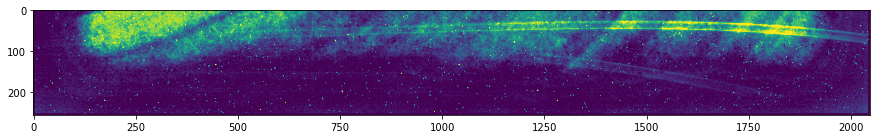

In [10]:
w43 = fits.open('WASP43_NIS_SOSS_CLEAR_uncal.fits')
data = w43['SCI'].data
plt.figure(figsize=(15,5))
im = plt.imshow(data[0,2,:,:])
im.set_clim(10000,20000)